In [95]:
# import necessary library
import pandas as pd
import math
import seaborn as sns
from matplotlib import pyplot as plt
import re
import numpy as np
import geopandas as gpd
from shapely.geometry import Point # Point class
from shapely.geometry import shape
import networkx as nx
import osmnx as ox
import os 
from geopandas import GeoDataFrame, read_file
from geopandas.tools import overlay
import shapely.geometry as geom
import shapely.wkt

In [96]:
import os, time, math
import math
from math import sqrt
import numpy as np
import pandas as pd
import seaborn as sn
#from keras.optimizers import Adam

from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
%matplotlib inline
from matplotlib import pyplot as plt
from pprint import pprint
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingClassifier
from sklearn import linear_model, tree, ensemble
import sklearn.metrics as metrics 
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm
#from sklearn.metrics import mean_absolute_percentage_error
import xgboost as xgb
from xgboost import XGBRegressor
import math
#from tune_sklearn import TuneGridSearchCV
from sklearn import tree

In [97]:
# Helper Function
def rmse(predictions, targets):
    differences = predictions - targets                       #the DIFFERENCEs.
    differences_squared = differences ** 2                    #the SQUAREs of ^
    mean_of_differences_squared = differences_squared.mean()  #the MEAN of ^
    rmse_val = np.sqrt(mean_of_differences_squared)           #ROOT of ^
    return rmse_val

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f}.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

In [98]:
# read the data
data=pd.read_csv('D:/Bike Exposure/Modeling/Model_clean_data_july23_AADBT.csv')
data['bike_fac']=data['path']+data['bike_lane']+data['bike_route']+data['cycle_track']+data['trail']
data.head()

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_9380\38868825.py:2: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('D:/Bike Exposure/Modeling/Model_clean_data_july23_AADBT.csv')


Unnamed: 0   county    X       ID location        Lat        Long  year  \
0           1  Alameda  122   8578.0    urban  37.849934 -122.288850  2018   
1           2  Alameda  285  21805.0    urban  37.814124 -122.255859  2019   
2           3  Alameda  286  21806.0    urban  37.814124 -122.255859  2019   
3           4  Alameda  128  14389.0    urban  37.533787 -122.079500  2017   
4           5  Alameda  129  14389.0    urban  37.533787 -122.079500  2018   

     ATT  no_of_months_data_collected  ... speed_less_than_30  \
0  11376                          1.0  ...                  1   
1  12785                          7.0  ...                  1   
2  24424                          7.0  ...                  1   
3  69539                         12.0  ...                  0   
4  77973                         12.0  ...                  0   

   Speed_30_or_Above  speed_less_than_25  Speed_25_or_Above  \
0                  0                   0                  1   
1                  0                   0                  1   
2                  0                   0                  1   
3                  1                   0                  1   
4                  1                   0                  1   

   speed_less_than_20 Speed_20_or_Above        Mean         std  outlier  \
0                   0                 1  148.898849  158.580163    False   
1                   0                 1  148.898849  158.580163    False   
2                   0                 1  148.898849  158.580163    False   
3                   0                 1  148.898849  158.580163    False   
4                   0                 1  148.898849  158.580163    False   

   bike_fac  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 199 columns]

In [99]:
list(data.columns)

['Unnamed: 0',
 'county',
 'X',
 'ID',
 'location',
 'Lat',
 'Long',
 'year',
 'ATT',
 'no_of_months_data_collected',
 'type',
 'AADB',
 'ATT.in.Million',
 'matched_seg_id',
 'segment_id',
 'street_name',
 'tdg_id',
 'lrs_cal_id',
 'bikes_proh',
 'int_tdg_id',
 'loc_id',
 'seg_counter',
 'fclass',
 'tasas_ids',
 'ataip_ids',
 'fc_draft',
 'speed',
 'slope',
 'empnum_density_t',
 'geom_length',
 'access_code',
 'adt_amt',
 'truck_adt_amt',
 'rt_lanes_amt',
 'lt_lanes_amt',
 'rt_trav_way_width',
 'rt_i_shd_tot_width',
 'rt_o_shd_tot_width',
 'lt_trav_way_width',
 'lt_i_shd_tot_width',
 'lt_o_shd_tot_width',
 'near_strava_id',
 'empnum_density_q',
 'empnum_density_h',
 'near_univ_miles',
 'near_large_univ_miles',
 'eco_type',
 'geometry',
 'forward_trip_count',
 'reverse_trip_count',
 'forward_commute_trip_count',
 'reverse_commute_trip_count',
 'forward_leisure_trip_count',
 'reverse_leisure_trip_count',
 'forward_average_speed',
 'reverse_average_speed',
 'index',
 'Leg',
 'ATT.in.Thous

In [100]:
data['overall_mean']=data['AADB'].mean()
data['overall_std']=data['AADB'].std()
data['outlier_threshold']=5*data['overall_mean']+5*data['overall_std']
#Count > 5 × mean count + 5 × standard deviation


In [101]:
# drop the extreme high volume sites based on above criteria
data=data.loc[data['AADB']<=data['outlier_threshold']]
data.shape

(4209, 202)

In [102]:
data['county'].unique()

array(['Alameda', 'Butte', 'Contra Costa', 'Del Norte', 'Douglas',
       'El Dorado', 'Fresno', 'Humboldt', 'Inyo', 'Kern', 'Lassen',
       'Los Angeles', 'Madera', 'Marin', 'Mendocino', 'Nevada', 'Orange',
       'Placer', 'Sacramento', 'San Diego', 'San Francisco',
       'San Luis Obispo', 'San Mateo', 'Santa Clara', 'Santa Cruz',
       'Sutter', 'Washoe', 'Yolo', 'Yuba'], dtype=object)

# Run the Descriptive Stat

In [103]:
data['AADB'].describe()

count    4209.000000
mean      161.463768
std       233.042057
min         1.000000
25%        38.000000
50%        82.000000
75%       180.000000
max      2142.000000
Name: AADB, dtype: float64

In [104]:
per=data.loc[data['type']=='eco_permanent']
per_uni=per.drop_duplicates(subset=['ID'], keep='first')
short=data.loc[data['type']=='short_term']
short_uni=short.drop_duplicates(subset=['tdg_id'], keep='first')

In [105]:
per.shape, short.shape,short_uni.shape,per_uni.shape

((649, 202), (3560, 202), (2589, 202), (203, 202))

In [107]:
per['AADB'].describe()

count     649.000000
mean      311.727273
std       408.820070
min         1.000000
25%        54.000000
50%       132.000000
75%       391.000000
max      2142.000000
Name: AADB, dtype: float64

<Figure size 5000x5000 with 0 Axes>

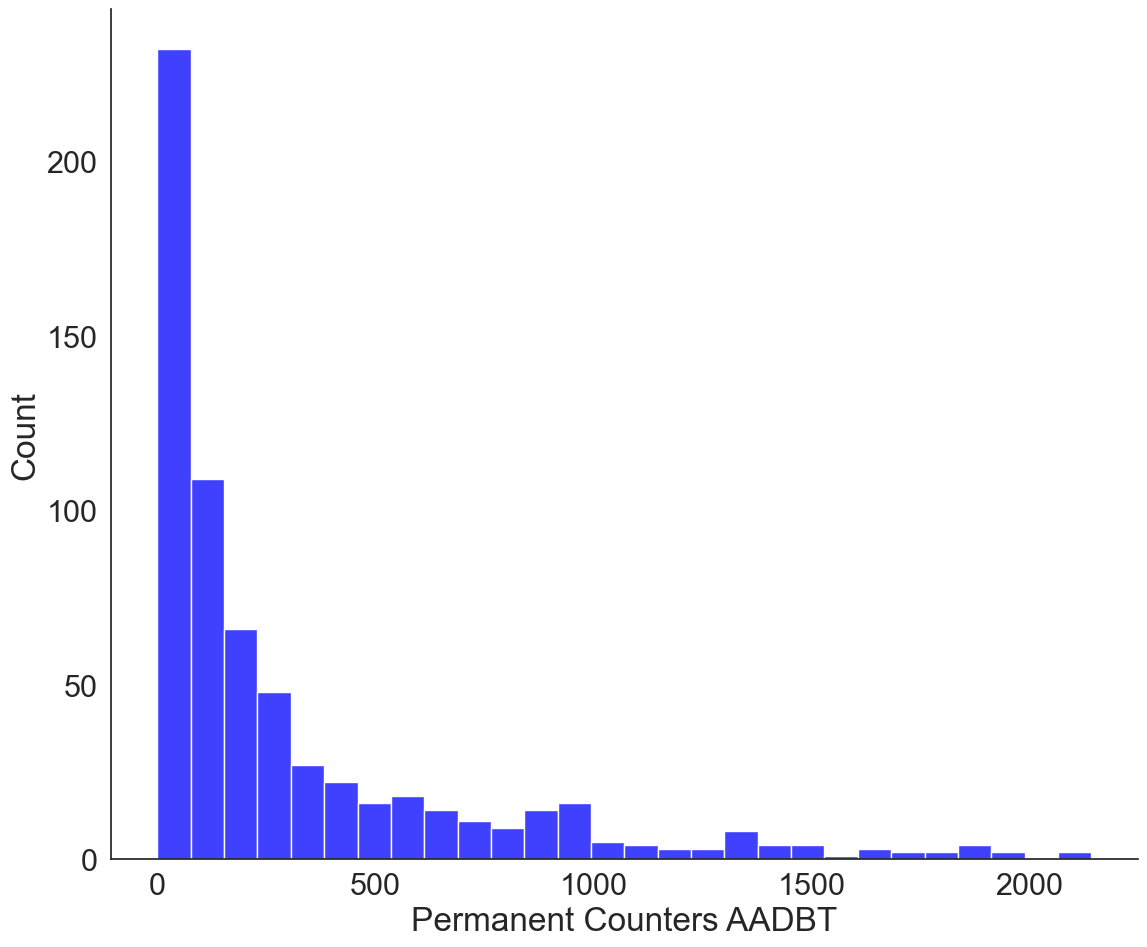

In [128]:
# Bar density plot for permanent counters AADBT
#import seaborn as sns
plt.figure(figsize=(50,50))
sns.set_theme(style='white',font_scale=2, palette='deep')
#sns.set(font_scale=3) 
#sns.set(rc={'figure.figsize':(40,40)})
g=sns.displot(per, x="AADB", color='blue',height=10, aspect=1.2,)
#g=sns.scatterplot(data=data, x="Stv_adb", y="AADB", hue="county", palette="bright",s=80)
g.set(xlabel='Permanent Counters AADBT')
#g.legend(fontsize=20)
#abline(1, (0,0))
# plt.xlim(0,3300)
# plt.ylim(0,3300)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
plt.show()

In [129]:
short['AADB'].describe()

count    3560.000000
mean      134.070225
std       170.039217
min         3.000000
25%        37.000000
50%        75.000000
75%       160.000000
max      1967.000000
Name: AADB, dtype: float64

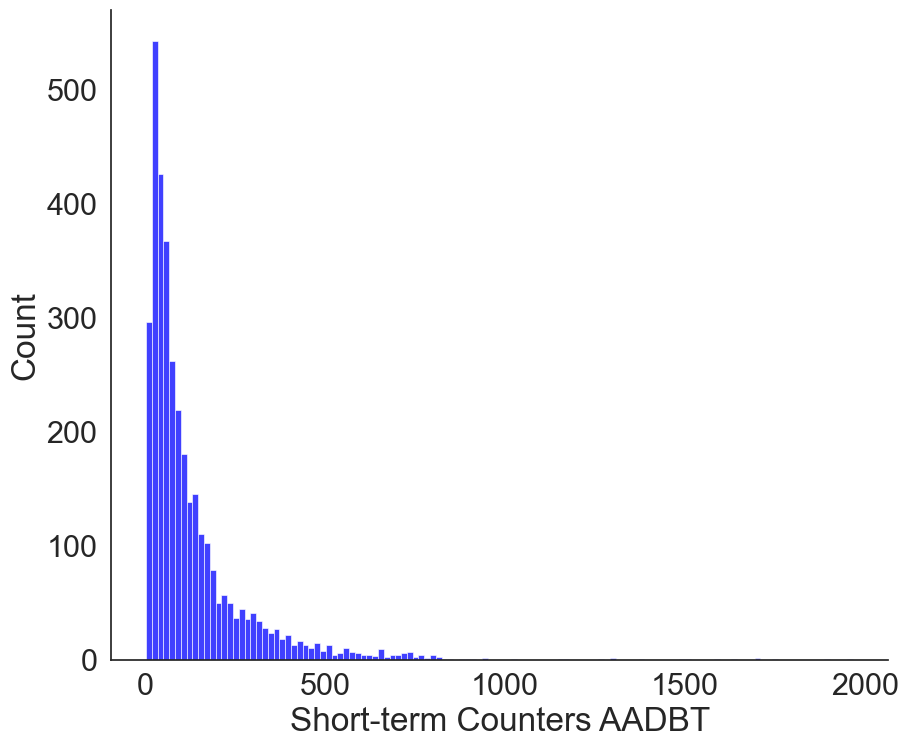

In [132]:
sns.set_theme(style='white',font_scale=2, palette='deep')
g=sns.displot(short, x="AADB", color='blue',height=8, aspect=1.2)
g.set(xlabel='Short-term Counters AADBT')
plt.show()

In [14]:
# Descriptive statistics by facilities
print('unique_permanent counter:',per_uni.groupby(['path'])['AADB'].count())
print('unique_permanent counter:',per_uni.groupby(['bike_lane'])['AADB'].count())
print('unique_permanent counter:',per_uni.groupby(['bike_route'])['AADB'].count())
print('unique_permanent counter:',per_uni.groupby(['cycle_track'])['AADB'].count())
print('unique_permanent counter:',per_uni.groupby(['trail'])['AADB'].count())
both=per_uni.loc[per_uni['bike_fac']==0]
print('unique_permanent counter on other facilitie:',both.shape)

# total gross counter
print('total_permanent counter:',per.groupby(['path'])['AADB'].count())
print('total_permanent counter:',per.groupby(['bike_lane'])['AADB'].count())
print('total_permanent counter:',per.groupby(['bike_route'])['AADB'].count())
print('total_permanent counter:',per.groupby(['cycle_track'])['AADB'].count())
print('total_permanent counter:',per.groupby(['trail'])['AADB'].count())
tboth=per.loc[per['bike_fac']==0]
print('total_permanent counter on other facilities:',tboth.shape)


# total gross counter
print('total_permanent counter:',per.groupby(['path'])['AADB'].describe())
print('total_permanent counter:',per.groupby(['bike_lane'])['AADB'].describe())
print('total_permanent counter:',per.groupby(['bike_route'])['AADB'].describe())
print('total_permanent counter:',per.groupby(['cycle_track'])['AADB'].describe())
print('total_permanent counter:',per.groupby(['trail'])['AADB'].describe())
#print('total_permanent counter:',per.groupby(['trail'])['AADB'].describe())
print('total_permanent counter:',tboth['AADB'].describe())

unique_permanent counter: path
0    148
1     55
Name: AADB, dtype: int64
unique_permanent counter: bike_lane
0    136
1     67
Name: AADB, dtype: int64
unique_permanent counter: bike_route
0    161
1     42
Name: AADB, dtype: int64
unique_permanent counter: cycle_track
0    203
Name: AADB, dtype: int64
unique_permanent counter: trail
0    202
1      1
Name: AADB, dtype: int64
unique_permanent counter on other facilitie: (38, 202)
total_permanent counter: path
0    486
1    163
Name: AADB, dtype: int64
total_permanent counter: bike_lane
0    426
1    223
Name: AADB, dtype: int64
total_permanent counter: bike_route
0    498
1    151
Name: AADB, dtype: int64
total_permanent counter: cycle_track
0    649
Name: AADB, dtype: int64
total_permanent counter: trail
0    647
1      2
Name: AADB, dtype: int64
total_permanent counter on other facilities: (110, 202)
total_permanent counter:       count        mean         std  min   25%    50%    75%     max
path                                    

In [15]:
# Descriptive statistics by facilities
print('unique_short counter:',short_uni.groupby(['path'])['AADB'].count())
print('unique_short counter:',short_uni.groupby(['bike_lane'])['AADB'].count())
print('unique_short counter:',short_uni.groupby(['bike_route'])['AADB'].count())
print('unique_short counter:',short_uni.groupby(['cycle_track'])['AADB'].count())
print('unique_short counter:',short_uni.groupby(['trail'])['AADB'].count())
both=short_uni.loc[short_uni['bike_fac']==0]
print('unique_pshort counter on other facilitie:',both.shape)

# total gross counter
print('total_short counter:',short.groupby(['path'])['AADB'].count())
print('total_short counter:',short.groupby(['bike_lane'])['AADB'].count())
print('total_short counter:',short.groupby(['bike_route'])['AADB'].count())
print('total_short counter:',short.groupby(['cycle_track'])['AADB'].count())
print('total_short counter:',short.groupby(['trail'])['AADB'].count())
tboth=short.loc[short['bike_fac']==0]
print('total_short counter on other facilities:',tboth.shape)


# total gross counter
print('total_short counter:',short.groupby(['path'])['AADB'].describe())
print('total_short counter:',short.groupby(['bike_lane'])['AADB'].describe())
print('total_short counter:',short.groupby(['bike_route'])['AADB'].describe())
print('total_short counter:',short.groupby(['cycle_track'])['AADB'].describe())
print('total_short counter:',short.groupby(['trail'])['AADB'].describe())
print('total_short counter:',tboth['AADB'].describe())

unique_short counter: path
0    2545
1      44
Name: AADB, dtype: int64
unique_short counter: bike_lane
0    2226
1     363
Name: AADB, dtype: int64
unique_short counter: bike_route
0    2395
1     194
Name: AADB, dtype: int64
unique_short counter: cycle_track
0    2584
1       5
Name: AADB, dtype: int64
unique_short counter: trail
0    2587
1       2
Name: AADB, dtype: int64
unique_pshort counter on other facilitie: (1981, 202)
total_short counter: path
0    3496
1      64
Name: AADB, dtype: int64
total_short counter: bike_lane
0    3026
1     534
Name: AADB, dtype: int64
total_short counter: bike_route
0    3215
1     345
Name: AADB, dtype: int64
total_short counter: cycle_track
0    3555
1       5
Name: AADB, dtype: int64
total_short counter: trail
0    3558
1       2
Name: AADB, dtype: int64
total_short counter on other facilities: (2610, 202)
total_short counter:        count        mean         std   min   25%   50%    75%     max
path                                             

In [16]:
# Creat some urban Vs rural and Geolocation Binary variable
# urban
data['urban']=np.where(data['location']=='urban',1,0)
data['rural']=np.where(data['location']=='rural',1,0)
data['Alameda']=np.where(data['county']=='Alameda',1,0)
data['San_Francisco']=np.where(data['county']=='San Francisco',1,0)
data['Los_Angeles']=np.where(data['county']=='Los Angeles',1,0)
data['San_Diego']=np.where(data['county']=='San Diego',1,0)
data['Yolo']=np.where(data['county']=='Yolo',1,0)
data['Orange']=np.where(data['county']=='Orange',1,0)

In [17]:
data.head()

Unnamed: 0   county    X       ID location        Lat        Long  year  \
0           1  Alameda  122   8578.0    urban  37.849934 -122.288850  2018   
1           2  Alameda  285  21805.0    urban  37.814124 -122.255859  2019   
2           3  Alameda  286  21806.0    urban  37.814124 -122.255859  2019   
3           4  Alameda  128  14389.0    urban  37.533787 -122.079500  2017   
4           5  Alameda  129  14389.0    urban  37.533787 -122.079500  2018   

     ATT  no_of_months_data_collected  ... overall_std  outlier_threshold  \
0  11376                          1.0  ...  268.195932        2181.968997   
1  12785                          7.0  ...  268.195932        2181.968997   
2  24424                          7.0  ...  268.195932        2181.968997   
3  69539                         12.0  ...  268.195932        2181.968997   
4  77973                         12.0  ...  268.195932        2181.968997   

   urban  rural  Alameda San_Francisco  Los_Angeles  San_Diego  Yolo  Orange  
0      1      0        1             0            0          0     0       0  
1      1      0        1             0            0          0     0       0  
2      1      0        1             0            0          0     0       0  
3      1      0        1             0            0          0     0       0  
4      1      0        1             0            0          0     0       0  

[5 rows x 210 columns]

In [18]:
data['county'].unique()

array(['Alameda', 'Butte', 'Contra Costa', 'Del Norte', 'Douglas',
       'El Dorado', 'Fresno', 'Humboldt', 'Inyo', 'Kern', 'Lassen',
       'Los Angeles', 'Madera', 'Marin', 'Mendocino', 'Nevada', 'Orange',
       'Placer', 'Sacramento', 'San Diego', 'San Francisco',
       'San Luis Obispo', 'San Mateo', 'Santa Clara', 'Santa Cruz',
       'Sutter', 'Washoe', 'Yolo', 'Yuba'], dtype=object)

In [19]:
data['AADB'].describe()

count    4209.000000
mean      161.463768
std       233.042057
min         1.000000
25%        38.000000
50%        82.000000
75%       180.000000
max      2142.000000
Name: AADB, dtype: float64

In [20]:
data['slope'].describe()

count    4209.000000
mean        0.012890
std         0.018766
min         0.000000
25%         0.002778
50%         0.006515
75%         0.015112
max         0.261190
Name: slope, dtype: float64

In [21]:
data['log_Stv_commute_adb']=np.log(data['Stv_commute_adb']+0.01)
data['log_Stv_leisure_adb']=np.log(data['Stv_leisure_adb']+0.01)
data['Stv_adb']=data['Stv_leisure_adb']+data['Stv_commute_adb']
data['log_Stv_adb']=np.log(data['Stv_adb']+0.01)
data['log_slope']=np.log(data['slope']+0.01)
data1=data.fillna(0)
data1=data1.drop(['geometry'],axis=1)
data1.head()

Unnamed: 0   county    X       ID location        Lat        Long  year  \
0           1  Alameda  122   8578.0    urban  37.849934 -122.288850  2018   
1           2  Alameda  285  21805.0    urban  37.814124 -122.255859  2019   
2           3  Alameda  286  21806.0    urban  37.814124 -122.255859  2019   
3           4  Alameda  128  14389.0    urban  37.533787 -122.079500  2017   
4           5  Alameda  129  14389.0    urban  37.533787 -122.079500  2018   

     ATT  no_of_months_data_collected  ... San_Francisco  Los_Angeles  \
0  11376                          1.0  ...             0            0   
1  12785                          7.0  ...             0            0   
2  24424                          7.0  ...             0            0   
3  69539                         12.0  ...             0            0   
4  77973                         12.0  ...             0            0   

   San_Diego  Yolo  Orange log_Stv_commute_adb  log_Stv_leisure_adb  \
0          0     0       0            2.268773             1.820409   
1          0     0       0           -1.670876             0.009950   
2          0     0       0           -1.670876             0.009950   
3          0     0       0           -2.974051            -2.848257   
4          0     0       0           -3.286158            -2.736534   

     Stv_adb  log_Stv_adb  log_slope  
0  15.821918     2.762028  -3.822693  
1   1.178082     0.172340  -2.955928  
2   1.178082     0.172340  -2.955928  
3   0.089041    -2.312220  -4.588440  
4   0.082192    -2.383884  -4.588440  

[5 rows x 214 columns]

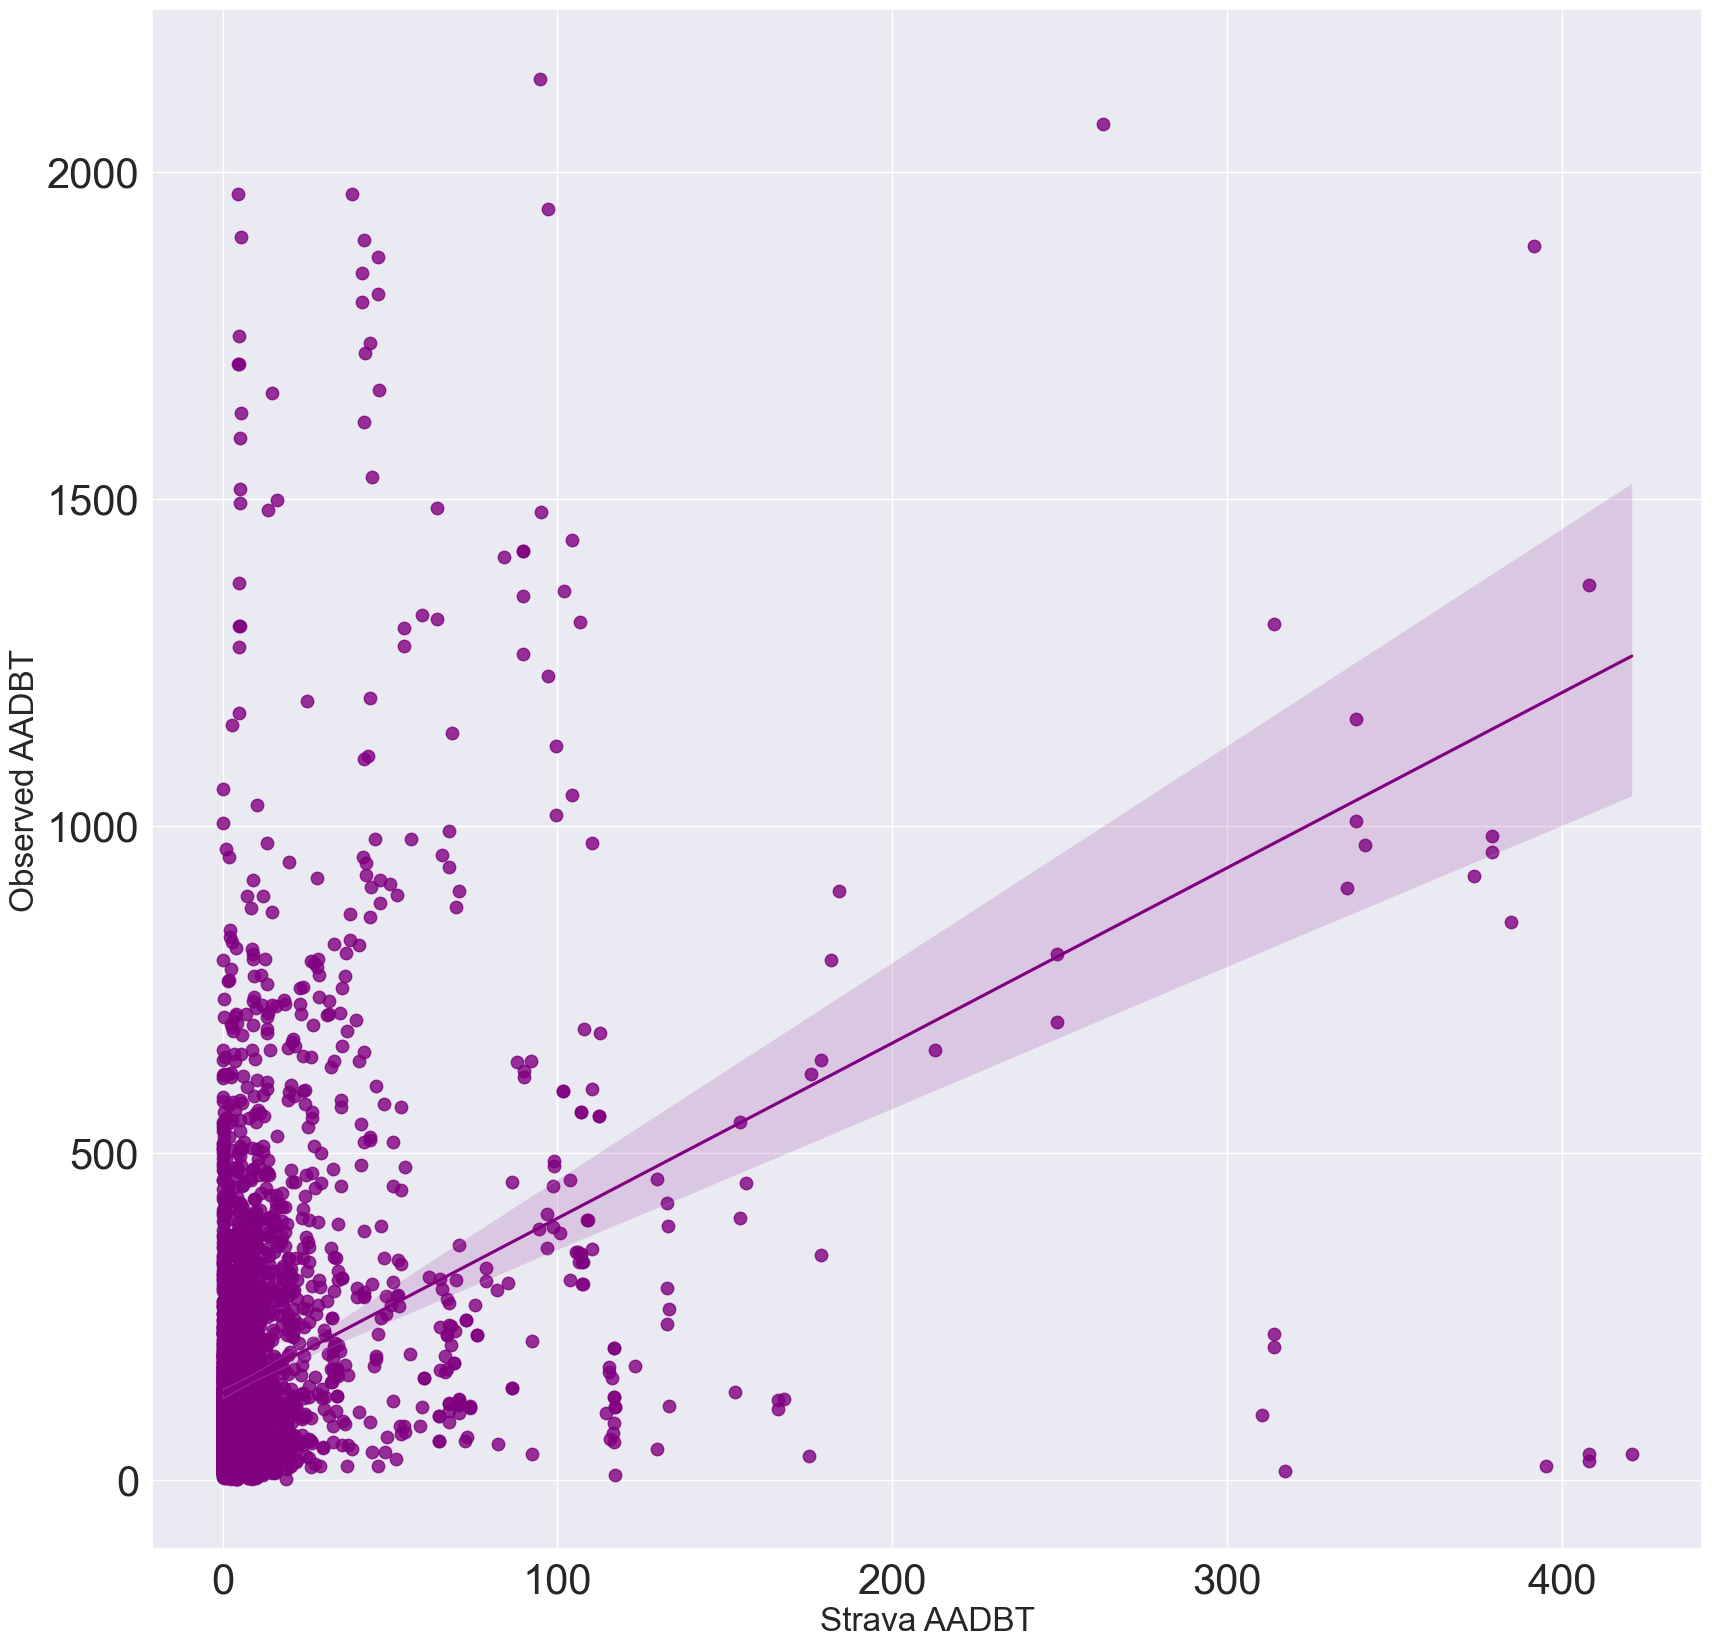

In [22]:
# Plot AADBT Vs Strava AADBT
sns.set(font_scale=2.0) 
plt.figure(figsize=(20,20))
g=sns.regplot(x="Stv_adb", y="AADB", data=data,scatter_kws={"s": 80},color='purple') #
#g=sns.scatterplot(data=data, x="Stv_adb", y="AADB", hue="county", palette="bright",s=80)
g.set(xlabel='Strava AADBT', ylabel='Observed AADBT')
#g.legend(fontsize=20)
#abline(1, (0,0))
# plt.xlim(0,3300)
# plt.ylim(0,3300)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

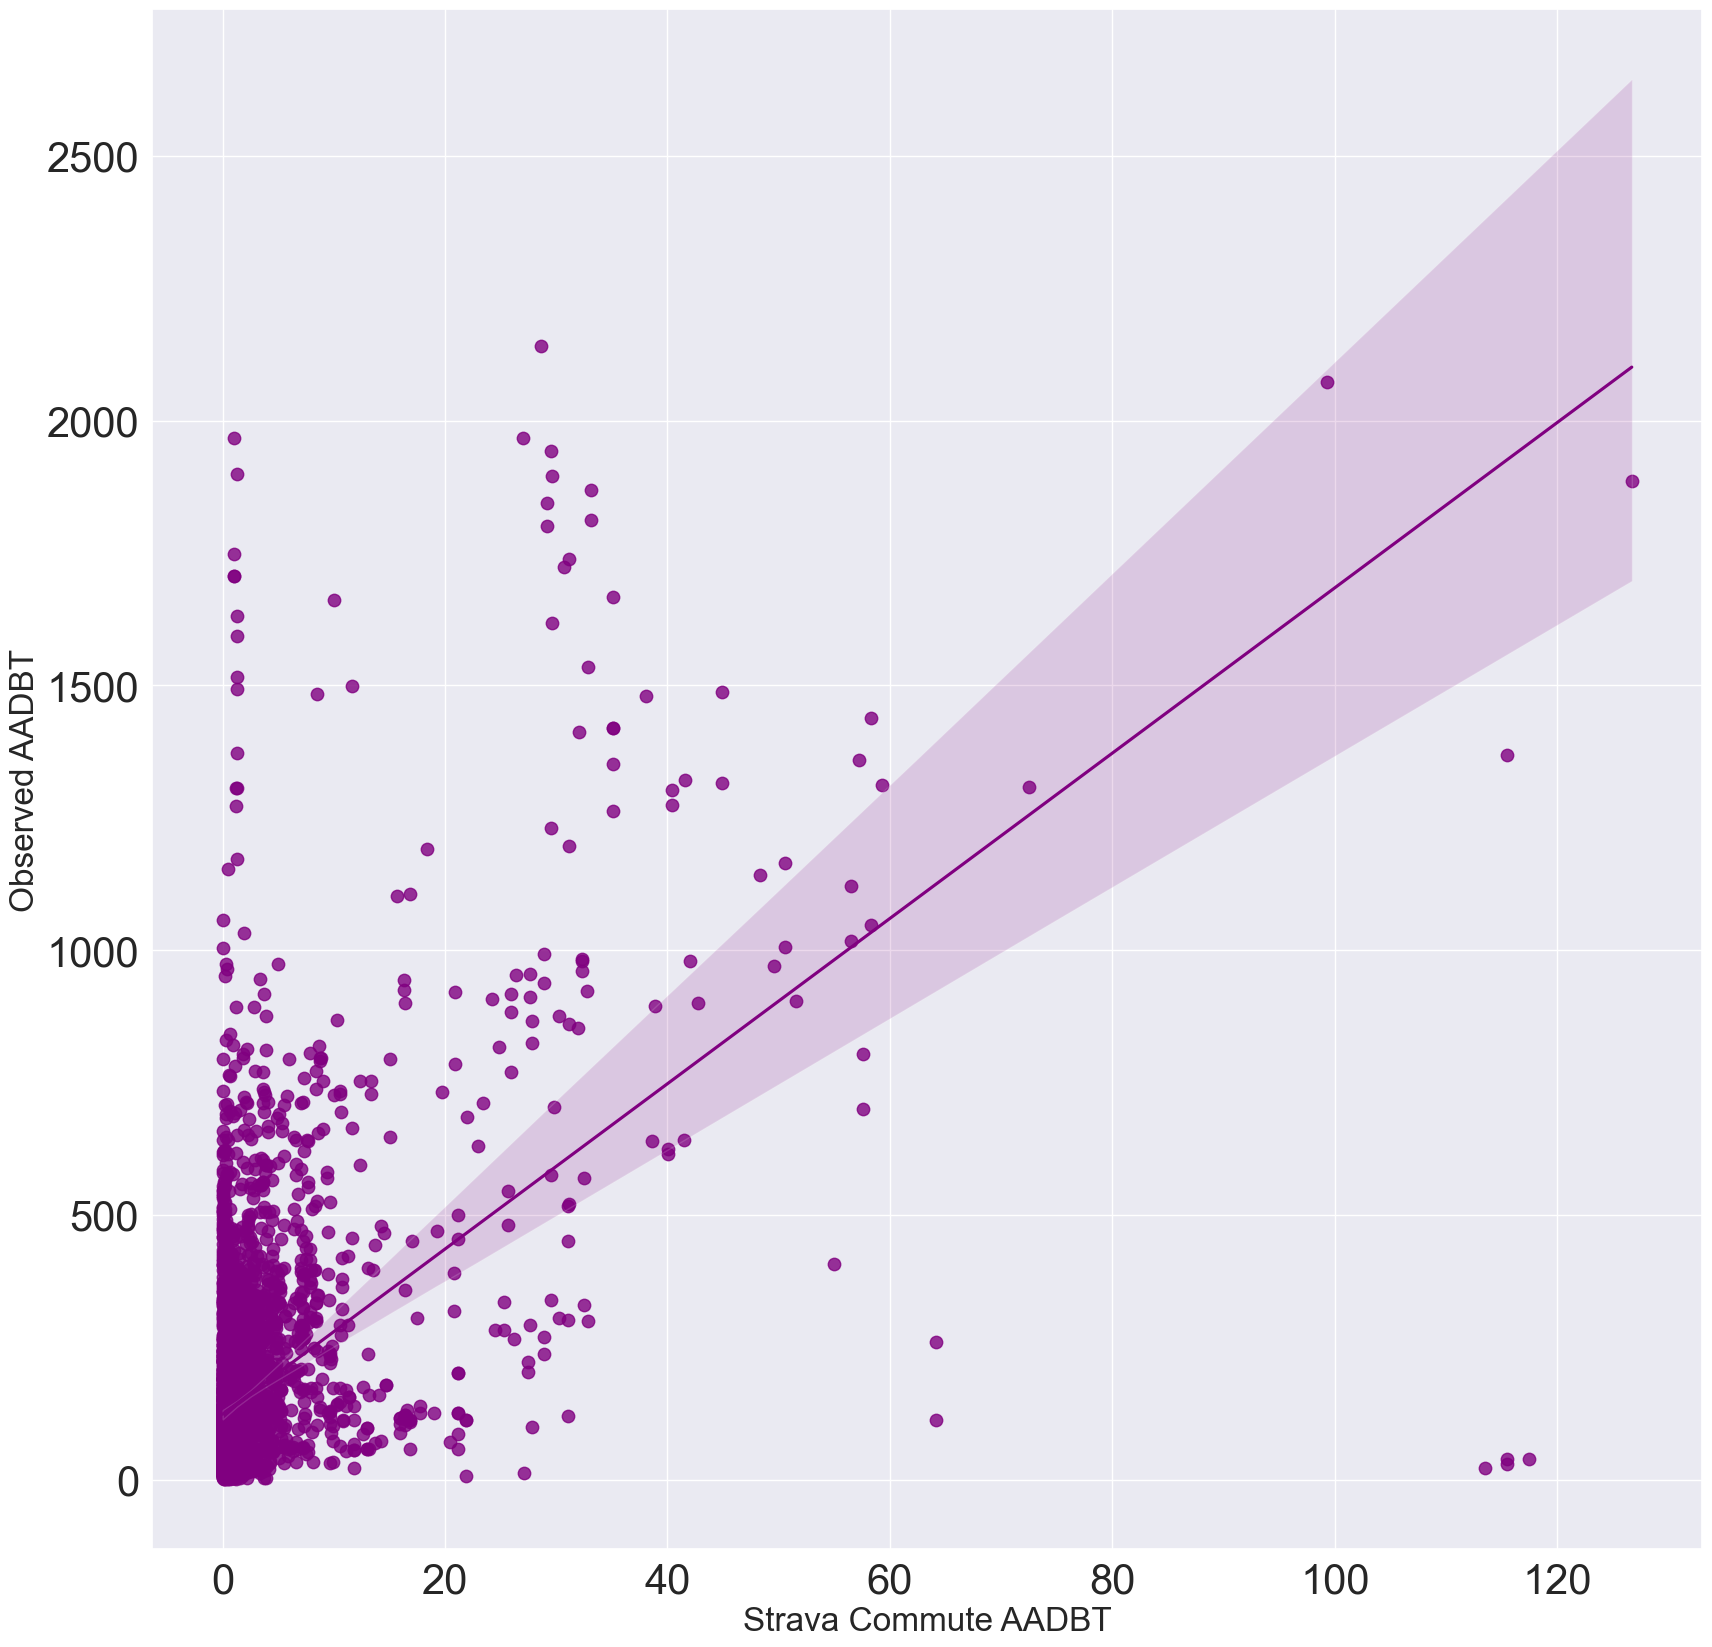

In [23]:
# Plot AADBT Vs Strava AADBT
sns.set(font_scale=2) 
plt.figure(figsize=(20,20))
g=sns.regplot(x="Stv_commute_adb", y="AADB", data=data,scatter_kws={"s": 80},color='purple') #
#g=sns.scatterplot(data=data, x="Stv_commute_adb", y="AADB", hue="county", palette="bright",s=80)
g.set(xlabel='Strava Commute AADBT', ylabel='Observed AADBT')
#g.legend(fontsize=20)
#abline(1, (0,0))
# plt.xlim(0,3300)
# plt.ylim(0,3300)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

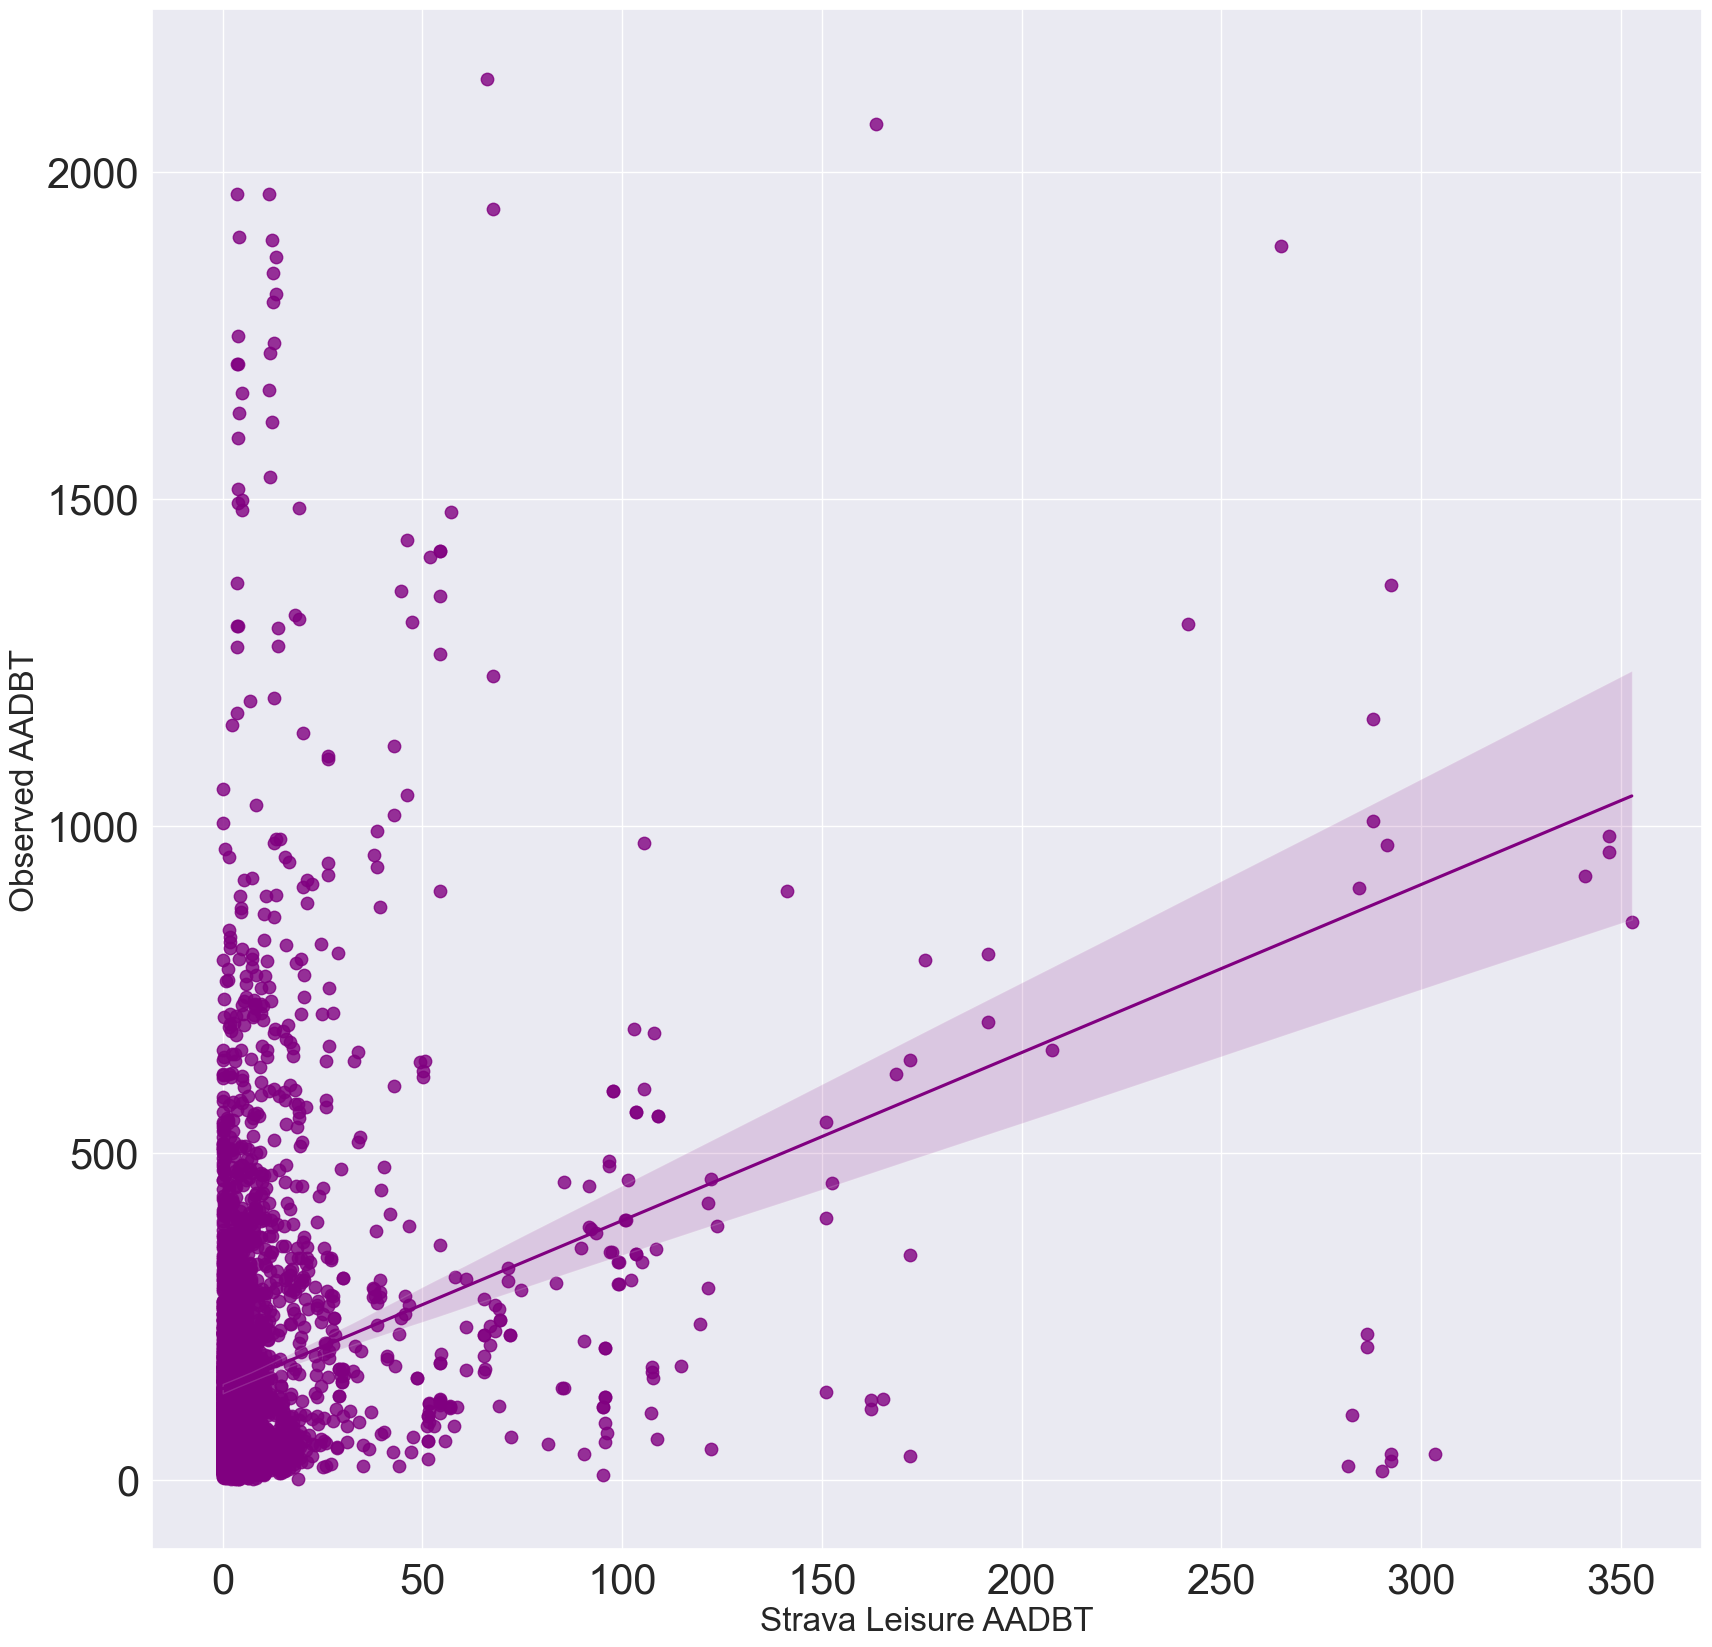

In [24]:
# Plot AADBT Vs Strava AADBT
sns.set(font_scale=2) 
plt.figure(figsize=(20,20))
g=sns.regplot(x="Stv_leisure_adb", y="AADB", data=data,scatter_kws={"s": 80},color='purple', order=1) #
#g=sns.scatterplot(data=data, x="Stv_leisure_adb", y="AADB", hue="county", palette="bright",s=80)
g.set(xlabel='Strava Leisure AADBT', ylabel='Observed AADBT')
#g.legend(fontsize=20)
#abline(1, (0,0))
# plt.xlim(0,3300)
# plt.ylim(0,3300)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

In [25]:
gdf = gpd.GeoDataFrame(
    data1, geometry=gpd.points_from_xy(data1.Long, data1.Lat), crs="EPSG:4326"
)
gdf.head()

Unnamed: 0   county    X       ID location        Lat        Long  year  \
0           1  Alameda  122   8578.0    urban  37.849934 -122.288850  2018   
1           2  Alameda  285  21805.0    urban  37.814124 -122.255859  2019   
2           3  Alameda  286  21806.0    urban  37.814124 -122.255859  2019   
3           4  Alameda  128  14389.0    urban  37.533787 -122.079500  2017   
4           5  Alameda  129  14389.0    urban  37.533787 -122.079500  2018   

     ATT  no_of_months_data_collected  ... Los_Angeles  San_Diego  Yolo  \
0  11376                          1.0  ...           0          0     0   
1  12785                          7.0  ...           0          0     0   
2  24424                          7.0  ...           0          0     0   
3  69539                         12.0  ...           0          0     0   
4  77973                         12.0  ...           0          0     0   

   Orange  log_Stv_commute_adb log_Stv_leisure_adb    Stv_adb  log_Stv_adb  \
0       0             2.268773            1.820409  15.821918     2.762028   
1       0            -1.670876            0.009950   1.178082     0.172340   
2       0            -1.670876            0.009950   1.178082     0.172340   
3       0            -2.974051           -2.848257   0.089041    -2.312220   
4       0            -3.286158           -2.736534   0.082192    -2.383884   

   log_slope                     geometry  
0  -3.822693  POINT (-122.28885 37.84993)  
1  -2.955928  POINT (-122.25586 37.81412)  
2  -2.955928  POINT (-122.25586 37.81412)  
3  -4.588440  POINT (-122.07950 37.53379)  
4  -4.588440  POINT (-122.07950 37.53379)  

[5 rows x 215 columns]

In [26]:
#gdf.to_file('D:/Bike Exposure/Modeling/GWR_data/GWPR_Python_input.shp', driver='ESRI Shapefile')
gdf.to_file("D:/Bike Exposure/Modeling/GWR_data/GWPR_Python_input_oct10.json", driver="GeoJSON")

In [27]:
# import GWPR IN Python file
data1.to_csv('GWPR_Python_input_oct10.csv')

In [28]:
# export the data Geographically weighted Regression
gwr_df=data1[['AADB',
 'exist_bike_parking_q',
 'exist_subway_h',
 'Intersection_density5',
 'pctnoveh_t',
 'pctbiketowork_h',
'Lat','Long',
 'log_Stv_adb','county']]

In [29]:
from sklearn.model_selection import train_test_split
gwr_train, gwr_test = train_test_split(gwr_df, test_size=0.2, random_state=94706)
gwr_train.to_csv('gwr_train_oct10.csv')
gwr_test.to_csv('gwr_test_oct10.csv')


In [30]:
# from sklearn.metrics import r2_score
# r2_score(gwr_train['AADB'], test_pred1['PREDICTED'])

In [31]:
data1['AADB'].isnull().values.any()

False

In [32]:
# Check the correlation matrix
cor_df=data1[['AADB','log_Stv_adb','pctbiketowork_q','pctnoveh_h','log_slope','near_univ_miles','exist_bike_parking_q','pct_low_wage','Network_density3','pctlowintensity_h','Speed_25_or_Above','pctwhite_q','urban','Yolo','San_Diego']]
cor_df.head()           

AADB  log_Stv_adb  pctbiketowork_q  pctnoveh_h  log_slope  near_univ_miles  \
0    31     2.762028         0.041426    0.129288  -3.822693         0.387411   
1    35     0.172340         0.028698    0.188265  -2.955928         0.662974   
2    67     0.172340         0.028698    0.188265  -2.955928         0.662974   
3   191    -2.312220         0.000000    0.013903  -4.588440         6.490427   
4   214    -2.383884         0.000000    0.013903  -4.588440         6.490427   

   exist_bike_parking_q  pct_low_wage  Network_density3  pctlowintensity_h  \
0                     1      0.152878         26.050173           0.076269   
1                     0      0.146277         22.749752           0.069988   
2                     0      0.146277         22.749752           0.069988   
3                     0      0.090106          2.505146           0.027365   
4                     0      0.090106          2.505146           0.027365   

   Speed_25_or_Above  pctwhite_q  urban  Yolo  San_Diego  
0                  1    0.398582      1     0          0  
1                  1    0.420929      1     0          0  
2                  1    0.420929      1     0          0  
3                  1    0.059064      1     0          0  
4                  1    0.059064      1     0          0

### cor_df.columns

In [33]:
# VIF dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=data1[[ 'log_Stv_adb', 'pctbiketowork_q', 'pctnoveh_h', 'slope',
       'near_univ_miles', 'exist_bike_parking_q',
       'Network_density3',  'pctlowintensity_h',
       'Speed_25_or_Above', 'pctwhite_q','urban','Yolo','San_Diego' ]]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                 feature        VIF
0            log_Stv_adb   1.534274
1        pctbiketowork_q   2.405523
2             pctnoveh_h   3.309187
3                  slope   1.587089
4        near_univ_miles   1.493185
5   exist_bike_parking_q   2.151797
6       Network_density3   6.567700
7      pctlowintensity_h   4.505052
8      Speed_25_or_Above  14.991842
9             pctwhite_q   9.528430
10                 urban   1.807214
11                  Yolo   1.299592
12             San_Diego   1.398196


In [34]:
corr = cor_df.corr()
corr.style.background_gradient(cmap='coolwarm',vmin=-1, vmax=1).set_precision(2)

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_9380\3696198574.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm',vmin=-1, vmax=1).set_precision(2)


<AxesSubplot: >

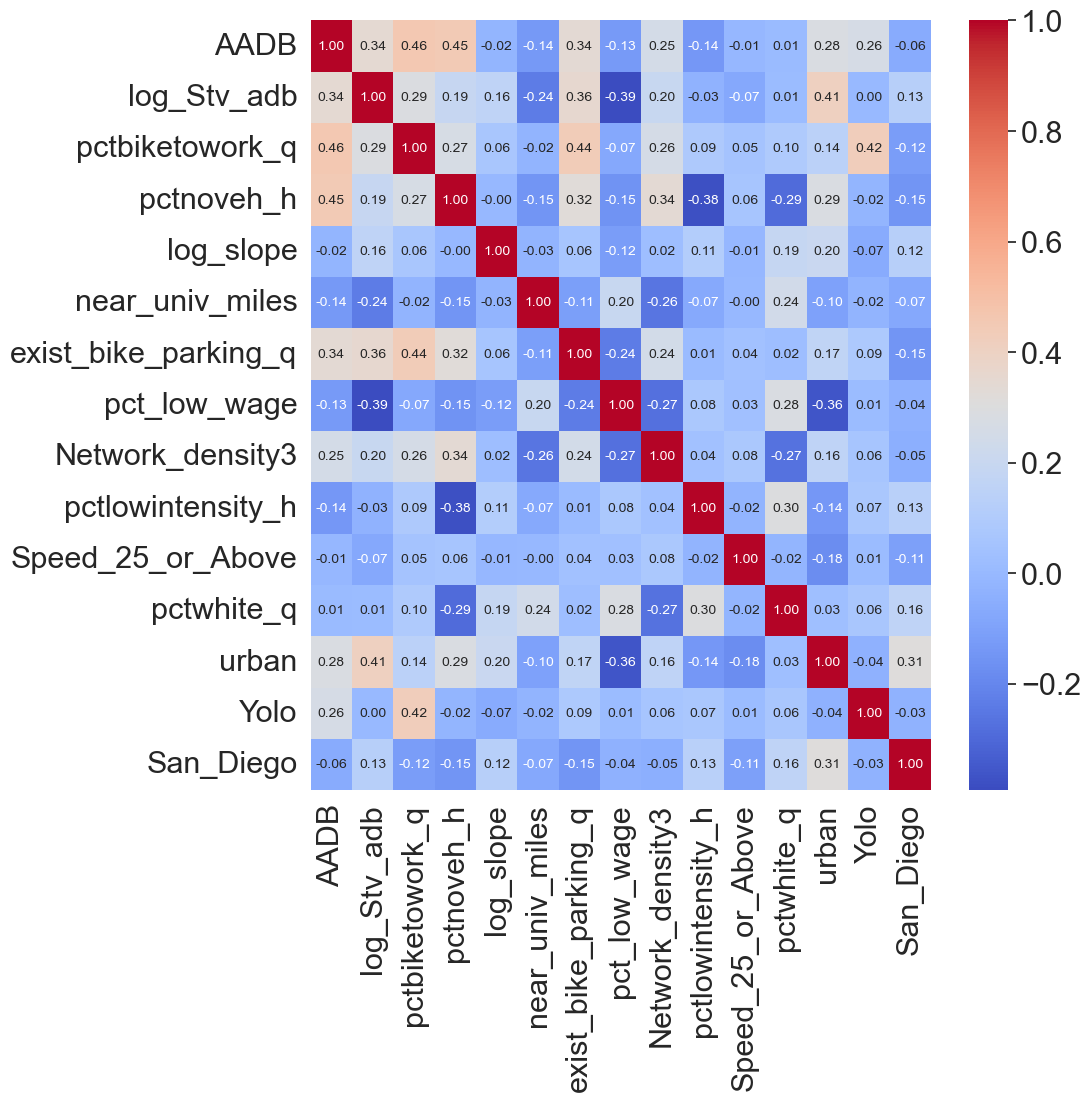

In [35]:
import seaborn as sb
plt.figure(figsize=(10,10))
corr = cor_df.corr()
sb.heatmap(corr, cmap="coolwarm", annot=True,fmt=".2f",annot_kws={"fontsize":10})

# Make some sns pair plot

In [36]:
df1=cor_df[['AADB','log_Stv_adb','pctbiketowork_q','pctnoveh_h']]

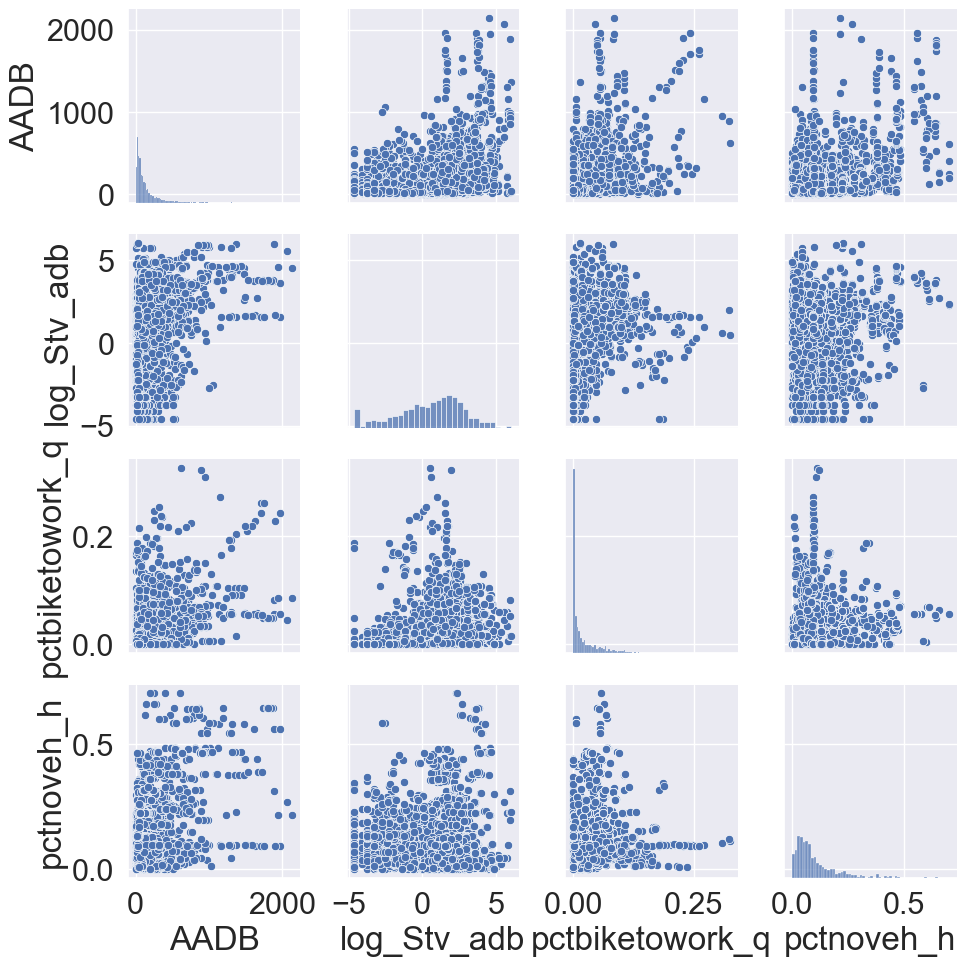

In [37]:
sns.pairplot(df1)

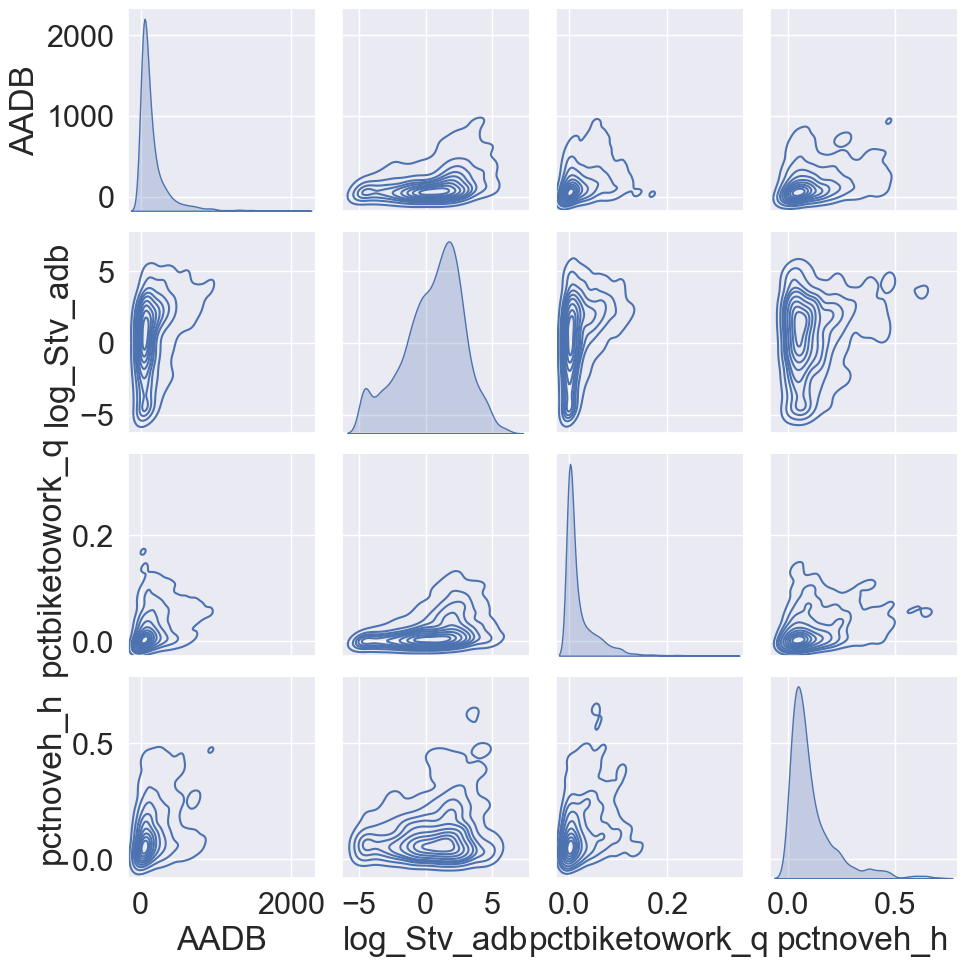

In [38]:
sns.pairplot(df1, kind="kde")

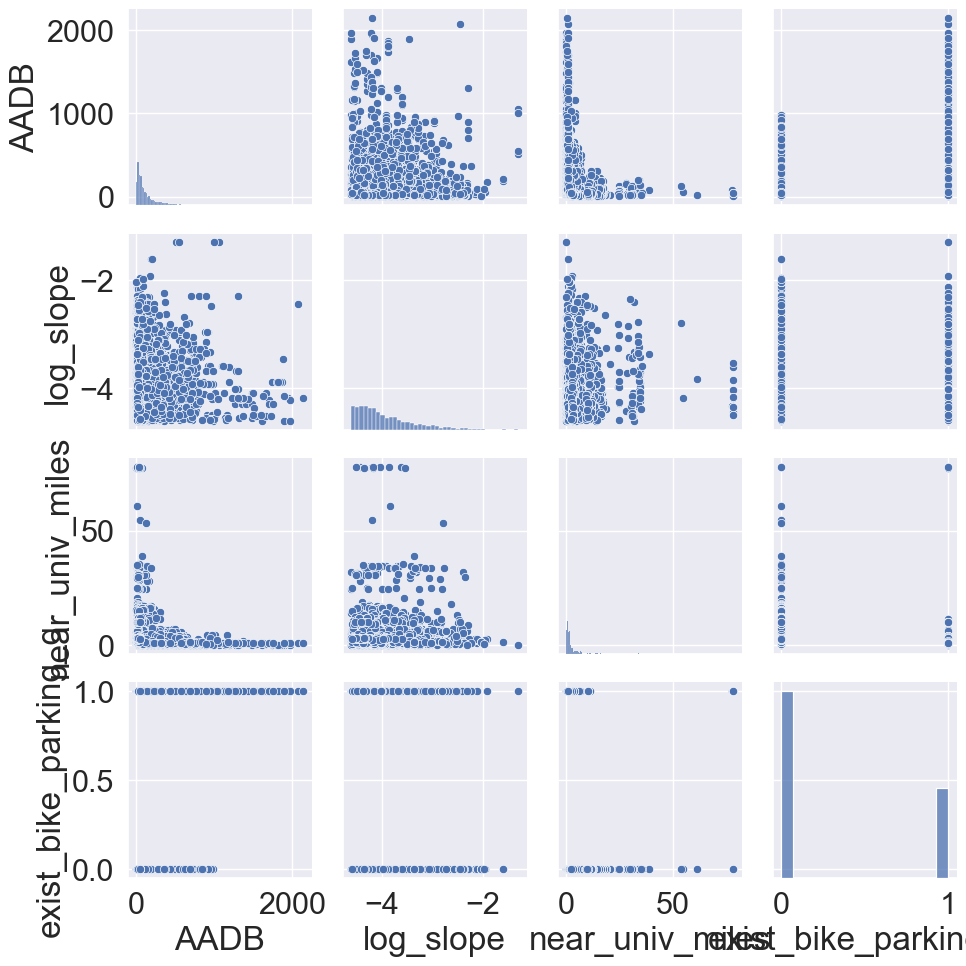

In [39]:
df2=cor_df[['AADB','log_slope','near_univ_miles','exist_bike_parking_q']]
sns.pairplot(df2)

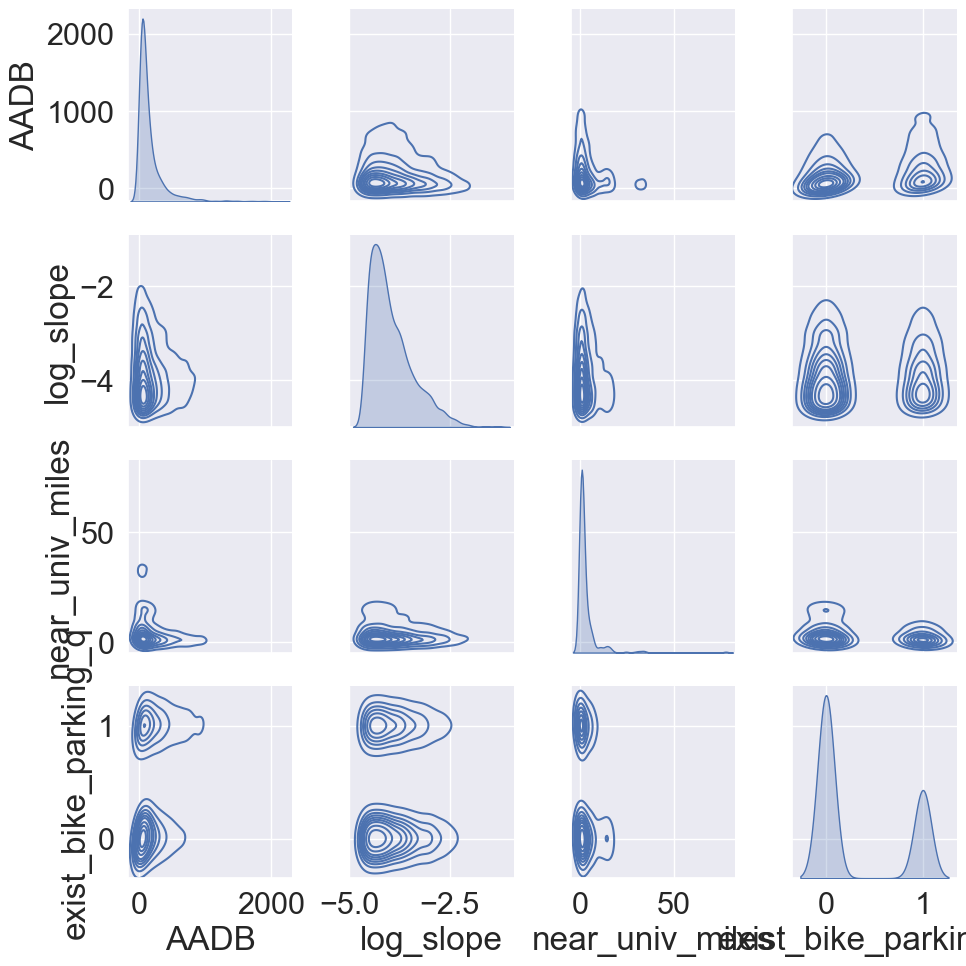

In [40]:
df2=cor_df[['AADB','log_slope','near_univ_miles','exist_bike_parking_q']]
sns.pairplot(df2, kind="kde")

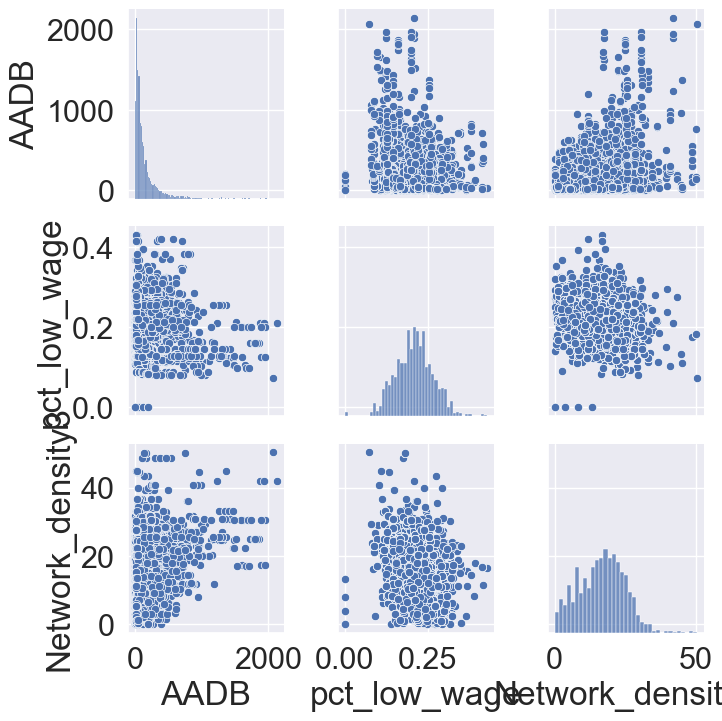

In [41]:
df3=cor_df[['AADB','pct_low_wage','Network_density3']]
sns.pairplot(df3)

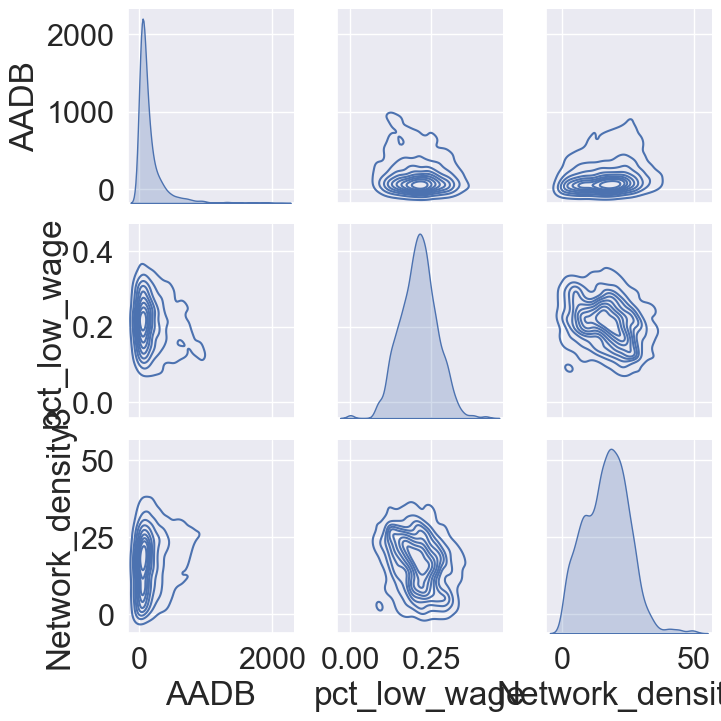

In [42]:
df3=cor_df[['AADB','pct_low_wage','Network_density3']]
sns.pairplot(df3, kind="kde")

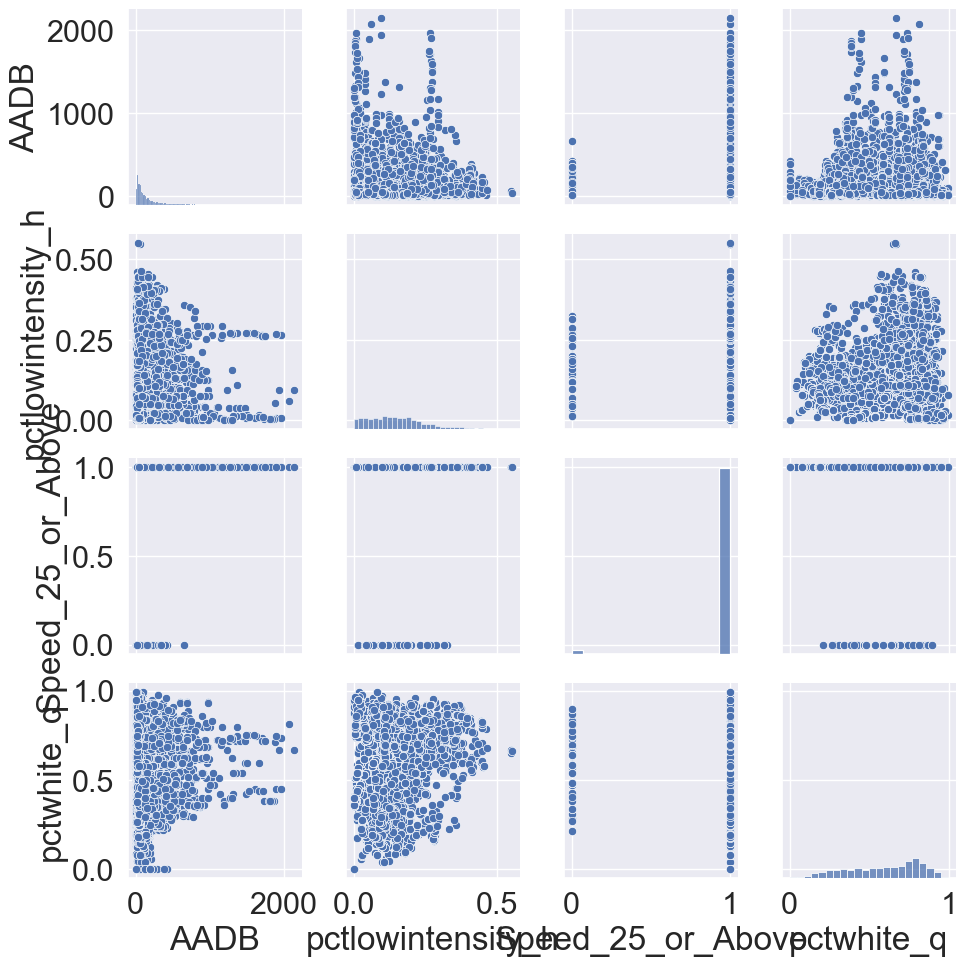

In [43]:
df4=cor_df[['AADB','pctlowintensity_h','Speed_25_or_Above','pctwhite_q']]
sns.pairplot(df4)

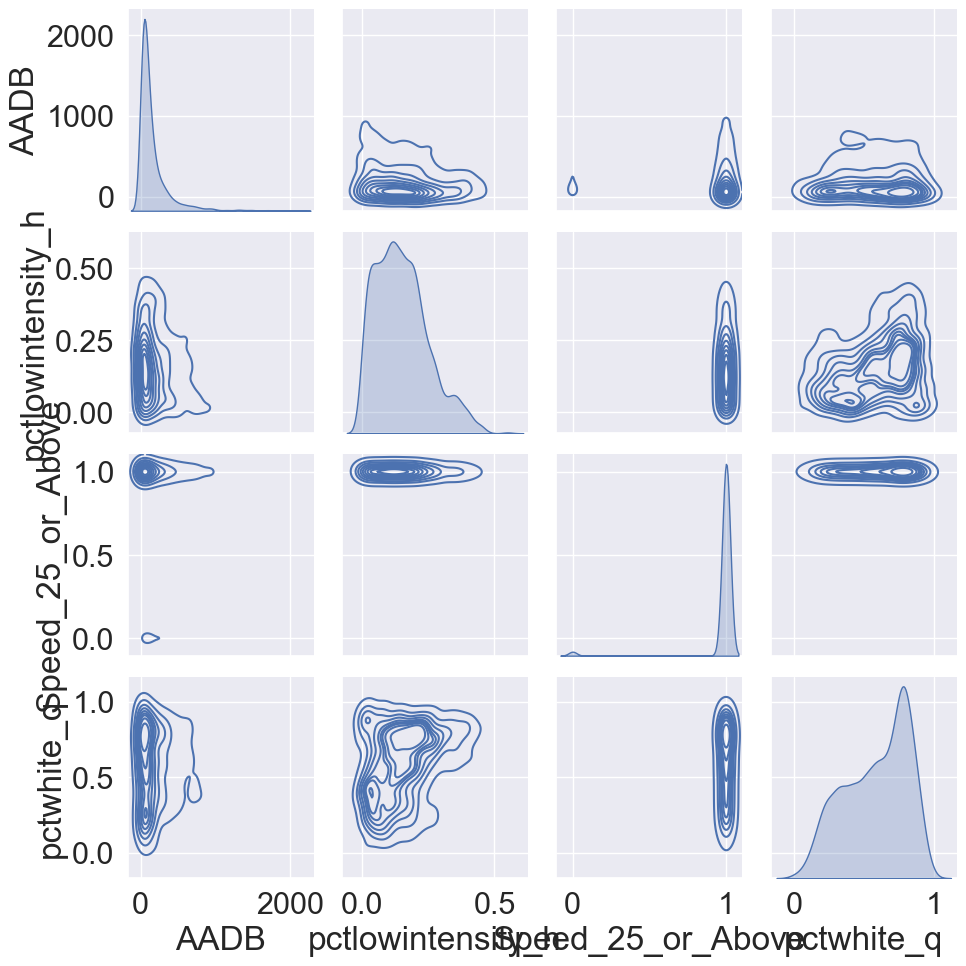

In [44]:
df4=cor_df[['AADB','pctlowintensity_h','Speed_25_or_Above','pctwhite_q']]
sns.pairplot(df4, kind="kde")

# select the Variables based on having correlation>0.20 and  VIF<=5

In [45]:
# keep only nymeric data
data2=data1._get_numeric_data()
data2.shape, data1.shape

((4209, 203), (4209, 215))

In [32]:
list(data2.columns)

['Unnamed: 0',
 'X',
 'ID',
 'Lat',
 'Long',
 'year',
 'ATT',
 'no_of_months_data_collected',
 'AADB',
 'ATT.in.Million',
 'matched_seg_id',
 'segment_id',
 'tdg_id',
 'lrs_cal_id',
 'bikes_proh',
 'int_tdg_id',
 'loc_id',
 'seg_counter',
 'fc_draft',
 'speed',
 'slope',
 'empnum_density_t',
 'geom_length',
 'adt_amt',
 'truck_adt_amt',
 'rt_lanes_amt',
 'lt_lanes_amt',
 'rt_trav_way_width',
 'rt_i_shd_tot_width',
 'rt_o_shd_tot_width',
 'lt_trav_way_width',
 'lt_i_shd_tot_width',
 'lt_o_shd_tot_width',
 'near_strava_id',
 'empnum_density_q',
 'empnum_density_h',
 'near_univ_miles',
 'near_large_univ_miles',
 'forward_trip_count',
 'reverse_trip_count',
 'forward_commute_trip_count',
 'reverse_commute_trip_count',
 'forward_leisure_trip_count',
 'reverse_leisure_trip_count',
 'forward_average_speed',
 'reverse_average_speed',
 'index',
 'ATT.in.Thousands',
 'rowIndex',
 'primary',
 'secondary',
 'tertiary',
 'residential',
 'trunk',
 'secondary_link',
 'unclassified',
 'speed_0_25',
 '

In [47]:
data3=data2.drop(['X',
 'ID',
 'Lat',
 'Long',
 'year',
 'ATT',
 'no_of_months_data_collected','ATT.in.Million',
 'matched_seg_id',
 'segment_id',
 'tdg_id',
 'lrs_cal_id',
 'bikes_proh',
 'int_tdg_id',
 'loc_id',
 'seg_counter',
 'fc_draft','geom_length','near_strava_id','index',
 'ATT.in.Thousands',
 'rowIndex', 'speed_0_25',
 'speed_21_35','Mean',
 'std',
 'outlier','primary',
 'secondary',
 'tertiary',
 'residential',
 'trunk',
 'secondary_link',
 'unclassified','Unnamed: 0','path','adt_amt',
 'truck_adt_amt',
 'rt_i_shd_tot_width',
 'rt_o_shd_tot_width',
 'lt_i_shd_tot_width', 'forward_trip_count',
 'reverse_commute_trip_count',
 'reverse_leisure_trip_count',
 'reverse_average_speed','Freeway','dist_ferry','exist_ferry_t','exist_ferry_q','exist_ferry_h', 'bgarea_t',
 'bgcliparea_t',
 'pctofbgarea_t', 'bgarea_q',
 'bgcliparea_q',
 'pctofbgarea_q', 'bgarea_h',
 'bgcliparea_h',
 'pctofbgarea_h', 'rt_lanes_amt',
 'lt_o_shd_tot_width','rt_lanes_amt',
 'lt_o_shd_tot_width','reverse_trip_count',
 'forward_leisure_trip_count',
 'forward_average_speed','lt_lanes_amt','rt_trav_way_width','lt_trav_way_width','forward_commute_trip_count','forward_commute_trip_count', 'Stv_commute_adb',
 'Stv_leisure_adb','Stv_adb','log_Stv_commute_adb',
 'log_Stv_leisure_adb'], axis=1)

In [48]:
data3.shape

(4209, 130)

In [50]:
corrMatrix1 = data3.corr()
low_corr_features = corrMatrix1.index[abs(corrMatrix1["AADB"])<=0.20]
low_corr_features

Index(['speed', 'slope', 'near_univ_miles', 'near_large_univ_miles',
       'speed_greater_than_35', 'Stv_Ave_speed', 'bike_lane', 'bike_route',
       'cycle_track', 'trail', 'Interstate', 'Principal_Arterial',
       'Minor_Arterial', 'Major_Collector', 'Minor_Collector', 'Local',
       'dist_subway', 'dist_amtrak', 'dist_busstop', 'exist_subway_t',
       'exist_amtrak_t', 'exist_busstop_t', 'exist_subway_q', 'exist_amtrak_q',
       'exist_busstop_q', 'exist_amtrak_h', 'exist_busstop_h', 'pct_low_wage',
       'pct_med_wage', 'pct_high_wage', 'Network_density1', 'Network_density2',
       'Intersection_density2', 'Intersection_density3',
       'Intersection_density41', 'Jobs_45min_auto_tt',
       'Population_45min_auto_tt', 'Population_accessibility_auto_1',
       'Population_accessibility_auto2', 'Central_index_auto2',
       'Population_accessibility_transit1', 'Central_index_transit1',
       'Population_accessibility_transit2', 'Central_index_transit2',
       'pctopenspace

In [51]:
corrMatrix1 = data3.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADB"])>0.20]
top_corr_features

Index(['AADB', 'empnum_density_t', 'empnum_density_q', 'empnum_density_h',
       'exist_bike_parking_t', 'exist_bike_parking_q', 'exist_subway_h',
       'exist_bike_parking_h', 'Residential_density',
       'Total_road_Network_density', 'Network_density3',
       'Street_Intersection_density', 'Intersection_density1',
       'Intersection_density5', 'Jobs_45min_transit_commute',
       'Population_45min_transit_commute', 'Central_index_auto1',
       'pcthighintensity_t', 'pcthighintensity_q', 'pcthighintensity_h',
       'totwhitepersqmi_t', 'pctbiketowork_t', 'totbiketoworkpersqmi_t',
       'pctatleastbachelors_t', 'totatleastbachelorspersqmi_t', 'pctnoveh_t',
       'totnovehpersqmi_t', 'popdensitysqmi_t', 'hshlddensitysqmi_t',
       'totwhitepersqmi_q', 'pctbiketowork_q', 'totbiketoworkpersqmi_q',
       'pctatleastbachelors_q', 'totatleastbachelorspersqmi_q', 'pctnoveh_q',
       'totnovehpersqmi_q', 'popdensitysqmi_q', 'hshlddensitysqmi_q',
       'totwhitepersqmi_h', 'pctbik

In [52]:
data4=data3[top_corr_features]
list(data4.columns)

['AADB',
 'empnum_density_t',
 'empnum_density_q',
 'empnum_density_h',
 'exist_bike_parking_t',
 'exist_bike_parking_q',
 'exist_subway_h',
 'exist_bike_parking_h',
 'Residential_density',
 'Total_road_Network_density',
 'Network_density3',
 'Street_Intersection_density',
 'Intersection_density1',
 'Intersection_density5',
 'Jobs_45min_transit_commute',
 'Population_45min_transit_commute',
 'Central_index_auto1',
 'pcthighintensity_t',
 'pcthighintensity_q',
 'pcthighintensity_h',
 'totwhitepersqmi_t',
 'pctbiketowork_t',
 'totbiketoworkpersqmi_t',
 'pctatleastbachelors_t',
 'totatleastbachelorspersqmi_t',
 'pctnoveh_t',
 'totnovehpersqmi_t',
 'popdensitysqmi_t',
 'hshlddensitysqmi_t',
 'totwhitepersqmi_q',
 'pctbiketowork_q',
 'totbiketoworkpersqmi_q',
 'pctatleastbachelors_q',
 'totatleastbachelorspersqmi_q',
 'pctnoveh_q',
 'totnovehpersqmi_q',
 'popdensitysqmi_q',
 'hshlddensitysqmi_q',
 'totwhitepersqmi_h',
 'pctbiketowork_h',
 'totbiketoworkpersqmi_h',
 'pctatleastbachelors_h',


In [53]:
data4.shape

(4209, 51)

In [38]:
%%time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


X_dataf = data4.drop("AADB", axis=1)

while True:
#     # Check the VIF for further filter of the data
# # calculating VIF for each feature
    #X_dataf.replace(0, 1)
    X = add_constant(X_dataf)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                           for i in range(len(X.columns))]
    vif_data=vif_data[1:]
    if vif_data['VIF'].max()<=5:
        break
    vif_data=vif_data.drop([vif_data['VIF'].idxmax()],axis='index')
    X_dataf = data4[vif_data['feature'].tolist()]
vif_data.sort_values('VIF')

CPU times: total: 26.1 s
Wall time: 25 s


feature       VIF
22                              Yolo  1.381279
9              Intersection_density1  1.439246
12               Central_index_auto1  1.566620
5                     exist_subway_h  1.650802
23                       log_Stv_adb  1.859666
20                             urban  2.227108
18             pctatleastbachelors_h  2.362242
3               exist_bike_parking_t  2.371309
17                   pctbiketowork_h  2.470369
10             Intersection_density5  2.547605
7                Residential_density  2.612611
11  Population_45min_transit_commute  2.664394
1                   empnum_density_t  2.675986
13                pcthighintensity_t  2.730092
8        Street_Intersection_density  2.842286
21                     San_Francisco  2.851827
6               exist_bike_parking_h  2.936260
15                        pctnoveh_t  3.218327
2                   empnum_density_h  3.360378
14            totbiketoworkpersqmi_t  3.425777
4               exist_bike_parking_q  3.825603
16                 totwhitepersqmi_h  4.069699
19                 totnovehpersqmi_h  4.263835

In [39]:
vif_data.shape

(23, 2)

In [40]:
list(vif_data['feature'])

['empnum_density_t',
 'empnum_density_h',
 'exist_bike_parking_t',
 'exist_bike_parking_q',
 'exist_subway_h',
 'exist_bike_parking_h',
 'Residential_density',
 'Street_Intersection_density',
 'Intersection_density1',
 'Intersection_density5',
 'Population_45min_transit_commute',
 'Central_index_auto1',
 'pcthighintensity_t',
 'totbiketoworkpersqmi_t',
 'pctnoveh_t',
 'totwhitepersqmi_h',
 'pctbiketowork_h',
 'pctatleastbachelors_h',
 'totnovehpersqmi_h',
 'urban',
 'San_Francisco',
 'Yolo',
 'log_Stv_adb']

# Now select the Independent variables that have correlation less than 0.50 among them


In [41]:
data6=data[list(vif_data['feature'])]

In [42]:
# subsequently remove the variables untill mutual correlation is 0.50
data7=data2[['AADB',
 'exist_bike_parking_q',
 'exist_subway_h',
 'Intersection_density5',
 'pctnoveh_t',
 'pctbiketowork_h',
 'urban',
 'Yolo',
 'log_Stv_adb']]

<AxesSubplot: >

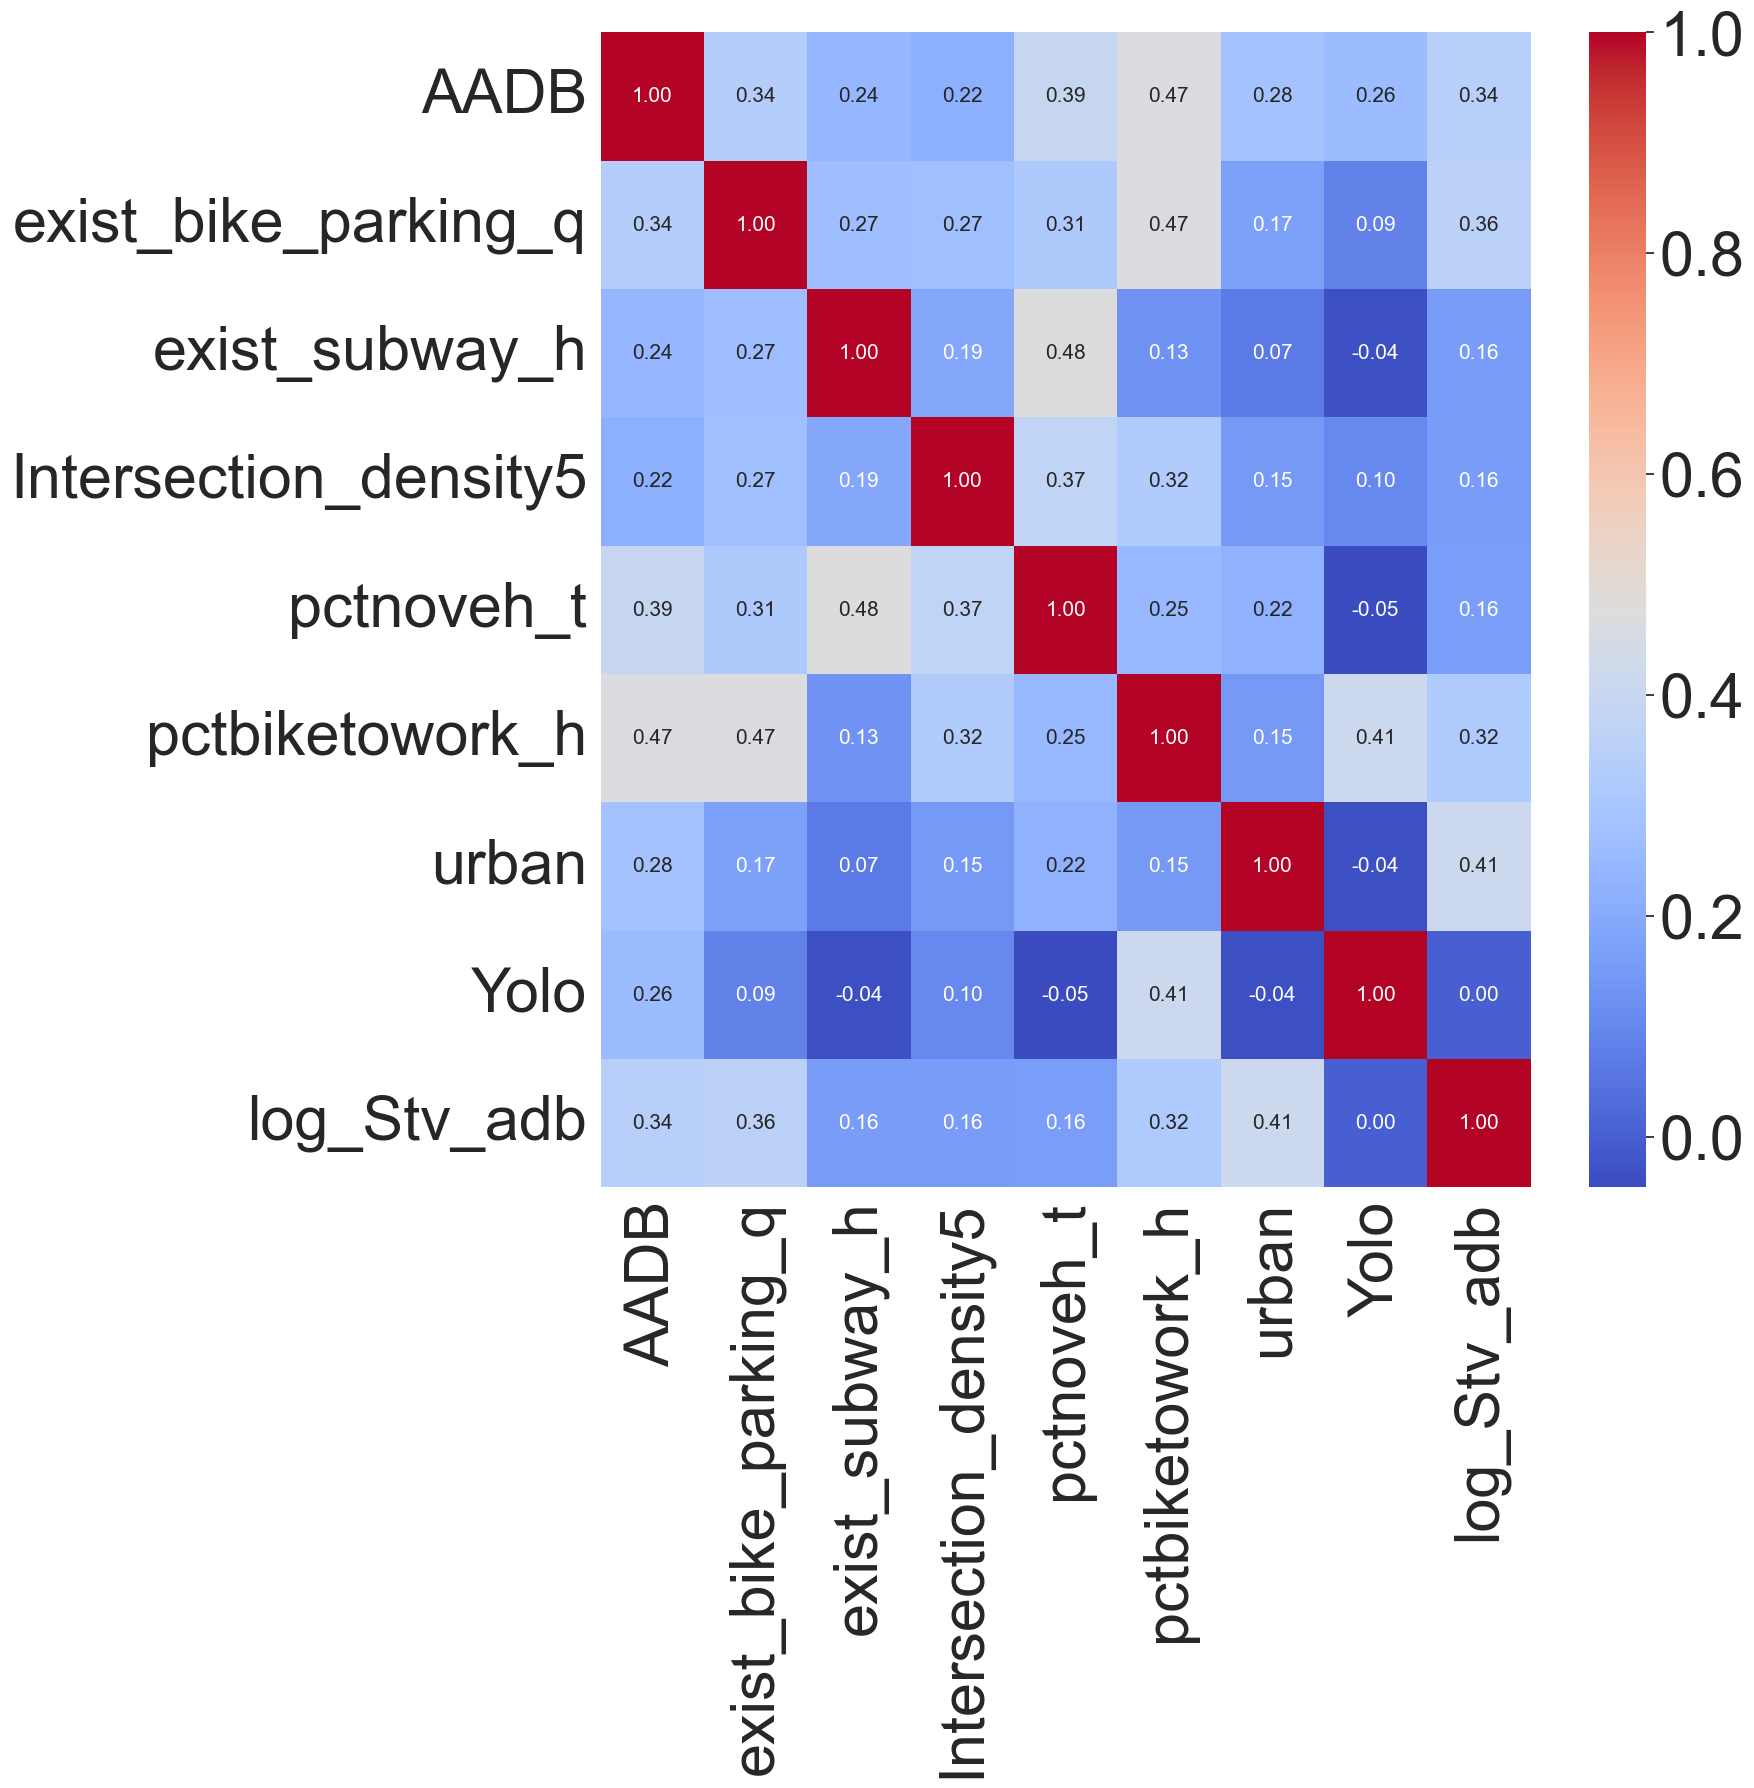

In [43]:
# Allow the mutual correlation upto 0.50
import seaborn as sb
plt.figure(figsize=(15,15))
corr = data7.corr()
sb.heatmap(corr, cmap="coolwarm", annot=True,fmt=".2f",annot_kws={"fontsize":15})

In [44]:
data8=data2[['AADB',
 'pctnoveh_t',
 'urban',
 'Yolo'
]]

<AxesSubplot: >

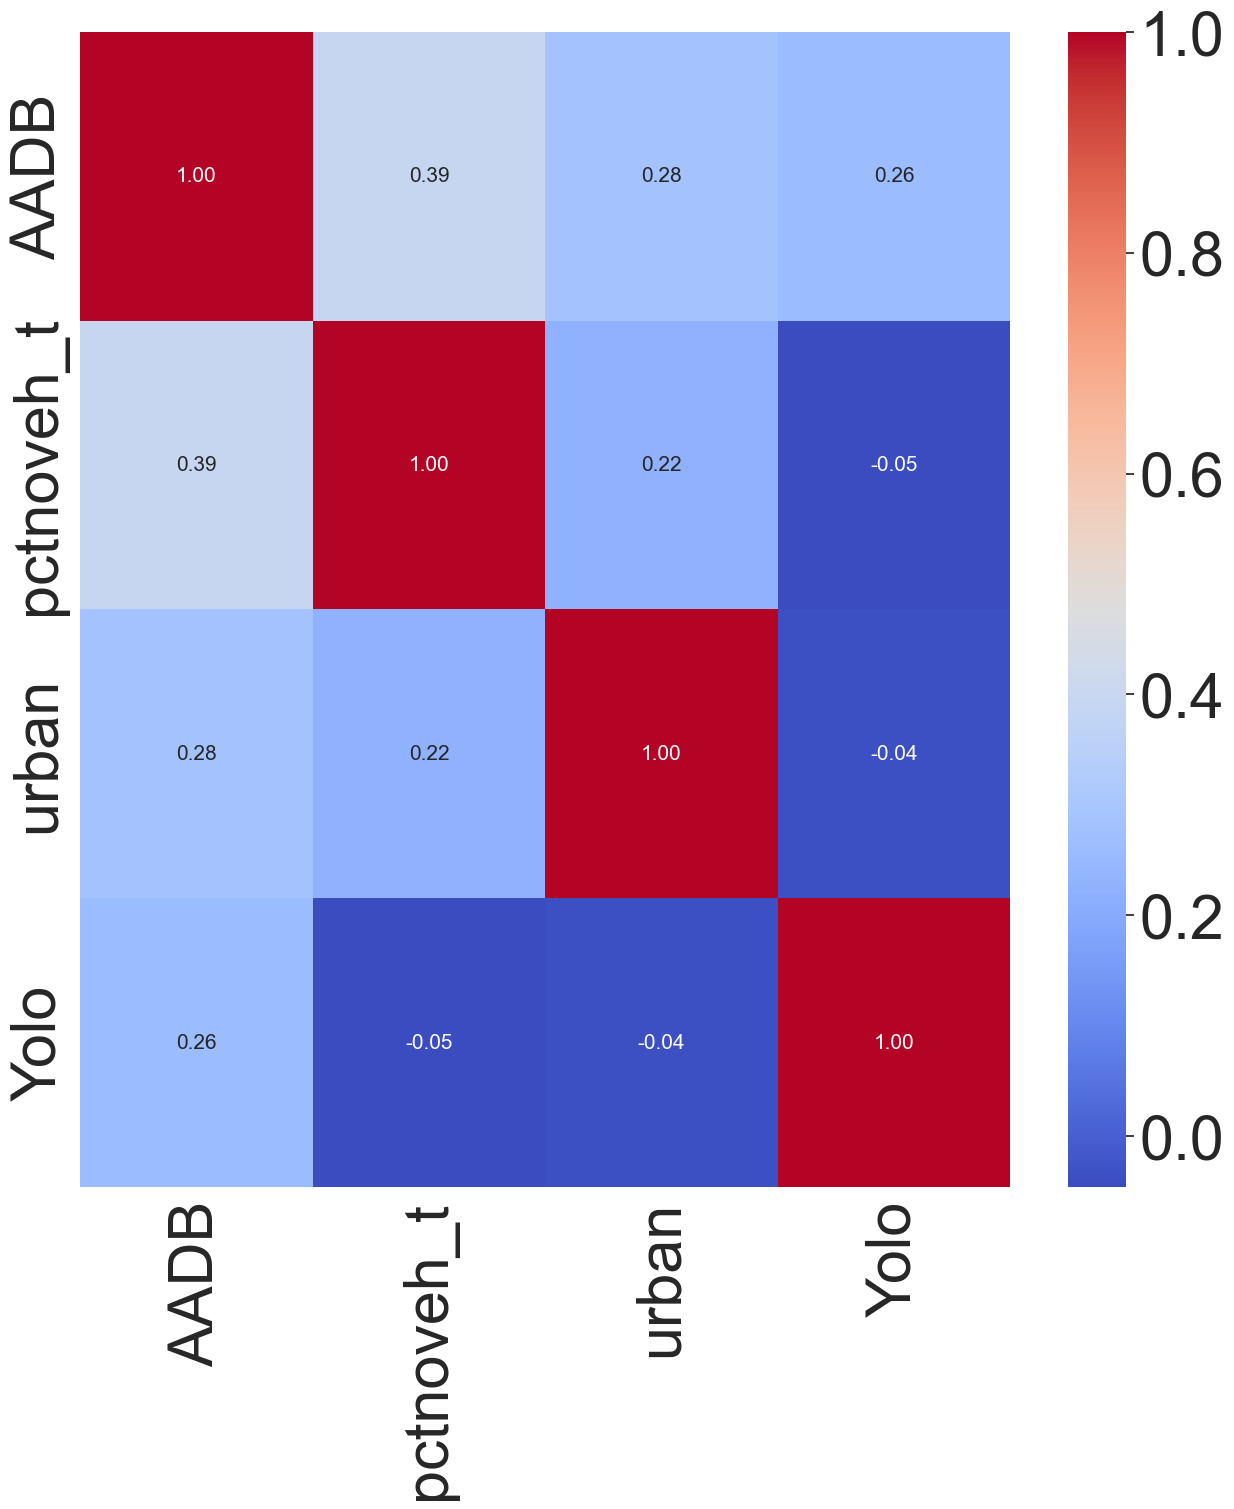

In [45]:
# Allow the mutual correlation upto 0.25
import seaborn as sb
plt.figure(figsize=(15,15))
corr1 = data8.corr()
sb.heatmap(corr1, cmap="coolwarm", annot=True,fmt=".2f",annot_kws={"fontsize":15})

<AxesSubplot: >

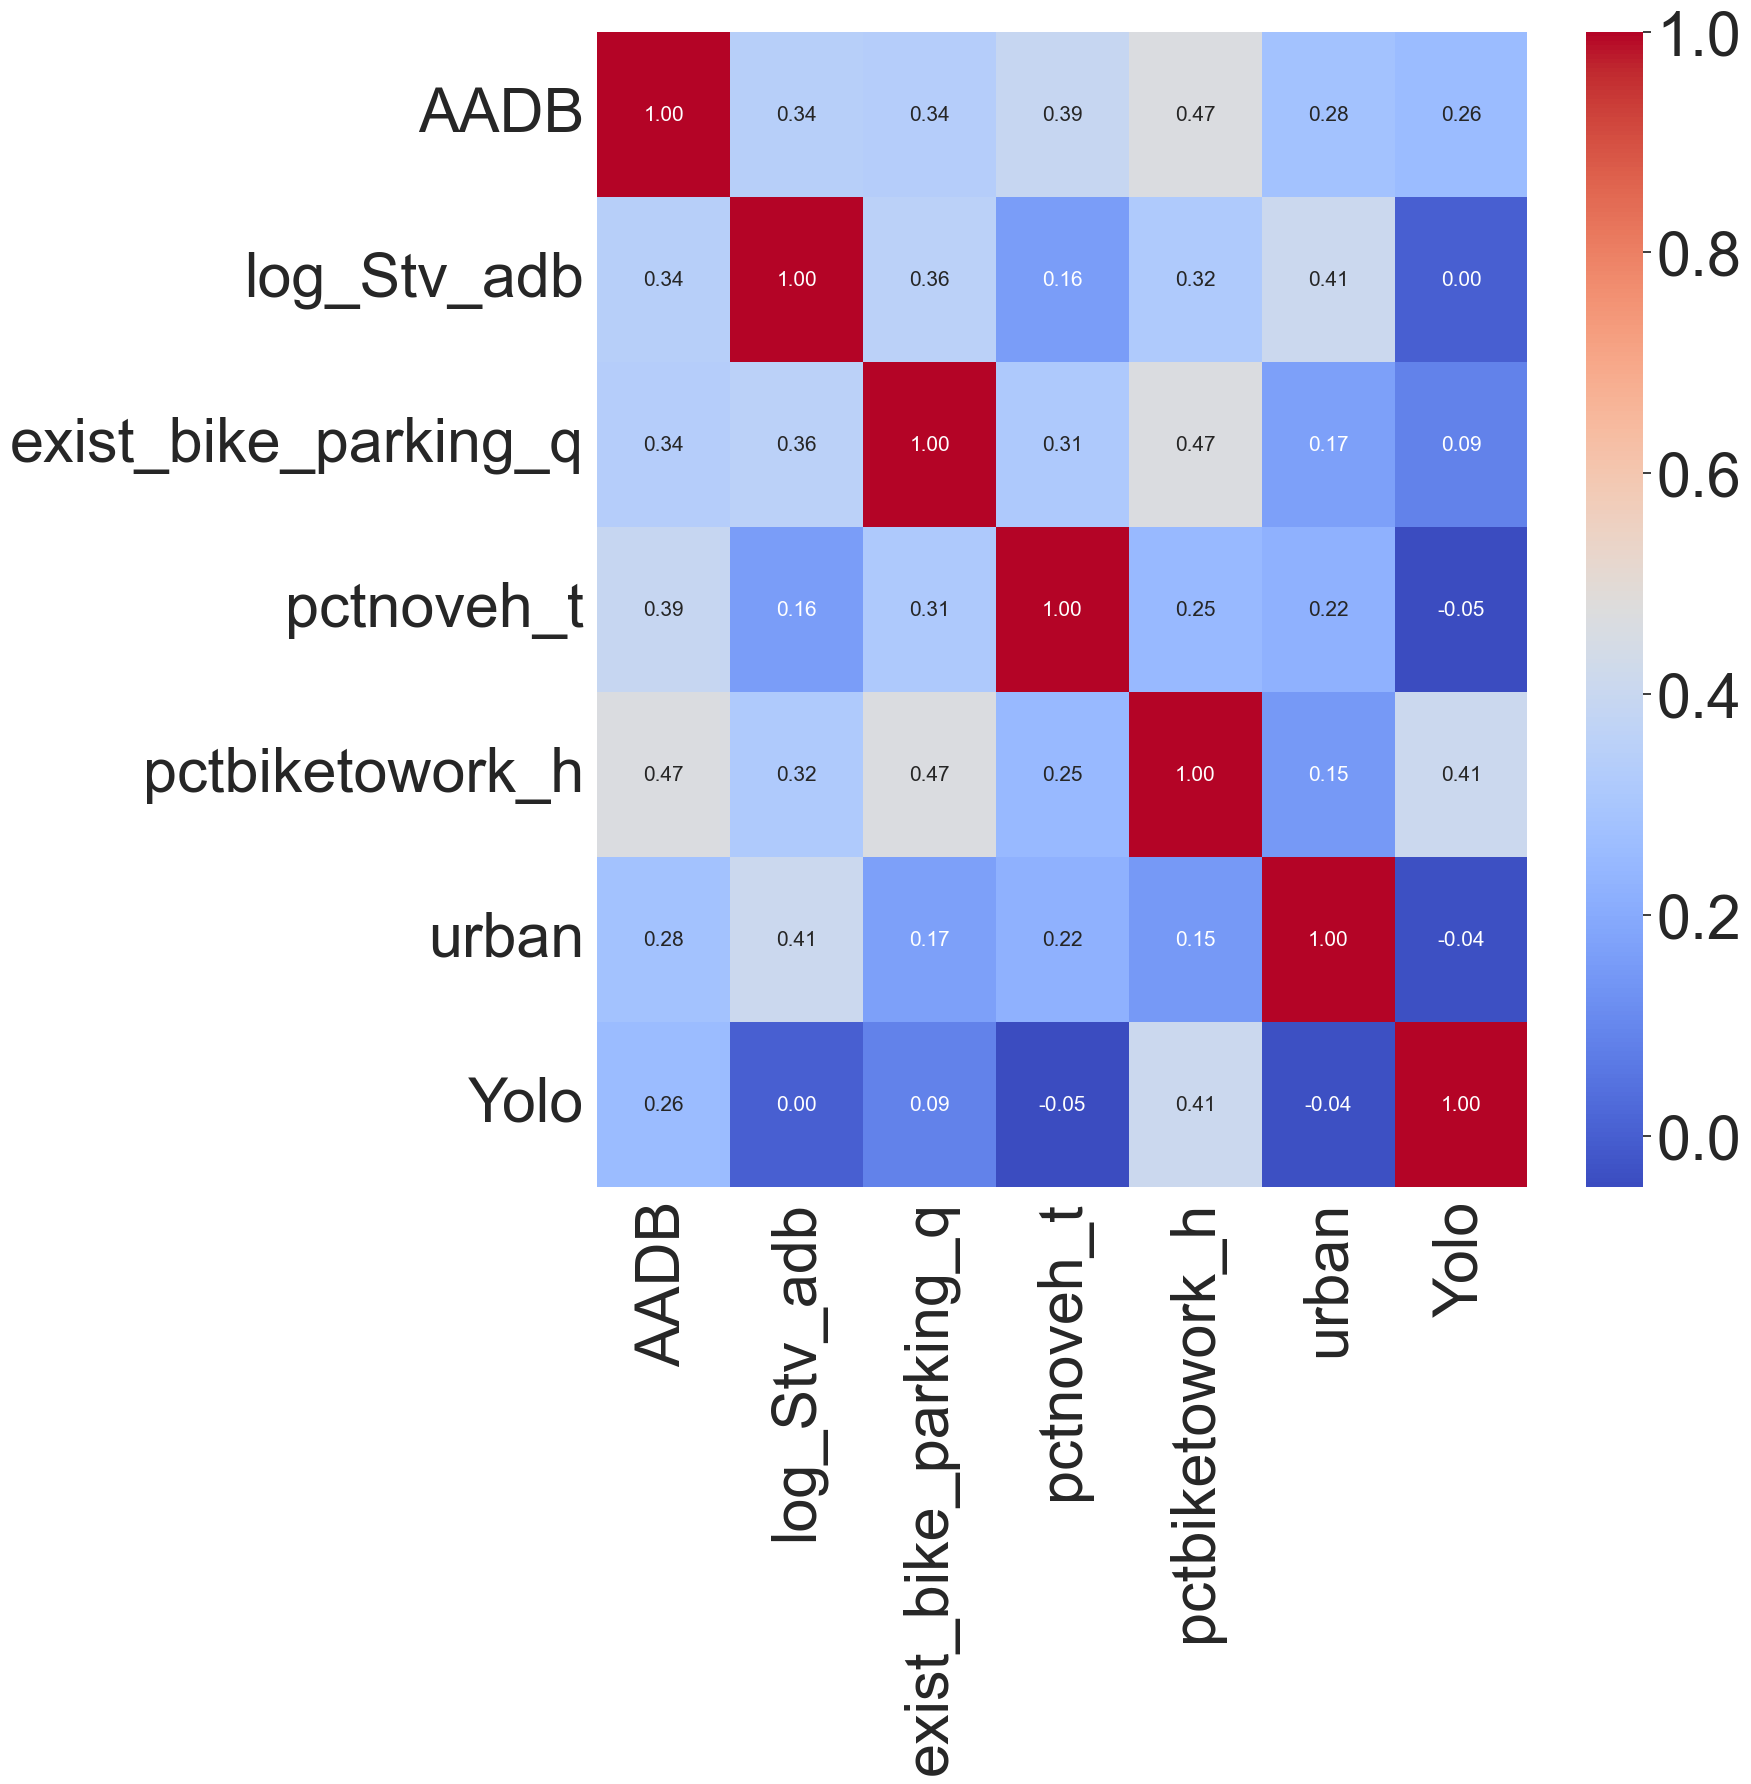

In [46]:
# Allow the mutual correlation upto 0.25
d=data1[['AADB','log_Stv_adb','exist_bike_parking_q','pctnoveh_t','pctbiketowork_h','urban','Yolo']]
import seaborn as sb
plt.figure(figsize=(15,15))
corr1 = d.corr()
sb.heatmap(corr1, cmap="coolwarm", annot=True,fmt=".2f",annot_kws={"fontsize":15})

In [47]:
# corrMatrix2 = data6.corr().abs()
# m = corrMatrix2.le(.25)
# corrMatrix3=corrMatrix2.loc[m.any(axis=1), m.any()]
# corrMatrix3

# Run the linear Regression Model

In [48]:
data7.columns

Index(['AADB', 'exist_bike_parking_q', 'exist_subway_h',
       'Intersection_density5', 'pctnoveh_t', 'pctbiketowork_h', 'urban',
       'Yolo', 'log_Stv_adb'],
      dtype='object')

In [141]:
track=data[['tdg_id','Leg','county', 'year','AADB']]
track['index']=track.index
track.head()

tdg_id  Leg   county  year  AADB  index
0  208578  NaN  Alameda  2018    31      0
1  221803  NaN  Alameda  2019    35      1
2  221803  NaN  Alameda  2019    67      2
3  214389  NaN  Alameda  2017   191      3
4  214389  NaN  Alameda  2018   214      4

In [139]:
# Now we do 10fold cv for our NB:
LR_df=data7
num_folds = 10

kfold = KFold(n_splits=10, shuffle=True, random_state=94706)

# Now we perform KFold:

fold_num = 1
lr_MAPE_train = []
lr_MAPE_scores = []
lr_RMSE_train = []
lr_RMSE_scores = []
lr_MAE_train = []
lr_MAE_scores = []
lr_R2_train = []
lr_R2_scores = []

lr_low_MAPE_scores = []
lr_low_RMSE_scores = []
lr_low_MAE_scores = []
lr_low_R2_scores = []

lr_med_MAPE_scores = []
lr_med_RMSE_scores = []
lr_med_MAE_scores = []
lr_med_R2_scores = []

lr_high_MAPE_scores = []
lr_high_RMSE_scores = []
lr_high_MAE_scores = []
lr_high_R2_scores = []
test_pred = []

# we split the entire dataframe:
for train, test in kfold.split(LR_df):
    LR_CV_model = smf.ols(formula = 'AADB ~log_Stv_adb+exist_bike_parking_q+exist_subway_h+urban+pctnoveh_t+pctbiketowork_h+Yolo', data=LR_df.iloc[train],).fit(cov_type='HC3', use_t=True)
    train_predictions = LR_CV_model.predict(LR_df.iloc[train])
    test_predictions = LR_CV_model.predict(LR_df.iloc[test])
    predictions_lr = pd.DataFrame([LR_df.iloc[test].index,LR_CV_model.predict(LR_df.iloc[test]),LR_df.iloc[test]]).transpose()
    train_mae = mean_absolute_error(LR_df.iloc[train]['AADB'], train_predictions)
    lr_MAE_train.append(train_mae)
    test_mae = mean_absolute_error(LR_df.iloc[test]['AADB'], test_predictions)
    lr_MAE_scores.append(test_mae)
    train_rmse = math.sqrt(mean_squared_error(LR_df.iloc[train]['AADB'], train_predictions))
    lr_RMSE_train.append(train_rmse)
    test_rmse = math.sqrt(mean_squared_error(LR_df.iloc[test]['AADB'], test_predictions))
    lr_RMSE_scores.append(test_rmse)
    train_mape = mean_absolute_percentage_error(LR_df.iloc[train]['AADB'], train_predictions)
    lr_MAPE_train.append(train_mape)
    test_mape = mean_absolute_percentage_error(LR_df.iloc[test]['AADB'], test_predictions)
    lr_MAPE_scores.append(test_mape)
    train_r2 = r2_score(LR_df.iloc[train]['AADB'], train_predictions)
    lr_R2_train.append(train_r2)
    score_r2 = r2_score(LR_df.iloc[test]['AADB'], test_predictions)
    lr_R2_scores.append(score_r2)
    test_pred.append(predictions_lr)
    appended_data_lr = pd.concat(test_pred)
    
        # we split the Y[test] into 3 inclusive volumes: low (0-299), medium (300-750), high (>= 751)
    low_Y_test_mask = np.all([LR_df.iloc[test]['AADB'] >= 0, LR_df.iloc[test]['AADB'] <=100], axis=0)
    med_Y_test_mask = np.all([LR_df.iloc[test]['AADB'] >= 101, LR_df.iloc[test]['AADB'] <=300], axis=0)
    high_Y_test_mask = np.all([LR_df.iloc[test]['AADB'] >= 301],axis=0)
   
    lr_low_MAPE_scores.append(mean_absolute_percentage_error(LR_df.iloc[test]['AADB'] [low_Y_test_mask], LR_CV_model.predict(LR_df.iloc[test][low_Y_test_mask])))
    lr_low_RMSE_scores.append(math.sqrt(mean_squared_error(LR_df.iloc[test]['AADB'] [low_Y_test_mask], LR_CV_model.predict(LR_df.iloc[test][low_Y_test_mask]))))
    lr_low_MAE_scores.append(mean_absolute_error(LR_df.iloc[test]['AADB'] [low_Y_test_mask], LR_CV_model.predict(LR_df.iloc[test][low_Y_test_mask])))
    lr_low_R2_scores.append(r2_score(LR_df.iloc[test]['AADB'] [low_Y_test_mask], LR_CV_model.predict(LR_df.iloc[test][low_Y_test_mask])))

    lr_med_MAPE_scores.append(mean_absolute_percentage_error(LR_df.iloc[test]['AADB'] [med_Y_test_mask], LR_CV_model.predict(LR_df.iloc[test][med_Y_test_mask])))
    lr_med_RMSE_scores.append(math.sqrt(mean_squared_error(LR_df.iloc[test]['AADB'] [med_Y_test_mask], LR_CV_model.predict(LR_df.iloc[test][med_Y_test_mask]))))
    lr_med_MAE_scores.append(mean_absolute_error(LR_df.iloc[test]['AADB'] [med_Y_test_mask], LR_CV_model.predict(LR_df.iloc[test][med_Y_test_mask])))
    lr_med_R2_scores.append(r2_score(LR_df.iloc[test]['AADB'] [med_Y_test_mask], LR_CV_model.predict(LR_df.iloc[test][med_Y_test_mask])))

    lr_high_MAPE_scores.append(mean_absolute_percentage_error(LR_df.iloc[test]['AADB'] [high_Y_test_mask], LR_CV_model.predict(LR_df.iloc[test][high_Y_test_mask])))
    lr_high_RMSE_scores.append(math.sqrt(mean_squared_error(LR_df.iloc[test]['AADB'] [high_Y_test_mask], LR_CV_model.predict(LR_df.iloc[test][high_Y_test_mask]))))
    lr_high_MAE_scores.append(mean_absolute_error(LR_df.iloc[test]['AADB'] [high_Y_test_mask], LR_CV_model.predict(LR_df.iloc[test][high_Y_test_mask])))
    lr_high_R2_scores.append(r2_score(LR_df.iloc[test]['AADB'] [med_Y_test_mask], LR_CV_model.predict(LR_df.iloc[test][med_Y_test_mask])))
    
    print(
        f"------------------------------------------Fold {fold_num}------------------------------------------")
    print(f"\tTrain MAE: {train_mae}\tScore Loss: {test_mae}")
    print(f"\tTrain RMSE: {train_rmse}\tScore RMSE: {test_rmse}")
    print(f"\tTrain MAPE: {train_mape}\tScore MAPE: {test_mape}")
    print(f"\tTrain R2:   {train_r2}\tScore R2: {score_r2}")
    print(f"\n\t3-VOLUME SCORES: LOW (n={LR_df.iloc[test][low_Y_test_mask].shape[0]}), MED (n={LR_df.iloc[test][med_Y_test_mask].shape[0]}), HIGH (n={LR_df.iloc[test][high_Y_test_mask].shape[0]}), TOTAL IN FOLD (n={test.shape[0]})")
    print(f"\tLow Loss: {lr_low_MAE_scores[-1]}\tMed Loss: {lr_med_MAE_scores[-1]}\tHigh Loss: {lr_high_MAE_scores[-1]}")
    print(f"\tLow RMSE: {lr_low_RMSE_scores[-1]}\tMed RMSE: {lr_med_RMSE_scores[-1]}\tHigh RMSE: {lr_high_RMSE_scores[-1]}")
    print(f"\tLow MAPE: {lr_low_MAPE_scores[-1]}\tMed MAPE: {lr_med_MAPE_scores[-1]}\tHigh MAPE: {lr_high_MAPE_scores[-1]}")
    print(f"\tLow R2:   {lr_low_R2_scores[-1]}\tMed R2: {lr_med_R2_scores[-1]}\tHigh R2: {lr_high_R2_scores[-1]}")
    fold_num += 1

print(f"\n\nLow MAE Average: {np.mean(lr_low_MAE_scores)} +/- {np.std(lr_low_MAE_scores)}")
print(f"Low RMSE Average: {np.mean(lr_low_RMSE_scores)} +/- {np.std(lr_low_RMSE_scores)}")
print(f"Low MAPE Average: {np.mean(lr_low_MAPE_scores)} +/- {np.std(lr_low_MAPE_scores)}")
print(f"Low R2 Average: {np.mean(lr_low_R2_scores)} +/- {np.std(lr_low_R2_scores)}\n")

print(f"\nMed MAE Average: {np.mean(lr_med_MAE_scores)} +/- {np.std(lr_med_MAE_scores)}")
print(f"Med RMSE Average: {np.mean(lr_med_RMSE_scores)} +/- {np.std(lr_med_RMSE_scores)}")
print(f"Med MAPE Average: {np.mean(lr_med_MAPE_scores)} +/- {np.std(lr_med_MAPE_scores)}")
print(f"Med R2 Average: {np.mean(lr_med_R2_scores)} +/- {np.std(lr_med_R2_scores)}\n")

print(f"\nHigh MAE Average: {np.mean(lr_high_MAE_scores)} +/- {np.std(lr_high_MAE_scores)}")
print(f"High RMSE Average: {np.mean(lr_high_RMSE_scores)} +/- {np.std(lr_high_RMSE_scores)}")
print(f"High MAPE Average: {np.mean(lr_high_MAPE_scores)} +/- {np.std(lr_high_MAPE_scores)}")
print(f"High R2 Average: {np.mean(lr_high_R2_scores)} +/- {np.std(lr_high_R2_scores)}\n")

print(f"\n\nOverall MAE: {np.mean(lr_MAE_scores)} +/- {np.std(lr_MAE_scores)}")
print(f"Overall RMSE: {np.mean(lr_RMSE_scores)} +/- {np.std(lr_RMSE_scores)}")
print(f"Overall MAPE: {np.mean(lr_MAPE_scores)} +/- {np.std(lr_MAPE_scores)}")
print(f"Overall R2: {np.mean(lr_R2_scores)} +/- {np.std(lr_R2_scores)}\n\n")


print("Delimited table for Linear Regression 10 fold:")
print("MAPE\tRMSE\tMAE\tR2")
for i in range(0, 10):
    print("%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f" %
          (lr_MAPE_train[i], lr_MAPE_scores[i], lr_RMSE_train[i], lr_RMSE_scores[i], lr_MAE_train[i], lr_MAE_scores[i], lr_R2_train[i], lr_R2_scores[i]))
print("%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t<===Averages" % (np.mean(lr_MAPE_train), np.mean(lr_MAPE_scores), np.mean(lr_RMSE_train),
      np.mean(lr_RMSE_scores), np.mean(lr_MAE_train), np.mean(lr_MAE_scores), np.mean(lr_R2_train), np.mean(lr_R2_scores)))     

------------------------------------------Fold 1------------------------------------------
	Train MAE: 115.0385817692431	Score Loss: 112.24755294617938
	Train RMSE: 186.99103591929386	Score RMSE: 163.03190142077443
	Train MAPE: 212.07676630399934	Score MAPE: 226.6841676935522
	Train R2:   0.37621892145440317	Score R2: 0.30819750618947517

	3-VOLUME SCORES: LOW (n=232), MED (n=134), HIGH (n=55), TOTAL IN FOLD (n=421)
	Low Loss: 81.05760806511924	Med Loss: 99.39386152491555	High Loss: 275.12867772536697
	Low RMSE: 112.46348608293037	Med RMSE: 121.36346971649806	High RMSE: 337.9587169318656
	Low MAPE: 365.0927632687755	Med MAPE: 60.19901358713765	High MAPE: 48.469921817329116
	Low R2:   -18.637011225280602	Med R2: -3.9306036313679815	High R2: -3.9306036313679815
------------------------------------------Fold 2------------------------------------------
	Train MAE: 112.28477407799355	Score Loss: 124.72848912815803
	Train RMSE: 181.58115164193646	Score RMSE: 210.93965124916096
	Train MAPE: 2

In [140]:
LR_CV_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   AADB   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     97.50
Date:                Thu, 12 Oct 2023   Prob (F-statistic):          2.45e-131
Time:                        12:29:06   Log-Likelihood:                -25184.
No. Observations:                3789   AIC:                         5.038e+04
Df Residuals:                    3781   BIC:                         5.043e+04
Df Model:                           7                                         
Covariance Type:                  HC3                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               35.5111      4.687      7.576      0.000      26.321      44.701
log_Stv_adb             15.8145      1.479     10.694      0.000      12.915      18.714
exist_bike_parking_q    23.8497      7.550      3.159      0.002       9.047      38.653
exist_subway_h          40.1567     12.643      3.176      0.002      15.368      64.945
urban                   83.9772     13.174      6.374      0.000      58.148     109.806
pctnoveh_t             479.7735     41.406     11.587      0.000     398.593     560.954
pctbiketowork_h       1695.6987    173.014      9.801      0.000    1356.488    2034.909
Yolo                   422.9404     92.495      4.573      0.000     241.596     604.285
==============================================================================
Omnibus:                     2207.291   Durbin-Watson:                   1.240
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33247.134
Skew:                           2.477   Prob(JB):                         0.00
Kurtosis:                      16.640   Cond. No.                         95.4
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

In [142]:
lr_data=appended_data_lr.rename(columns = {0:'Index_ID',1:'Mean Predicted AADB',2:'Observed AADB'})
LR_data1=lr_data.groupby('Index_ID').mean()
graph_lr_data=pd.merge(track,LR_data1,left_on='index', right_on='Index_ID', how="inner")
# graph_data['Mean Predicted AADB in Million']=graph_data['Mean Predicted AADB']
# graph_data['Observed AADB in Million']=graph_data['Observed AADB']
graph_lr_data.head()

tdg_id  Leg   county  year  AADB  index  Mean Predicted AADB
0  208578  NaN  Alameda  2018    31      0           314.859147
1  221803  NaN  Alameda  2019    35      1           234.610733
2  221803  NaN  Alameda  2019    67      2           233.986144
3  214389  NaN  Alameda  2017   191      3            93.044442
4  214389  NaN  Alameda  2018   214      4            91.919433

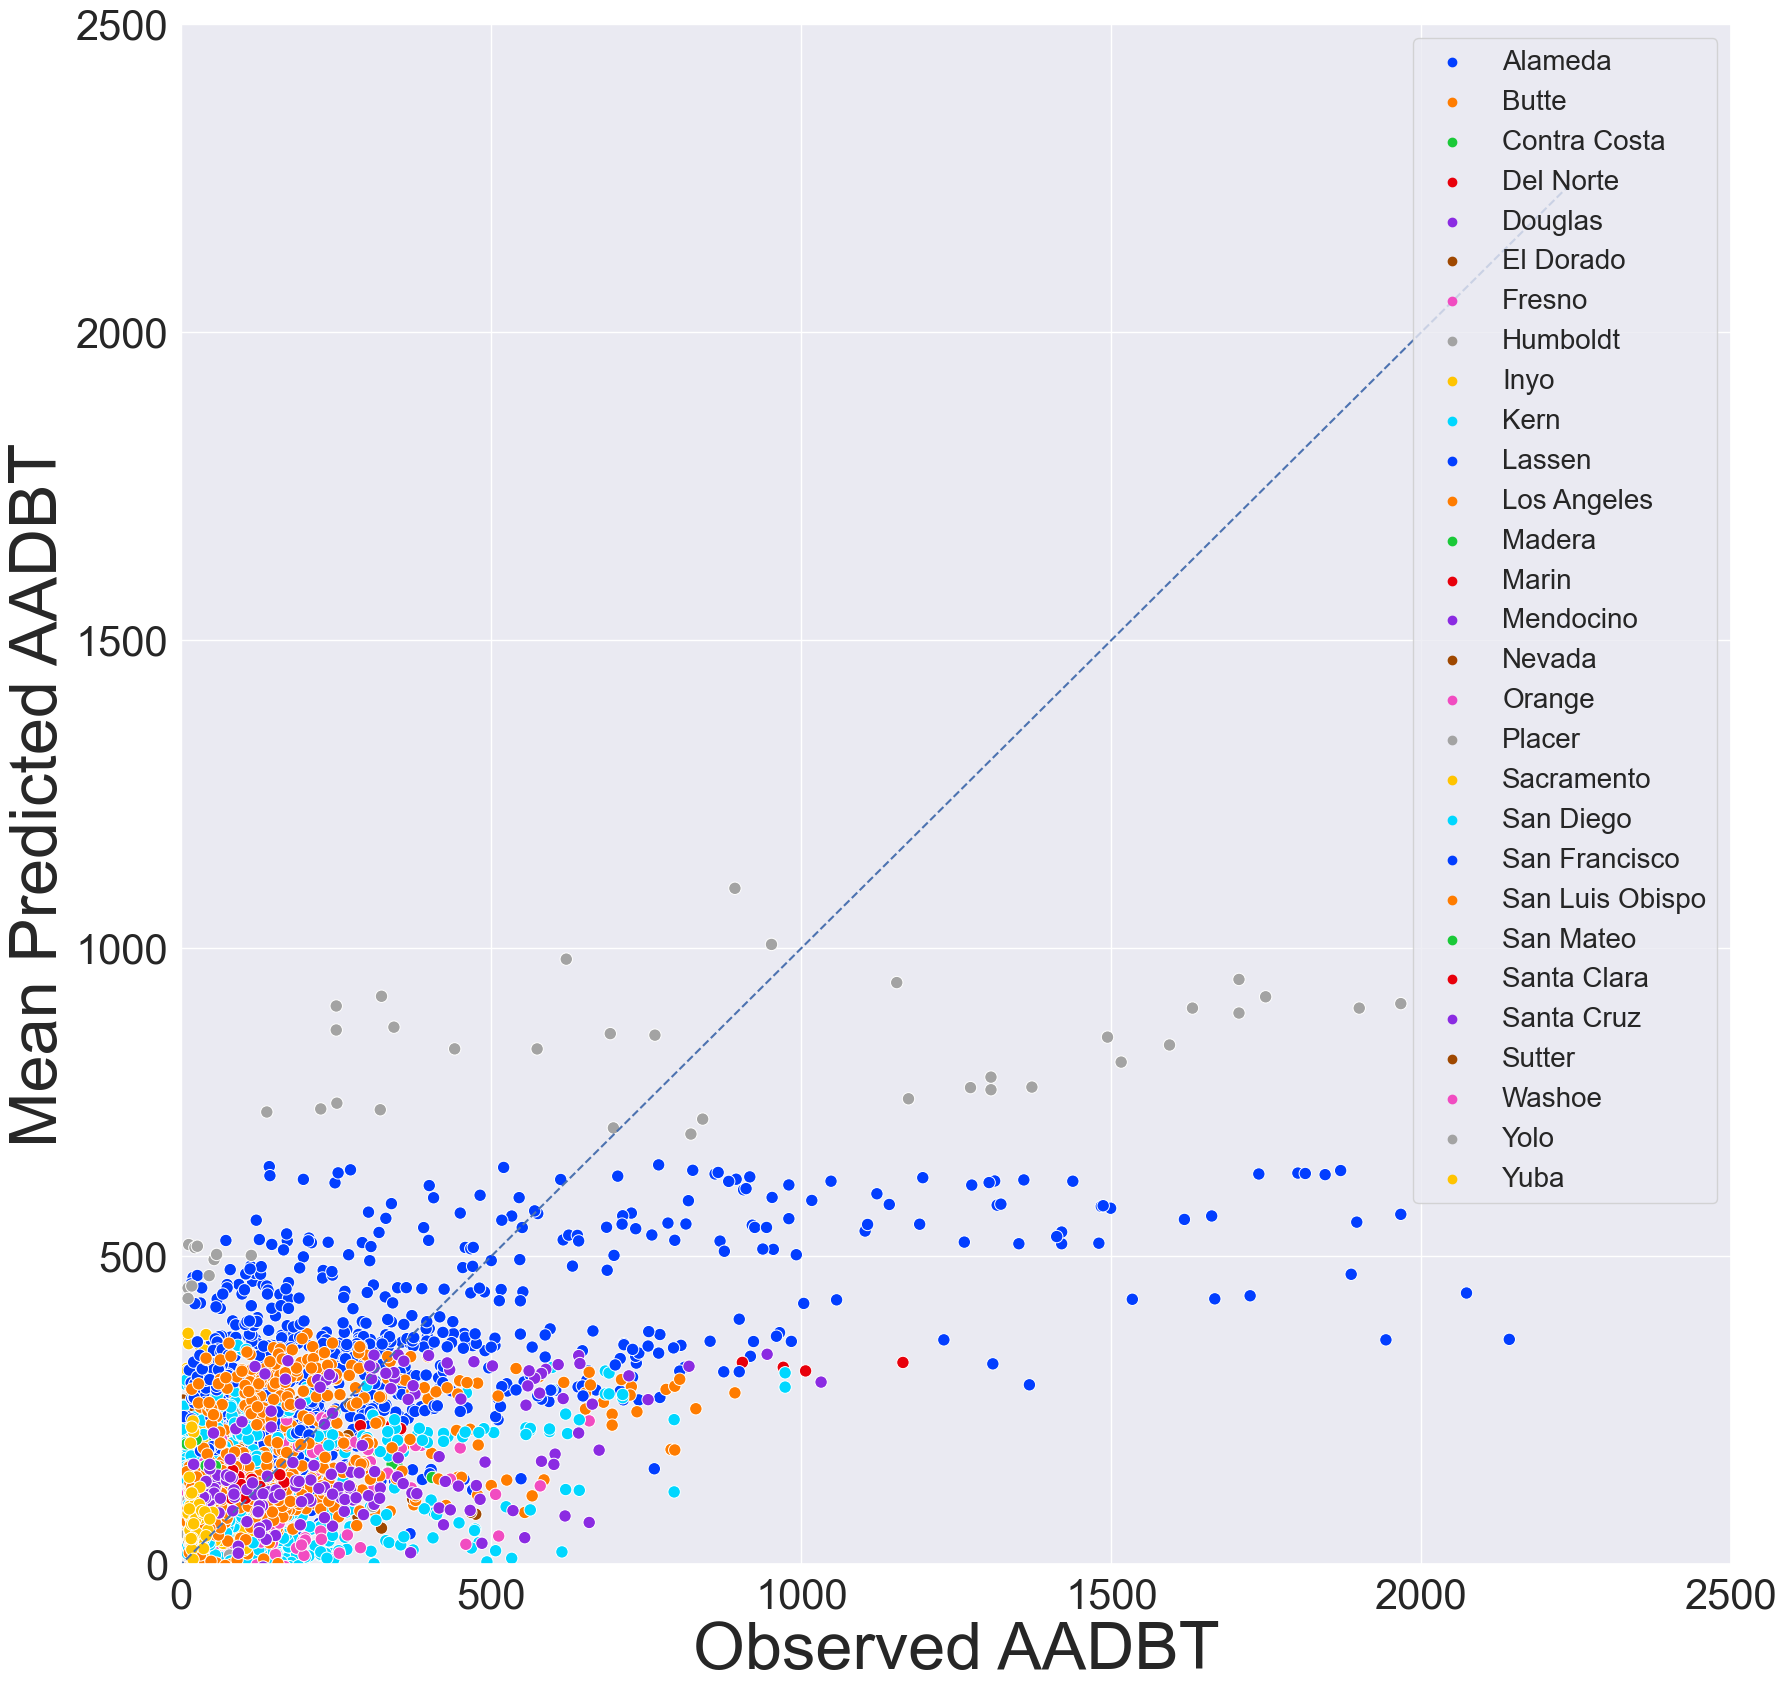

In [143]:
sns.set(font_scale=4) 
plt.figure(figsize=(20,20))
g=sns.scatterplot(data=graph_lr_data, x="AADB", y="Mean Predicted AADB", hue="county", palette="bright",s=80)
g.set(xlabel='Observed AADBT', ylabel='Mean Predicted AADBT')
g.legend(fontsize=20)
abline(1, (0,0))
plt.xlim(0,2500)
plt.ylim(0,2500)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

# Run Poisson Regression Model

In [125]:
formula_str='AADB ~log_Stv_adb+exist_bike_parking_q+urban+pctnoveh_t+pctbiketowork_h+Yolo'
#formula_str='AADB ~pctnoveh_t+urban+Yolo'

In [144]:
# track_nb=data[['tdg_id','Leg','county', 'year','AADB']]
# track_nb['index']=track_nb.index
# track_nb.head()

In [126]:
 pd.Series(pd.qcut(data7.AADB,3).value_counts())

(0.999, 51.0]      1422
(136.0, 2142.0]    1399
(51.0, 136.0]      1388
Name: AADB, dtype: int64

In [127]:
low=data7.loc[data7['AADB']<=100]
mid=data7[(data7['AADB']>100) & (data7['AADB']<=300)]
high=data7.loc[data7['AADB']>300]
low.shape, mid.shape, high.shape

((2392, 9), (1227, 9), (590, 9))

In [164]:
# Now we do 10fold cv for our NB:
NB_df=data7
num_folds = 10

kfold = KFold(n_splits=10, shuffle=True, random_state=94706)

# Now we perform KFold:

fold_num = 1
nb_MAPE_train = []
nb_MAPE_scores = []
nb_RMSE_train = []
nb_RMSE_scores = []
nb_MAE_train = []
nb_MAE_scores = []
nb_R2_train = []
nb_R2_scores = []

nb_low_MAPE_scores = []
nb_low_RMSE_scores = []
nb_low_MAE_scores = []
nb_low_R2_scores = []

nb_med_MAPE_scores = []
nb_med_RMSE_scores = []
nb_med_MAE_scores = []
nb_med_R2_scores = []

nb_high_MAPE_scores = []
nb_high_RMSE_scores = []
nb_high_MAE_scores = []
nb_high_R2_scores = []
test_pred = []

# we split the entire dataframe:
for train, test in kfold.split(NB_df):
    NB_CV_model = smf.glm(
        formula_str, data=NB_df.iloc[train], family=sm.families.Poisson()).fit(cov_type='HC3', use_t=True)

    train_predictions = NB_CV_model.predict(NB_df.iloc[train])
    test_predictions = NB_CV_model.predict(NB_df.iloc[test])
    predictions_pr = pd.DataFrame([NB_df.iloc[test].index,NB_CV_model.predict(NB_df.iloc[test]),NB_df.iloc[test]]).transpose()
    train_mae = mean_absolute_error(NB_df.iloc[train]['AADB'], train_predictions)
    nb_MAE_train.append(train_mae)
    test_mae = mean_absolute_error(NB_df.iloc[test]['AADB'], test_predictions)
    nb_MAE_scores.append(test_mae)
    train_rmse = math.sqrt(mean_squared_error(NB_df.iloc[train]['AADB'], train_predictions))
    nb_RMSE_train.append(train_rmse)
    test_rmse = math.sqrt(mean_squared_error(NB_df.iloc[test]['AADB'], test_predictions))
    nb_RMSE_scores.append(test_rmse)
    train_mape = mean_absolute_percentage_error(NB_df.iloc[train]['AADB'], train_predictions)
    nb_MAPE_train.append(train_mape)
    test_mape = mean_absolute_percentage_error(NB_df.iloc[test]['AADB'], test_predictions)
    nb_MAPE_scores.append(test_mape)
    train_r2 = r2_score(NB_df.iloc[train]['AADB'], train_predictions)
    nb_R2_train.append(train_r2)
    score_r2 = r2_score(NB_df.iloc[test]['AADB'], test_predictions)
    nb_R2_scores.append(score_r2)
    test_pred.append(predictions_pr)
    appended_data_pr = pd.concat(test_pred)
        # we split the Y[test] into 3 inclusive volumes: low (0-299), medium (300-750), high (>= 751)
    low_Y_test_mask = np.all([NB_df.iloc[test]['AADB'] >= 0, NB_df.iloc[test]['AADB'] <=100], axis=0)
    med_Y_test_mask = np.all([NB_df.iloc[test]['AADB'] >= 101, NB_df.iloc[test]['AADB'] <=300], axis=0)
    high_Y_test_mask = np.all([NB_df.iloc[test]['AADB'] >= 301],axis=0)
   
    nb_low_MAPE_scores.append(mean_absolute_percentage_error(NB_df.iloc[test]['AADB'] [low_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][low_Y_test_mask])))
    nb_low_RMSE_scores.append(math.sqrt(mean_squared_error(NB_df.iloc[test]['AADB'] [low_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][low_Y_test_mask]))))
    nb_low_MAE_scores.append(mean_absolute_error(NB_df.iloc[test]['AADB'] [low_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][low_Y_test_mask])))
    nb_low_R2_scores.append(r2_score(NB_df.iloc[test]['AADB'] [low_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][low_Y_test_mask])))

    nb_med_MAPE_scores.append(mean_absolute_percentage_error(NB_df.iloc[test]['AADB'] [med_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][med_Y_test_mask])))
    nb_med_RMSE_scores.append(math.sqrt(mean_squared_error(NB_df.iloc[test]['AADB'] [med_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][med_Y_test_mask]))))
    nb_med_MAE_scores.append(mean_absolute_error(NB_df.iloc[test]['AADB'] [med_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][med_Y_test_mask])))
    nb_med_R2_scores.append(r2_score(NB_df.iloc[test]['AADB'] [med_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][med_Y_test_mask])))

    nb_high_MAPE_scores.append(mean_absolute_percentage_error(NB_df.iloc[test]['AADB'] [high_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][high_Y_test_mask])))
    nb_high_RMSE_scores.append(math.sqrt(mean_squared_error(NB_df.iloc[test]['AADB'] [high_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][high_Y_test_mask]))))
    nb_high_MAE_scores.append(mean_absolute_error(NB_df.iloc[test]['AADB'] [high_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][high_Y_test_mask])))
    nb_high_R2_scores.append(r2_score(NB_df.iloc[test]['AADB'] [med_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][med_Y_test_mask])))
    
    print(
        f"------------------------------------------Fold {fold_num}------------------------------------------")
    print(f"\tTrain MAE: {train_mae}\tScore Loss: {test_mae}")
    print(f"\tTrain RMSE: {train_rmse}\tScore RMSE: {test_rmse}")
    print(f"\tTrain MAPE: {train_mape}\tScore MAPE: {test_mape}")
    print(f"\tTrain R2:   {train_r2}\tScore R2: {score_r2}")
    print(f"\n\t3-VOLUME SCORES: LOW (n={NB_df.iloc[test][low_Y_test_mask].shape[0]}), MED (n={NB_df.iloc[test][med_Y_test_mask].shape[0]}), HIGH (n={NB_df.iloc[test][high_Y_test_mask].shape[0]}), TOTAL IN FOLD (n={test.shape[0]})")
    print(f"\tLow Loss: {nb_low_MAE_scores[-1]}\tMed Loss: {nb_med_MAE_scores[-1]}\tHigh Loss: {nb_high_MAE_scores[-1]}")
    print(f"\tLow RMSE: {nb_low_RMSE_scores[-1]}\tMed RMSE: {nb_med_RMSE_scores[-1]}\tHigh RMSE: {nb_high_RMSE_scores[-1]}")
    print(f"\tLow MAPE: {nb_low_MAPE_scores[-1]}\tMed MAPE: {nb_med_MAPE_scores[-1]}\tHigh MAPE: {nb_high_MAPE_scores[-1]}")
    print(f"\tLow R2:   {nb_low_R2_scores[-1]}\tMed R2: {nb_med_R2_scores[-1]}\tHigh R2: {nb_high_R2_scores[-1]}")
    fold_num += 1

print(f"\n\nLow MAE Average: {np.mean(nb_low_MAE_scores)} +/- {np.std(nb_low_MAE_scores)}")
print(f"Low RMSE Average: {np.mean(nb_low_RMSE_scores)} +/- {np.std(nb_low_RMSE_scores)}")
print(f"Low MAPE Average: {np.mean(nb_low_MAPE_scores)} +/- {np.std(nb_low_MAPE_scores)}")
print(f"Low R2 Average: {np.mean(nb_low_R2_scores)} +/- {np.std(nb_low_R2_scores)}\n")

print(f"\nMed MAE Average: {np.mean(nb_med_MAE_scores)} +/- {np.std(nb_med_MAE_scores)}")
print(f"Med RMSE Average: {np.mean(nb_med_RMSE_scores)} +/- {np.std(nb_med_RMSE_scores)}")
print(f"Med MAPE Average: {np.mean(nb_med_MAPE_scores)} +/- {np.std(nb_med_MAPE_scores)}")
print(f"Med R2 Average: {np.mean(nb_med_R2_scores)} +/- {np.std(nb_med_R2_scores)}\n")

print(f"\nHigh MAE Average: {np.mean(nb_high_MAE_scores)} +/- {np.std(nb_high_MAE_scores)}")
print(f"High RMSE Average: {np.mean(nb_high_RMSE_scores)} +/- {np.std(nb_high_RMSE_scores)}")
print(f"High MAPE Average: {np.mean(nb_high_MAPE_scores)} +/- {np.std(nb_high_MAPE_scores)}")
print(f"High R2 Average: {np.mean(nb_high_R2_scores)} +/- {np.std(nb_high_R2_scores)}\n")

print(f"\n\nOverall MAE: {np.mean(nb_MAE_scores)} +/- {np.std(nb_MAE_scores)}")
print(f"Overall RMSE: {np.mean(nb_RMSE_scores)} +/- {np.std(nb_RMSE_scores)}")
print(f"Overall MAPE: {np.mean(nb_MAPE_scores)} +/- {np.std(nb_MAPE_scores)}")
print(f"Overall R2: {np.mean(nb_R2_scores)} +/- {np.std(nb_R2_scores)}\n\n")


print("Delimited table for Negative Binomial Regression 10 fold:")
print("MAPE\tRMSE\tMAE\tR2")
for i in range(0, 10):
    print("%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f" %
          (nb_MAPE_train[i], nb_MAPE_scores[i], nb_RMSE_train[i], nb_RMSE_scores[i], nb_MAE_train[i], nb_MAE_scores[i], nb_R2_train[i], nb_R2_scores[i]))
print("%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t<===Averages" % (np.mean(nb_MAPE_train), np.mean(nb_MAPE_scores), np.mean(nb_RMSE_train),
      np.mean(nb_RMSE_scores), np.mean(nb_MAE_train), np.mean(nb_MAE_scores), np.mean(nb_R2_train), np.mean(nb_R2_scores)))     

------------------------------------------Fold 1------------------------------------------
	Train MAE: 104.78198373682798	Score Loss: 103.15246982953666
	Train RMSE: 175.37523920470736	Score RMSE: 160.61400806846203
	Train MAPE: 181.58103700097087	Score MAPE: 191.57543243742626
	Train R2:   0.45130983647934086	Score R2: 0.328565309830836

	3-VOLUME SCORES: LOW (n=232), MED (n=134), HIGH (n=55), TOTAL IN FOLD (n=421)
	Low Loss: 70.540687920973	Med Loss: 84.40529897491827	High Loss: 286.389820689639
	Low RMSE: 96.55904587764955	Med RMSE: 115.27467286835548	High RMSE: 354.6256851679735
	Low MAPE: 307.6053764018252	Med MAPE: 48.41703089847106	High MAPE: 50.92595619159746
	Low R2:   -13.475655436206358	Med R2: -3.44827798524308	High R2: -3.44827798524308
------------------------------------------Fold 2------------------------------------------
	Train MAE: 103.03571828549659	Score Loss: 115.736876832944
	Train RMSE: 171.1611048333153	Score RMSE: 201.13491280064693
	Train MAPE: 182.2282913695

In [165]:
NB_CV_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   AADB   No. Observations:                 3789
Model:                            GLM   Df Residuals:                     3783
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.2009e+05
Date:                Thu, 12 Oct 2023   Deviance:                   4.1635e+05
Time:                        12:40:18   Pearson chi2:                 5.29e+05
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:                  HC3                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.2921      0.026    168.139      0.000       4.242       4.342
exist_bike_parking_q     0.1538      0.040      3.809      0.000       0.075       0.233
pctnoveh_t               1.8590      0.124     14.988      0.000       1.616       2.102
pctbiketowork_h          8.7517      0.531     16.479      0.000       7.710       9.793
urban                    0.1257      0.054      2.327      0.020       0.020       0.232
log_Stv_adb              0.1494      0.013     11.645      0.000       0.124       0.175
========================================================================================
"""

In [166]:
print(NB_CV_model.aic)

440196.8152461565


In [167]:
pr_data=appended_data_pr.rename(columns = {0:'Index_ID',1:'Mean Predicted AADB',2:'Observed AADB'})
PR_data1=pr_data.groupby('Index_ID').mean()
graph_pr_data=pd.merge(track,PR_data1,left_on='index', right_on='Index_ID', how="inner")
# graph_data['Mean Predicted AADB in Million']=graph_data['Mean Predicted AADB']
# graph_data['Observed AADB in Million']=graph_data['Observed AADB']
graph_pr_data.head()

tdg_id  Leg   county  year  AADB  index  Mean Predicted AADB
0  208578  NaN  Alameda  2018    31      0           265.458763
1  221803  NaN  Alameda  2019    35      1           141.564559
2  221803  NaN  Alameda  2019    67      2           141.678806
3  214389  NaN  Alameda  2017   191      3            59.775819
4  214389  NaN  Alameda  2018   214      4            59.131973

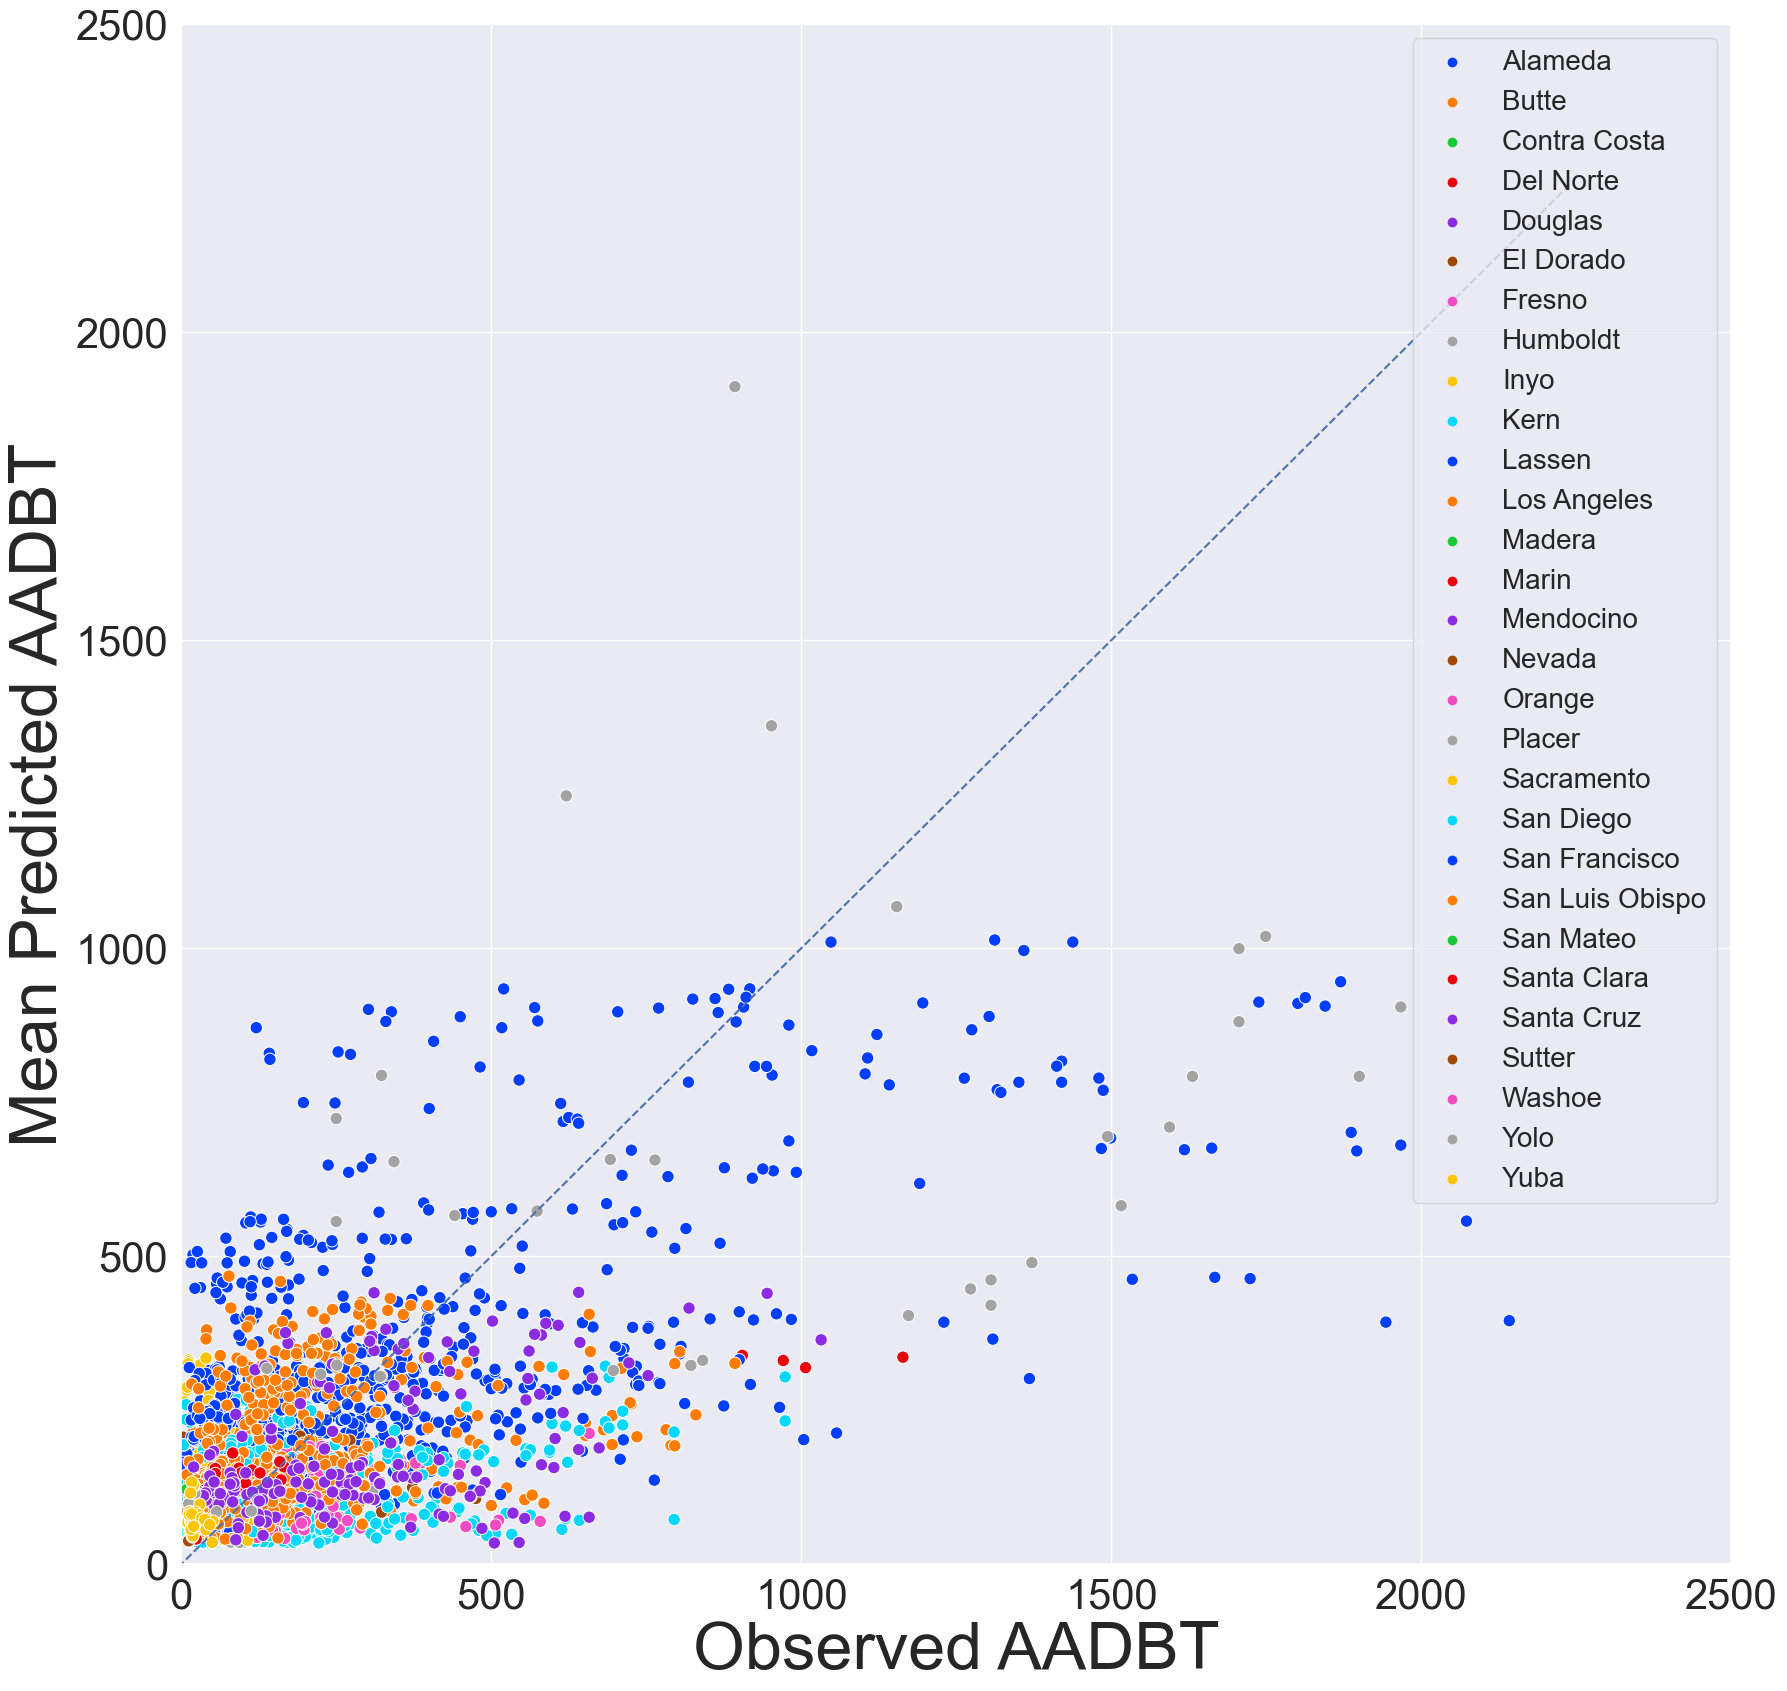

In [168]:
sns.set(font_scale=4) 
plt.figure(figsize=(20,20))
g=sns.scatterplot(data=graph_pr_data, x="AADB", y="Mean Predicted AADB", hue="county", palette="bright",s=80)
g.set(xlabel='Observed AADBT', ylabel='Mean Predicted AADBT')
g.legend(fontsize=20)
abline(1, (0,0))
plt.xlim(0,2500)
plt.ylim(0,2500)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

# Run NB Model

In [169]:
formula_str='AADB~exist_bike_parking_q+pctnoveh_t+pctbiketowork_h+urban+log_Stv_adb'

In [170]:
# Now we do 10fold cv for our NB:
NB_df=data1
num_folds = 10

kfold = KFold(n_splits=10, shuffle=True, random_state=94704)

# Now we perform KFold:

fold_num = 1
nb_MAPE_train = []
nb_MAPE_scores = []
nb_RMSE_train = []
nb_RMSE_scores = []
nb_MAE_train = []
nb_MAE_scores = []
nb_R2_train = []
nb_R2_scores = []

nb_low_MAPE_scores = []
nb_low_RMSE_scores = []
nb_low_MAE_scores = []
nb_low_R2_scores = []

nb_med_MAPE_scores = []
nb_med_RMSE_scores = []
nb_med_MAE_scores = []
nb_med_R2_scores = []

nb_high_MAPE_scores = []
nb_high_RMSE_scores = []
nb_high_MAE_scores = []
nb_high_R2_scores = []
test_pred = []

# we split the entire dataframe:
for train, test in kfold.split(NB_df):
    NB_CV_model = smf.glm(
        formula_str, data=NB_df.iloc[train], family=sm.families.NegativeBinomial()).fit(cov_type='HC3', use_t=True)

    train_predictions = NB_CV_model.predict(NB_df.iloc[train])
    test_predictions = NB_CV_model.predict(NB_df.iloc[test])
    predictions_nb = pd.DataFrame([NB_df.iloc[test].index,NB_CV_model.predict(NB_df.iloc[test]),NB_df.iloc[test]]).transpose()
    train_mae = mean_absolute_error(NB_df.iloc[train]['AADB'], train_predictions)
    nb_MAE_train.append(train_mae)
    test_mae = mean_absolute_error(NB_df.iloc[test]['AADB'], test_predictions)
    nb_MAE_scores.append(test_mae)
    train_rmse = math.sqrt(mean_squared_error(NB_df.iloc[train]['AADB'], train_predictions))
    nb_RMSE_train.append(train_rmse)
    test_rmse = math.sqrt(mean_squared_error(NB_df.iloc[test]['AADB'], test_predictions))
    nb_RMSE_scores.append(test_rmse)
    train_mape = mean_absolute_percentage_error(NB_df.iloc[train]['AADB'], train_predictions)
    nb_MAPE_train.append(train_mape)
    test_mape = mean_absolute_percentage_error(NB_df.iloc[test]['AADB'], test_predictions)
    nb_MAPE_scores.append(test_mape)
    train_r2 = r2_score(NB_df.iloc[train]['AADB'], train_predictions)
    nb_R2_train.append(train_r2)
    score_r2 = r2_score(NB_df.iloc[test]['AADB'], test_predictions)
    nb_R2_scores.append(score_r2)
    test_pred.append(predictions_nb)
    appended_data_nb = pd.concat(test_pred)
    
        # we split the Y[test] into 3 inclusive volumes: low (0-299), medium (300-750), high (>= 751)
    low_Y_test_mask = np.all([NB_df.iloc[test]['AADB'] >= 0, NB_df.iloc[test]['AADB'] <=100], axis=0)
    med_Y_test_mask = np.all([NB_df.iloc[test]['AADB'] >= 101, NB_df.iloc[test]['AADB'] <=300], axis=0)
    high_Y_test_mask = np.all([NB_df.iloc[test]['AADB'] >= 301],axis=0)
   
    nb_low_MAPE_scores.append(mean_absolute_percentage_error(NB_df.iloc[test]['AADB'] [low_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][low_Y_test_mask])))
    nb_low_RMSE_scores.append(math.sqrt(mean_squared_error(NB_df.iloc[test]['AADB'] [low_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][low_Y_test_mask]))))
    nb_low_MAE_scores.append(mean_absolute_error(NB_df.iloc[test]['AADB'] [low_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][low_Y_test_mask])))
    nb_low_R2_scores.append(r2_score(NB_df.iloc[test]['AADB'] [low_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][low_Y_test_mask])))

    nb_med_MAPE_scores.append(mean_absolute_percentage_error(NB_df.iloc[test]['AADB'] [med_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][med_Y_test_mask])))
    nb_med_RMSE_scores.append(math.sqrt(mean_squared_error(NB_df.iloc[test]['AADB'] [med_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][med_Y_test_mask]))))
    nb_med_MAE_scores.append(mean_absolute_error(NB_df.iloc[test]['AADB'] [med_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][med_Y_test_mask])))
    nb_med_R2_scores.append(r2_score(NB_df.iloc[test]['AADB'] [med_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][med_Y_test_mask])))

    nb_high_MAPE_scores.append(mean_absolute_percentage_error(NB_df.iloc[test]['AADB'] [high_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][high_Y_test_mask])))
    nb_high_RMSE_scores.append(math.sqrt(mean_squared_error(NB_df.iloc[test]['AADB'] [high_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][high_Y_test_mask]))))
    nb_high_MAE_scores.append(mean_absolute_error(NB_df.iloc[test]['AADB'] [high_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][high_Y_test_mask])))
    nb_high_R2_scores.append(r2_score(NB_df.iloc[test]['AADB'] [med_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][med_Y_test_mask])))
    
    print(
        f"------------------------------------------Fold {fold_num}------------------------------------------")
    print(f"\tTrain MAE: {train_mae}\tScore Loss: {test_mae}")
    print(f"\tTrain RMSE: {train_rmse}\tScore RMSE: {test_rmse}")
    print(f"\tTrain MAPE: {train_mape}\tScore MAPE: {test_mape}")
    print(f"\tTrain R2:   {train_r2}\tScore R2: {score_r2}")
    print(f"\n\t3-VOLUME SCORES: LOW (n={NB_df.iloc[test][low_Y_test_mask].shape[0]}), MED (n={NB_df.iloc[test][med_Y_test_mask].shape[0]}), HIGH (n={NB_df.iloc[test][high_Y_test_mask].shape[0]}), TOTAL IN FOLD (n={test.shape[0]})")
    print(f"\tLow Loss: {nb_low_MAE_scores[-1]}\tMed Loss: {nb_med_MAE_scores[-1]}\tHigh Loss: {nb_high_MAE_scores[-1]}")
    print(f"\tLow RMSE: {nb_low_RMSE_scores[-1]}\tMed RMSE: {nb_med_RMSE_scores[-1]}\tHigh RMSE: {nb_high_RMSE_scores[-1]}")
    print(f"\tLow MAPE: {nb_low_MAPE_scores[-1]}\tMed MAPE: {nb_med_MAPE_scores[-1]}\tHigh MAPE: {nb_high_MAPE_scores[-1]}")
    print(f"\tLow R2:   {nb_low_R2_scores[-1]}\tMed R2: {nb_med_R2_scores[-1]}\tHigh R2: {nb_high_R2_scores[-1]}")
    fold_num += 1

print(f"\n\nLow MAE Average: {np.mean(nb_low_MAE_scores)} +/- {np.std(nb_low_MAE_scores)}")
print(f"Low RMSE Average: {np.mean(nb_low_RMSE_scores)} +/- {np.std(nb_low_RMSE_scores)}")
print(f"Low MAPE Average: {np.mean(nb_low_MAPE_scores)} +/- {np.std(nb_low_MAPE_scores)}")
print(f"Low R2 Average: {np.mean(nb_low_R2_scores)} +/- {np.std(nb_low_R2_scores)}\n")

print(f"\nMed MAE Average: {np.mean(nb_med_MAE_scores)} +/- {np.std(nb_med_MAE_scores)}")
print(f"Med RMSE Average: {np.mean(nb_med_RMSE_scores)} +/- {np.std(nb_med_RMSE_scores)}")
print(f"Med MAPE Average: {np.mean(nb_med_MAPE_scores)} +/- {np.std(nb_med_MAPE_scores)}")
print(f"Med R2 Average: {np.mean(nb_med_R2_scores)} +/- {np.std(nb_med_R2_scores)}\n")

print(f"\nHigh MAE Average: {np.mean(nb_high_MAE_scores)} +/- {np.std(nb_high_MAE_scores)}")
print(f"High RMSE Average: {np.mean(nb_high_RMSE_scores)} +/- {np.std(nb_high_RMSE_scores)}")
print(f"High MAPE Average: {np.mean(nb_high_MAPE_scores)} +/- {np.std(nb_high_MAPE_scores)}")
print(f"High R2 Average: {np.mean(nb_high_R2_scores)} +/- {np.std(nb_high_R2_scores)}\n")

print(f"\n\nOverall MAE: {np.mean(nb_MAE_scores)} +/- {np.std(nb_MAE_scores)}")
print(f"Overall RMSE: {np.mean(nb_RMSE_scores)} +/- {np.std(nb_RMSE_scores)}")
print(f"Overall MAPE: {np.mean(nb_MAPE_scores)} +/- {np.std(nb_MAPE_scores)}")
print(f"Overall R2: {np.mean(nb_R2_scores)} +/- {np.std(nb_R2_scores)}\n\n")


print("Delimited table for Negative Binomial Regression 10 fold:")
print("MAPE\tRMSE\tMAE\tR2")
for i in range(0, 10):
    print("%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f" %
          (nb_MAPE_train[i], nb_MAPE_scores[i], nb_RMSE_train[i], nb_RMSE_scores[i], nb_MAE_train[i], nb_MAE_scores[i], nb_R2_train[i], nb_R2_scores[i]))
print("%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t<===Averages" % (np.mean(nb_MAPE_train), np.mean(nb_MAPE_scores), np.mean(nb_RMSE_train),
      np.mean(nb_RMSE_scores), np.mean(nb_MAE_train), np.mean(nb_MAE_scores), np.mean(nb_R2_train), np.mean(nb_R2_scores))) 

------------------------------------------Fold 1------------------------------------------
	Train MAE: 106.51413361644842	Score Loss: 109.38209433236074
	Train RMSE: 180.2738756479418	Score RMSE: 178.84989191593397
	Train MAPE: 195.05134507237358	Score MAPE: 167.24603955376298
	Train R2:   0.40612584625357284	Score R2: 0.3659342059204178

	3-VOLUME SCORES: LOW (n=228), MED (n=133), HIGH (n=60), TOTAL IN FOLD (n=421)
	Low Loss: 76.44091949149609	Med Loss: 79.59904386602732	High Loss: 300.5776539280187
	Low RMSE: 105.61614114903131	Med RMSE: 113.38270594416205	High RMSE: 391.8664578472495
	Low MAPE: 269.5590919436304	Med MAPE: 44.69512177639841	High MAPE: 50.110974878758185
	Low R2:   -17.751714536326965	Med R2: -3.004662469201545	High R2: -3.004662469201545
------------------------------------------Fold 2------------------------------------------
	Train MAE: 106.72182913300267	Score Loss: 105.3522726428397
	Train RMSE: 179.04902200765608	Score RMSE: 180.5650642221564
	Train MAPE: 191.12

In [171]:
NB_CV_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   AADB   No. Observations:                 3789
Model:                            GLM   Df Residuals:                     3783
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -22151.
Date:                Thu, 12 Oct 2023   Deviance:                       3047.5
Time:                        12:40:38   Pearson chi2:                 3.63e+03
No. Iterations:                    11   Pseudo R-squ. (CS):             0.3709
Covariance Type:                  HC3                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.2988      0.024    182.814      0.000       4.253       4.345
exist_bike_parking_q     0.1281      0.039      3.285      0.001       0.052       0.205
pctnoveh_t               1.8303      0.118     15.454      0.000       1.598       2.062
pctbiketowork_h          9.8708      0.513     19.226      0.000       8.864      10.877
urban                    0.2969      0.058      5.149      0.000       0.184       0.410
log_Stv_adb              0.0770      0.008      9.158      0.000       0.060       0.093
========================================================================================
"""

In [172]:
nb_data=appended_data_nb.rename(columns = {0:'Index_ID',1:'Mean Predicted AADB',2:'Observed AADB'})
NB_data1=nb_data.groupby('Index_ID').mean()
graph_pr_data=pd.merge(track,NB_data1,left_on='index', right_on='Index_ID', how="inner")
# graph_data['Mean Predicted AADB in Million']=graph_data['Mean Predicted AADB']
# graph_data['Observed AADB in Million']=graph_data['Observed AADB']
graph_nb_data.head()

tdg_id  Leg   county  year  AADB  index  Mean Predicted AADB
0  208578  NaN  Alameda  2018    31      0           260.084245
1  221803  NaN  Alameda  2019    35      1           137.024973
2  221803  NaN  Alameda  2019    67      2           137.548121
3  214389  NaN  Alameda  2017   191      3            59.704499
4  214389  NaN  Alameda  2018   214      4            59.020219

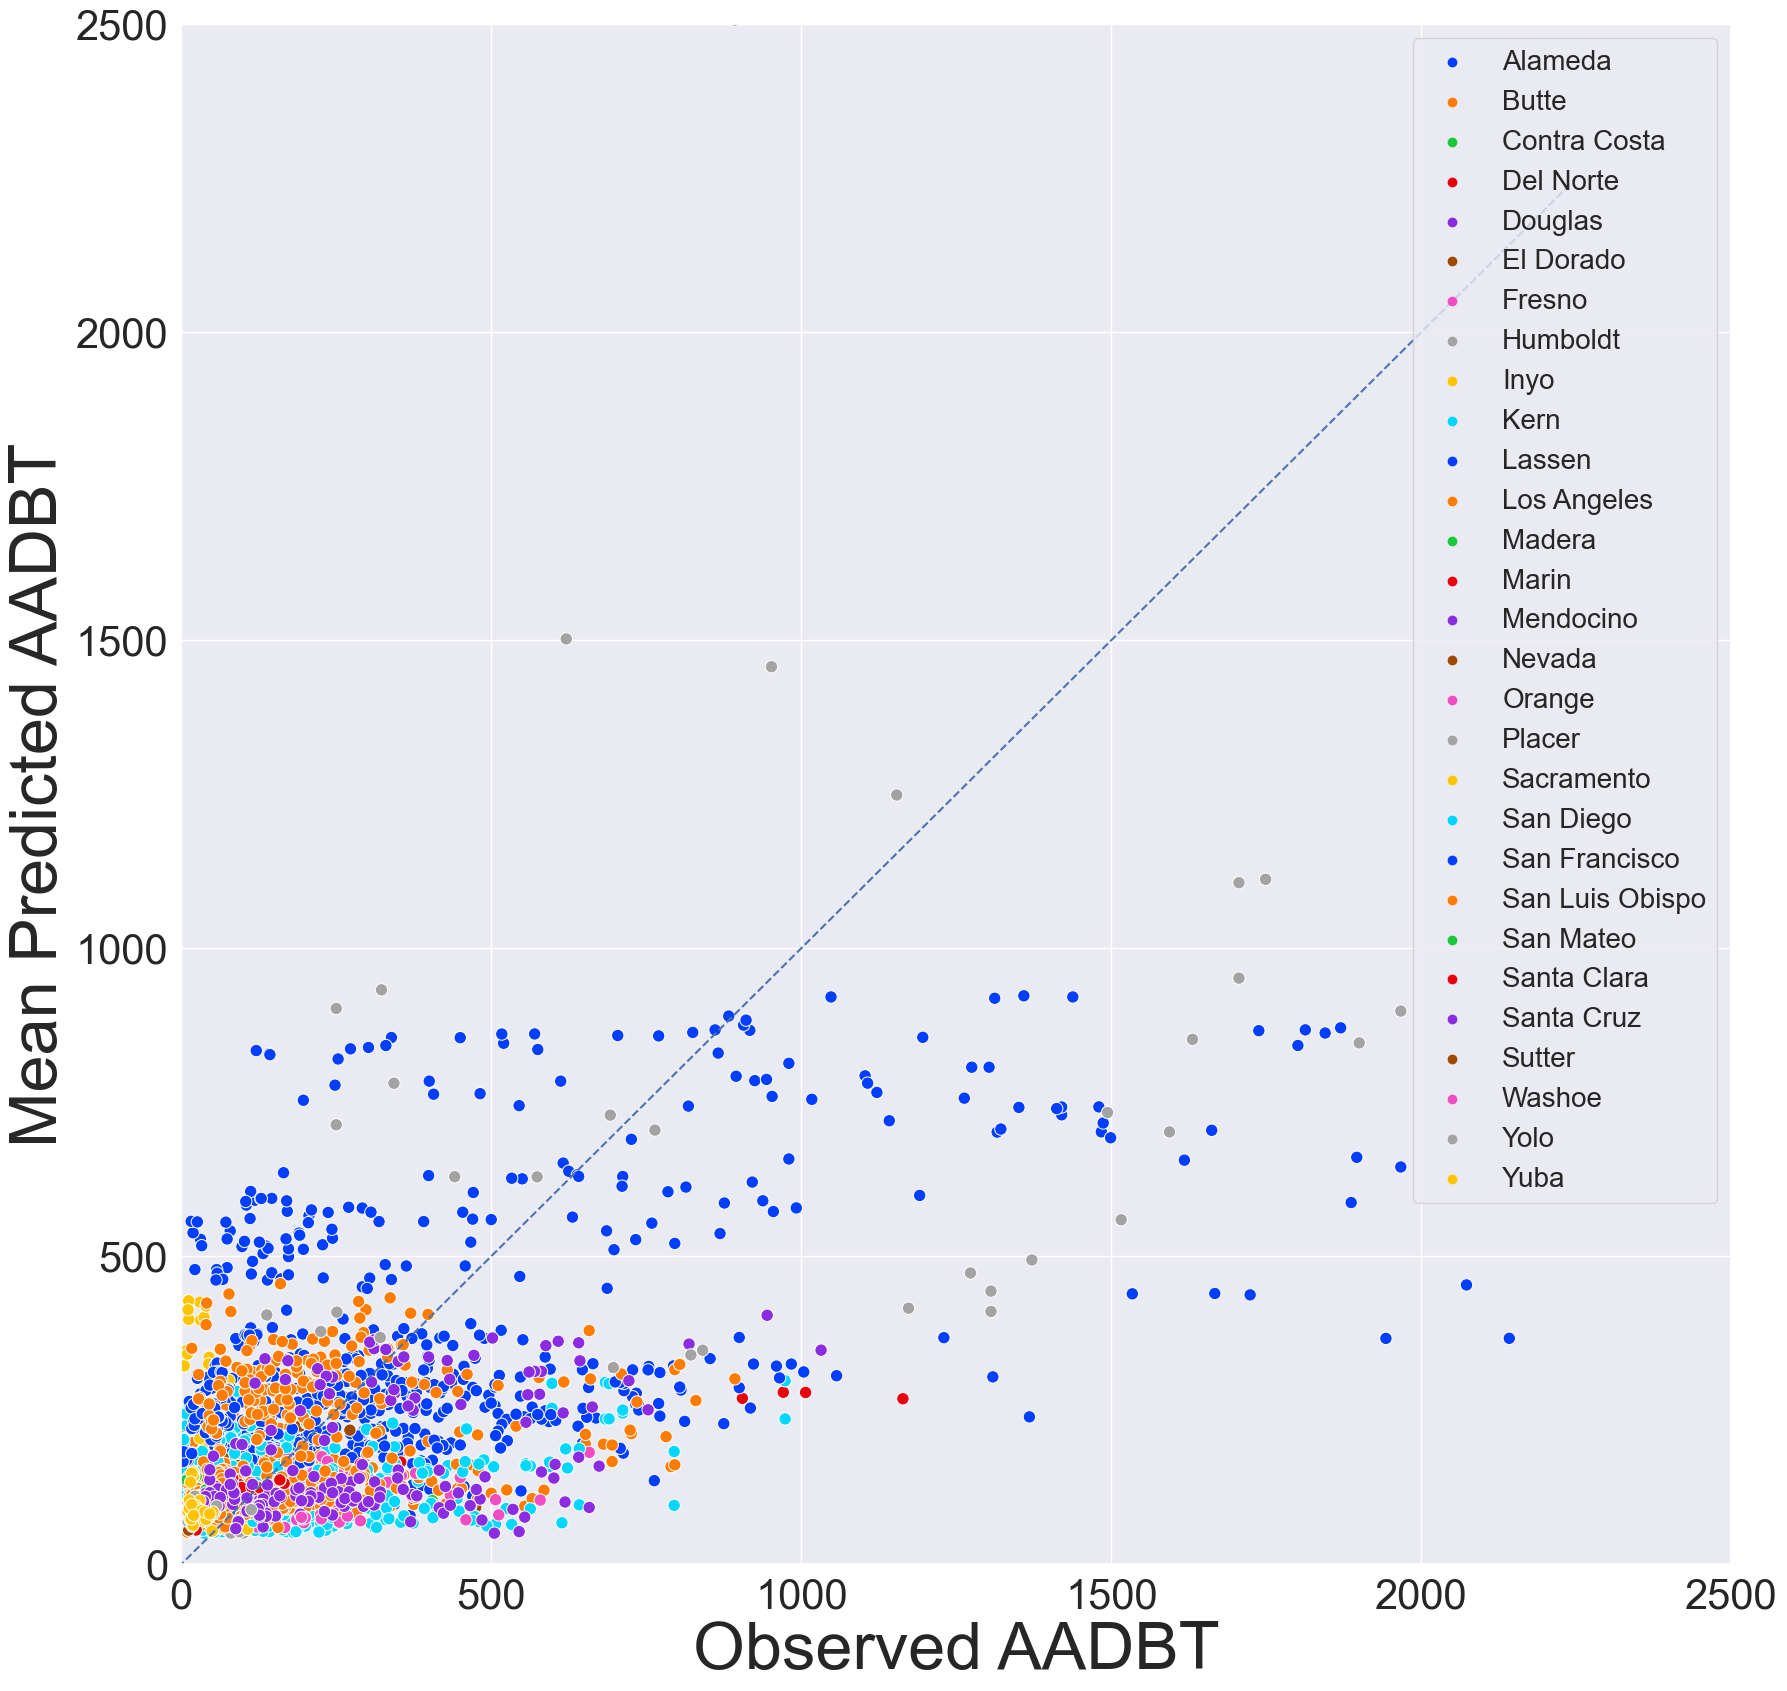

In [173]:
sns.set(font_scale=4) 
plt.figure(figsize=(20,20))
g=sns.scatterplot(data=graph_pr_data, x="AADB", y="Mean Predicted AADB", hue="county", palette="bright",s=80)
g.set(xlabel='Observed AADBT', ylabel='Mean Predicted AADBT')
g.legend(fontsize=20)
abline(1, (0,0))
plt.xlim(0,2500)
plt.ylim(0,2500)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

In [66]:
#print(NB_CV_model.aic)

44314.12313145874


# Run the Random Forest with the same set of Variables

In [67]:
model_data=data1[['AADB',
 'exist_bike_parking_q',
 'exist_subway_h',
 'Intersection_density5',
 'pctnoveh_t',
 'pctbiketowork_h',
 'urban',
 'Yolo',
 'log_Stv_adb']]

In [68]:
track=data[['tdg_id','Leg','county', 'year','AADB']]
track['index']=track.index
track.head()

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_11940\85145297.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track['index']=track.index


tdg_id  Leg   county  year  AADB  index
0  208578  NaN  Alameda  2018    31      0
1  221803  NaN  Alameda  2019    35      1
2  221803  NaN  Alameda  2019    67      2
3  214389  NaN  Alameda  2017   191      3
4  214389  NaN  Alameda  2018   214      4

In [69]:
# split data into X dataframe and Y dataframe:
X_data = model_data.drop("AADB", axis=1)
Y_data = model_data["AADB"]
print(f"X_data.shape: {X_data.shape} Y_data.shape: {Y_data.shape}")
features = model_data.drop("AADB", axis=1)
feature_list = list(features.columns)
X = np.asarray(X_data)
Y = np.asarray(Y_data)
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=94704)

X_data.shape: (4209, 8) Y_data.shape: (4209,)


In [752]:
# find best hyper parameter
from hyperopt import fmin, tpe, hp, anneal, Trials
random_state=94704
n_iter=500
num_folds=10
kf = KFold(n_splits=num_folds)

def rf_mse_cv(params, random_state=random_state, cv=kf, X=X, Y=Y):
    # the function gets a set of variable parameters in "param"
    params = {'n_estimators': int(params['n_estimators']), 
              'max_depth': int(params['max_depth']), 
             'min_samples_leaf':int(params['min_samples_leaf']),
             'min_samples_split':int(params['min_samples_split'])
             }
    
    # we use this params to create a new RF Regressor
    model = RandomForestRegressor(random_state=random_state, **params)
    score = -cross_val_score(model, X, Y, cv=cv, scoring="neg_mean_squared_error", n_jobs=-1,error_score='raise').mean()

    return score

def optimize(trial):
    params={'n_estimators':hp.uniform('n_estimators',50,2000),
           'max_depth':hp.uniform('max_depth',2,150),
           'min_samples_leaf':hp.uniform('min_samples_leaf',1,5),
           'min_samples_split':hp.uniform('min_samples_split',2,12)}
    best=fmin(fn=rf_mse_cv,space=params,algo=tpe.suggest,trials=trial,max_evals=n_iter,rstate=np.random.default_rng(random_state))
    return best

trial=Trials()
best=optimize(trial)

100%|████████████████████████████████████████████| 500/500 [3:43:19<00:00, 26.80s/trial, best loss: 42754.406117710074]


In [764]:
print(best)

{'max_depth': 13.364629000005356, 'min_samples_leaf': 2.7150729222998384, 'min_samples_split': 3.884153747313602, 'n_estimators': 1690.116719134125}


In [765]:
TID=[t['tid'] for t in trial.trials]
Loss=[t['result']['loss'] for t in trial.trials]
maxd=[t['misc']['vals']['max_depth'][0] for t in trial.trials]
nest=[t['misc']['vals']['n_estimators'][0] for t in trial.trials]
min_ss=[t['misc']['vals']['min_samples_split'][0] for t in trial.trials]
min_sl=[t['misc']['vals']['min_samples_leaf'][0] for t in trial.trials]

hyperopt_rfr=pd.DataFrame({'tid':TID,'loss':Loss,
                          'max_depth':maxd,'n_estimators':nest,
                          'min_samples_split':min_ss, 'min_samples_leaf':min_sl})
hyperopt_rfr['RMSE']=np.sqrt(hyperopt_rfr['loss'])

array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >], dtype=object)

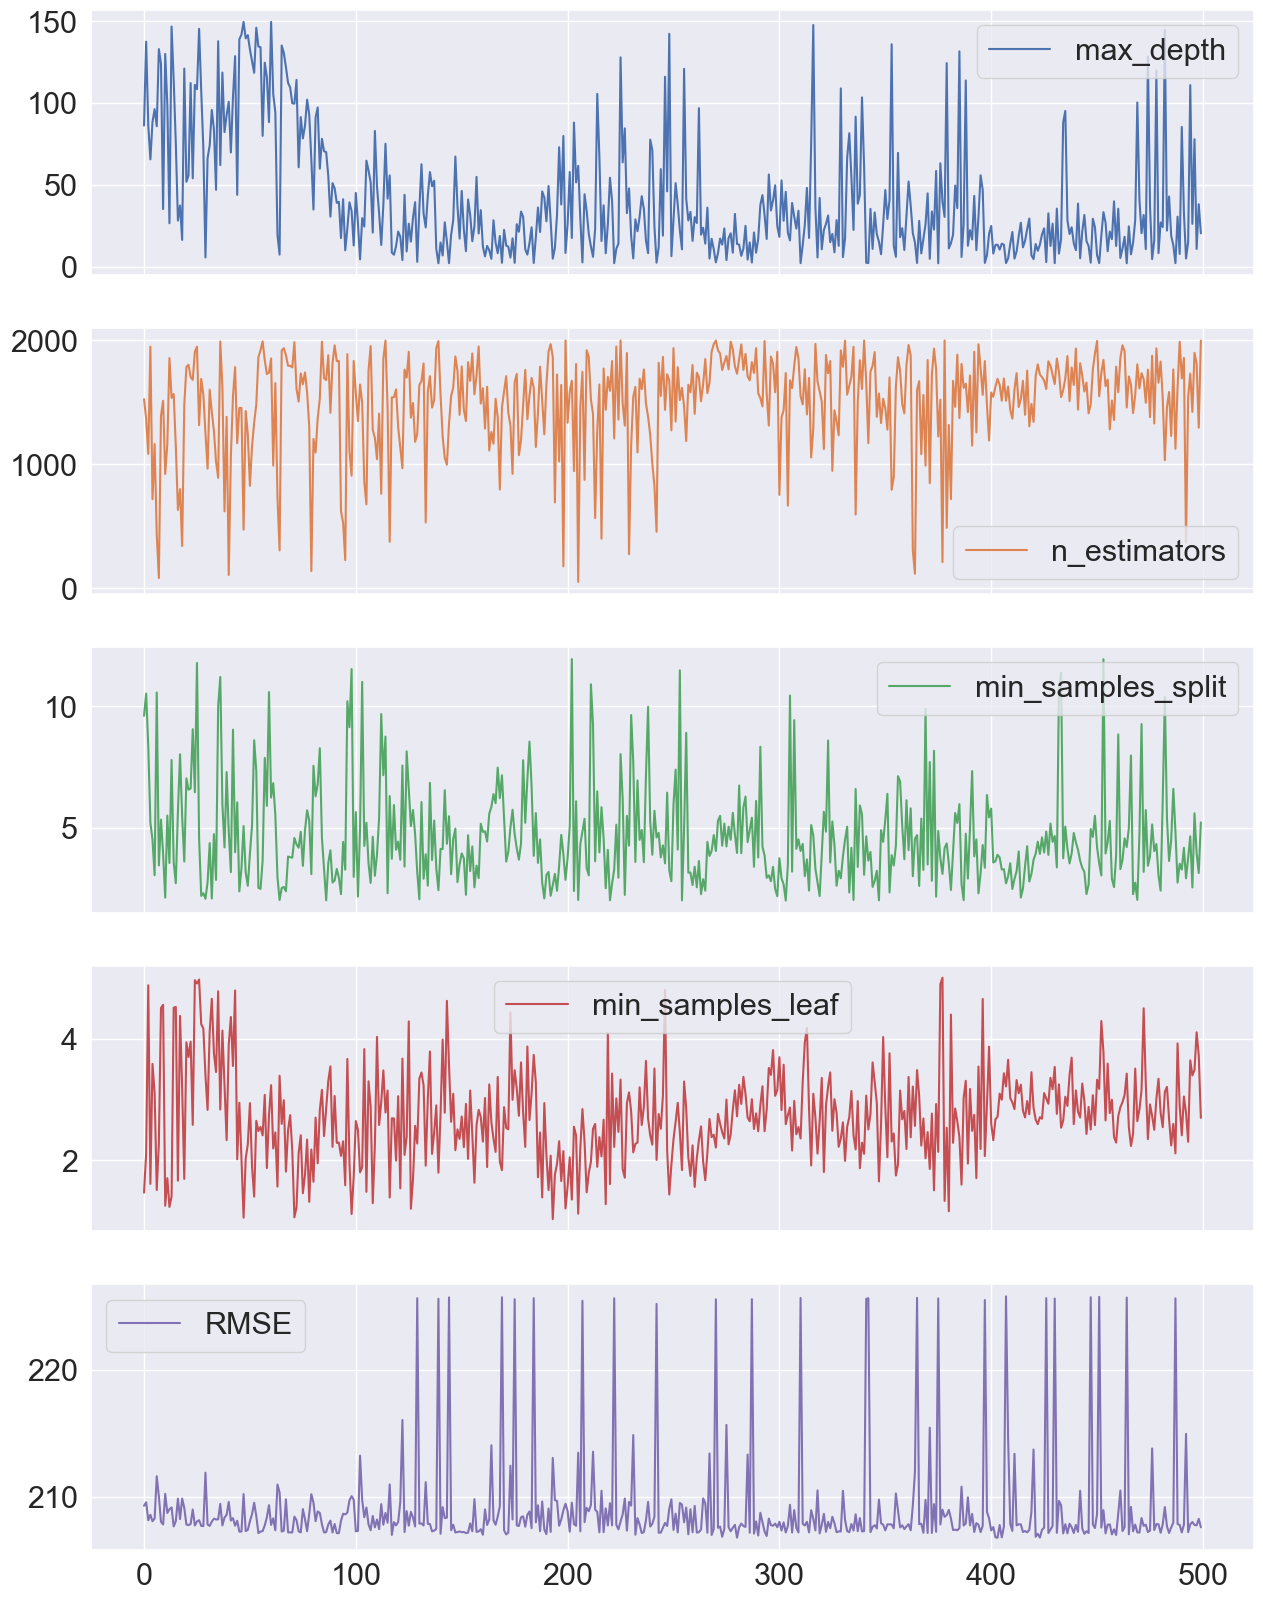

In [766]:
hyperopt_rfr[[
 'max_depth',
 'n_estimators',
 'min_samples_split',
 'min_samples_leaf',
 'RMSE']].plot(subplots=True,figsize=(15, 20))

In [70]:
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import KBinsDiscretizer

class regressor_stratified_cv:
    def __init__(self,n_splits=10,n_repeats=1,group_count=10,random_state=37914,strategy='quantile'):
        self.group_count=group_count
        self.strategy=strategy
        self.cvkwargs=dict(n_splits=n_splits,n_repeats=n_repeats,random_state=random_state)
        self.cv=RepeatedStratifiedKFold(**self.cvkwargs)
        self.discretizer=KBinsDiscretizer(n_bins=self.group_count,encode='ordinal',strategy=self.strategy)  
            
    def split(self,X,y,groups=None):
        kgroups=self.discretizer.fit_transform(y[:,None])[:,0]
        return self.cv.split(X,kgroups,groups)
    
    def get_n_splits(self,X,y,groups=None):
        return self.cv.get_n_splits(X,y,groups)

In [71]:
import warnings
warnings.filterwarnings('ignore')
# Lets breakdown this results by volume bin
#https://scikit-learn.org/stable/auto_examples/preprocessing/plot_discretization_strategies.html
# Now we do 10fold cv for our NB:
#num_folds = 10
n_splits=10
n_repeats=1
group_count=10
kfold = regressor_stratified_cv(n_splits=n_splits,n_repeats=n_repeats,
        group_count=group_count,random_state=94704,strategy='quantile') #another option uniform

# Now we perform KFold:

fold_num = 1
rf_MAPE_train = []
rf_MAPE_scores = []
rf_RMSE_train = []
rf_RMSE_scores = []
rf_MAE_train = []
rf_MAE_scores = []
rf_R2_train = []
rf_R2_scores = []

rf_low_MAPE_scores = []
rf_low_RMSE_scores = []
rf_low_MAE_scores = []
rf_low_R2_scores = []

rf_med_MAPE_scores = []
rf_med_RMSE_scores = []
rf_med_MAE_scores = []
rf_med_R2_scores = []

rf_high_MAPE_scores = []
rf_high_RMSE_scores = []
rf_high_MAE_scores = []
rf_high_R2_scores = []
test_pred = []



# we split the entire dataframe:
for train, test in kfold.split(X_data, Y_data):
    rf_CV_model = RandomForestRegressor(random_state= 94704,n_estimators=1690,max_depth=13,min_samples_split=4,min_samples_leaf=3,max_features='sqrt',bootstrap=False).fit(X_data.iloc[train], Y_data.iloc[train])
    train_predictions = rf_CV_model.predict(X_data.iloc[train])
    test_predictions = rf_CV_model.predict(X_data.iloc[test])
    predictions_df = pd.DataFrame([X_data.iloc[test].index,rf_CV_model.predict(X_data.iloc[test]),Y_data.iloc[test]]).transpose()
    train_mape = mean_absolute_percentage_error(Y_data.iloc[train], train_predictions)
    rf_MAPE_train.append(train_mape)
    test_mape = mean_absolute_percentage_error(Y_data.iloc[test], test_predictions)
    rf_MAPE_scores.append(test_mape)
    train_rmse = math.sqrt(mean_squared_error(Y_data.iloc[train], train_predictions))
    rf_RMSE_train.append(train_rmse)
    test_rmse = math.sqrt(mean_squared_error(Y_data.iloc[test], test_predictions))
    rf_RMSE_scores.append(test_rmse)
    train_mae = mean_absolute_error(Y_data.iloc[train], train_predictions)
    rf_MAE_train.append(train_mae)
    test_mae = mean_absolute_error(Y_data.iloc[test], test_predictions)
    rf_MAE_scores.append(test_mae)
    train_r2 = r2_score(Y_data.iloc[train], train_predictions)
    rf_R2_train.append(train_r2)
    score_r2 = r2_score(Y_data.iloc[test], test_predictions)
    rf_R2_scores.append(score_r2)
    test_pred.append(predictions_df)
    appended_data = pd.concat(test_pred)
    # we split the Y[test] into 3 inclusive volumes: low (0-51), medium (52-138), high (>= 138)
    low_Y_test_mask = np.all([Y_data.iloc[test] >= 0, Y_data.iloc[test] <=100], axis=0)
    med_Y_test_mask = np.all([Y_data.iloc[test] >= 101, Y_data.iloc[test] <=300], axis=0)
    high_Y_test_mask = np.all([Y_data.iloc[test] >= 301],axis=0)
   
    rf_low_MAPE_scores.append(mean_absolute_percentage_error(Y_data.iloc[test][low_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][low_Y_test_mask])))
    rf_low_RMSE_scores.append(math.sqrt(mean_squared_error(Y_data.iloc[test][low_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][low_Y_test_mask]))))
    rf_low_MAE_scores.append(mean_absolute_error(Y_data.iloc[test][low_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][low_Y_test_mask])))
    rf_low_R2_scores.append(r2_score(Y_data.iloc[test][low_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][low_Y_test_mask])))

    rf_med_MAPE_scores.append(mean_absolute_percentage_error(Y_data.iloc[test][med_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][med_Y_test_mask])))
    rf_med_RMSE_scores.append(math.sqrt(mean_squared_error(Y_data.iloc[test][med_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][med_Y_test_mask]))))
    rf_med_MAE_scores.append(mean_absolute_error(Y_data.iloc[test][med_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][med_Y_test_mask])))
    rf_med_R2_scores.append(r2_score(Y_data.iloc[test][med_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][med_Y_test_mask])))

    rf_high_MAPE_scores.append(mean_absolute_percentage_error(Y_data.iloc[test][high_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][high_Y_test_mask])))
    rf_high_RMSE_scores.append(math.sqrt(mean_squared_error(Y_data.iloc[test][high_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][high_Y_test_mask]))))
    rf_high_MAE_scores.append(mean_absolute_error(Y_data.iloc[test][high_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][high_Y_test_mask])))
    rf_high_R2_scores.append(r2_score(Y_data.iloc[test][med_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][med_Y_test_mask])))

    
    print(
        f"------------------------------------------Fold {fold_num}------------------------------------------")
    print(f"\tTrain MAE: {train_mae}\tScore Loss: {test_mae}")
    print(f"\tTrain RMSE: {train_rmse}\tScore RMSE: {test_rmse}")
    print(f"\tTrain MAPE: {train_mape}\tScore MAPE: {test_mape}")
    print(f"\tTrain R2:   {train_r2}\tScore R2: {score_r2}")
    print(f"\n\t3-VOLUME SCORES: LOW (n={Y[test][low_Y_test_mask].shape[0]}), MED (n={Y[test][med_Y_test_mask].shape[0]}), HIGH (n={Y[test][high_Y_test_mask].shape[0]}), TOTAL IN FOLD (n={test.shape[0]})")
    print(f"\tLow Loss: {rf_low_MAE_scores[-1]}\tMed Loss: {rf_med_MAE_scores[-1]}\tHigh Loss: {rf_high_MAE_scores[-1]}")
    print(f"\tLow RMSE: {rf_low_RMSE_scores[-1]}\tMed RMSE: {rf_med_RMSE_scores[-1]}\tHigh RMSE: {rf_high_RMSE_scores[-1]}")
    print(f"\tLow MAPE: {rf_low_MAPE_scores[-1]}\tMed MAPE: {rf_med_MAPE_scores[-1]}\tHigh MAPE: {rf_high_MAPE_scores[-1]}")
    print(f"\tLow R2:   {rf_low_R2_scores[-1]}\tMed R2: {rf_med_R2_scores[-1]}\tHigh R2: {rf_high_R2_scores[-1]}")
    fold_num += 1

print(f"\n\nLow MAE Average: {np.mean(rf_low_MAE_scores)} +/- {np.std(rf_low_MAE_scores)}")
print(f"Low RMSE Average: {np.mean(rf_low_RMSE_scores)} +/- {np.std(rf_low_RMSE_scores)}")
print(f"Low MAPE Average: {np.mean(rf_low_MAPE_scores)} +/- {np.std(rf_low_MAPE_scores)}")
print(f"Low R2 Average: {np.mean(rf_low_R2_scores)} +/- {np.std(rf_low_R2_scores)}\n")

print(f"\nMed MAE Average: {np.mean(rf_med_MAE_scores)} +/- {np.std(rf_med_MAE_scores)}")
print(f"Med RMSE Average: {np.mean(rf_med_RMSE_scores)} +/- {np.std(rf_med_RMSE_scores)}")
print(f"Med MAPE Average: {np.mean(rf_med_MAPE_scores)} +/- {np.std(rf_med_MAPE_scores)}")
print(f"Med R2 Average: {np.mean(rf_med_R2_scores)} +/- {np.std(rf_med_R2_scores)}\n")

print(f"\nHigh MAE Average: {np.mean(rf_high_MAE_scores)} +/- {np.std(rf_high_MAE_scores)}")
print(f"High RMSE Average: {np.mean(rf_high_RMSE_scores)} +/- {np.std(rf_high_RMSE_scores)}")
print(f"High MAPE Average: {np.mean(rf_high_MAPE_scores)} +/- {np.std(rf_high_MAPE_scores)}")
print(f"High R2 Average: {np.mean(rf_high_R2_scores)} +/- {np.std(rf_high_R2_scores)}\n")

print(f"\n\nOverall MAE: {np.mean(rf_MAE_scores)} +/- {np.std(rf_MAE_scores)}")
print(f"Overall RMSE: {np.mean(rf_RMSE_scores)} +/- {np.std(rf_RMSE_scores)}")
print(f"Overall MAPE: {np.mean(rf_MAPE_scores)} +/- {np.std(rf_MAPE_scores)}")
print(f"Overall R2: {np.mean(rf_R2_scores)} +/- {np.std(rf_R2_scores)}\n\n")


print("Delimited table for linear Regression 10 fold:")
print("MAPE\tRMSE\tMAE\tR2")
for i in range(0, 10):
    print("%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f" %
          (rf_MAPE_train[i], rf_MAPE_scores[i], rf_RMSE_train[i], rf_RMSE_scores[i], rf_MAE_train[i], rf_MAE_scores[i], rf_R2_train[i], rf_R2_scores[i]))
print("%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t<===Averages" % (np.mean(rf_MAPE_train), np.mean(rf_MAPE_scores), np.mean(rf_RMSE_train),
      np.mean(rf_RMSE_scores), np.mean(rf_MAE_train), np.mean(rf_MAE_scores), np.mean(rf_R2_train), np.mean(rf_R2_scores)))     

------------------------------------------Fold 1------------------------------------------
	Train MAE: 53.70260704458822	Score Loss: 77.22096501238622
	Train RMSE: 87.23486420407	Score RMSE: 132.85419431205037
	Train MAPE: 97.33728458815773	Score MAPE: 112.058332941592
	Train R2:   0.8589269277446	Score R2: 0.6928681156326801

	3-VOLUME SCORES: LOW (n=240), MED (n=123), HIGH (n=58), TOTAL IN FOLD (n=421)
	Low Loss: 43.912980140297485	Med Loss: 63.271554336170205	High Loss: 244.62948022748733
	Low RMSE: 57.347406900527524	Med RMSE: 88.34243207764736	High RMSE: 312.981114971182
	Low MAPE: 167.55007330309658	Med MAPE: 37.828034037119096	High MAPE: 39.8567653293346
	Low R2:   -4.107575704361389	Med R2: -1.6887991937579718	High R2: -1.6887991937579718
------------------------------------------Fold 2------------------------------------------
	Train MAE: 54.54482661665861	Score Loss: 70.13687430715699
	Train RMSE: 89.25818004801337	Score RMSE: 107.4305417513831
	Train MAPE: 97.87609120956864	

In [72]:
appended_data1=appended_data.rename(columns = {0:'Index_ID',1:'Mean Predicted AADB',2:'Observed AADB'})
appended_data2=appended_data1.groupby('Index_ID').mean()
graph_data=pd.merge(track,appended_data2,left_on='index', right_on='Index_ID', how="inner")
# graph_data['Mean Predicted AADB in Million']=graph_data['Mean Predicted AADB']
# graph_data['Observed AADB in Million']=graph_data['Observed AADB']
graph_data.head()

tdg_id  Leg   county  year  AADB  index  Mean Predicted AADB  Observed AADB
0  208578  NaN  Alameda  2018    31      0           264.283495           31.0
1  221803  NaN  Alameda  2019    35      1           131.436215           35.0
2  221803  NaN  Alameda  2019    67      2           124.178305           67.0
3  214389  NaN  Alameda  2017   191      3           156.260476          191.0
4  214389  NaN  Alameda  2018   214      4           151.120312          214.0

In [73]:
graph_data['Observed AADB'].max(), graph_data['Mean Predicted AADB'].max()

(2142.0, 1626.9138307697792)

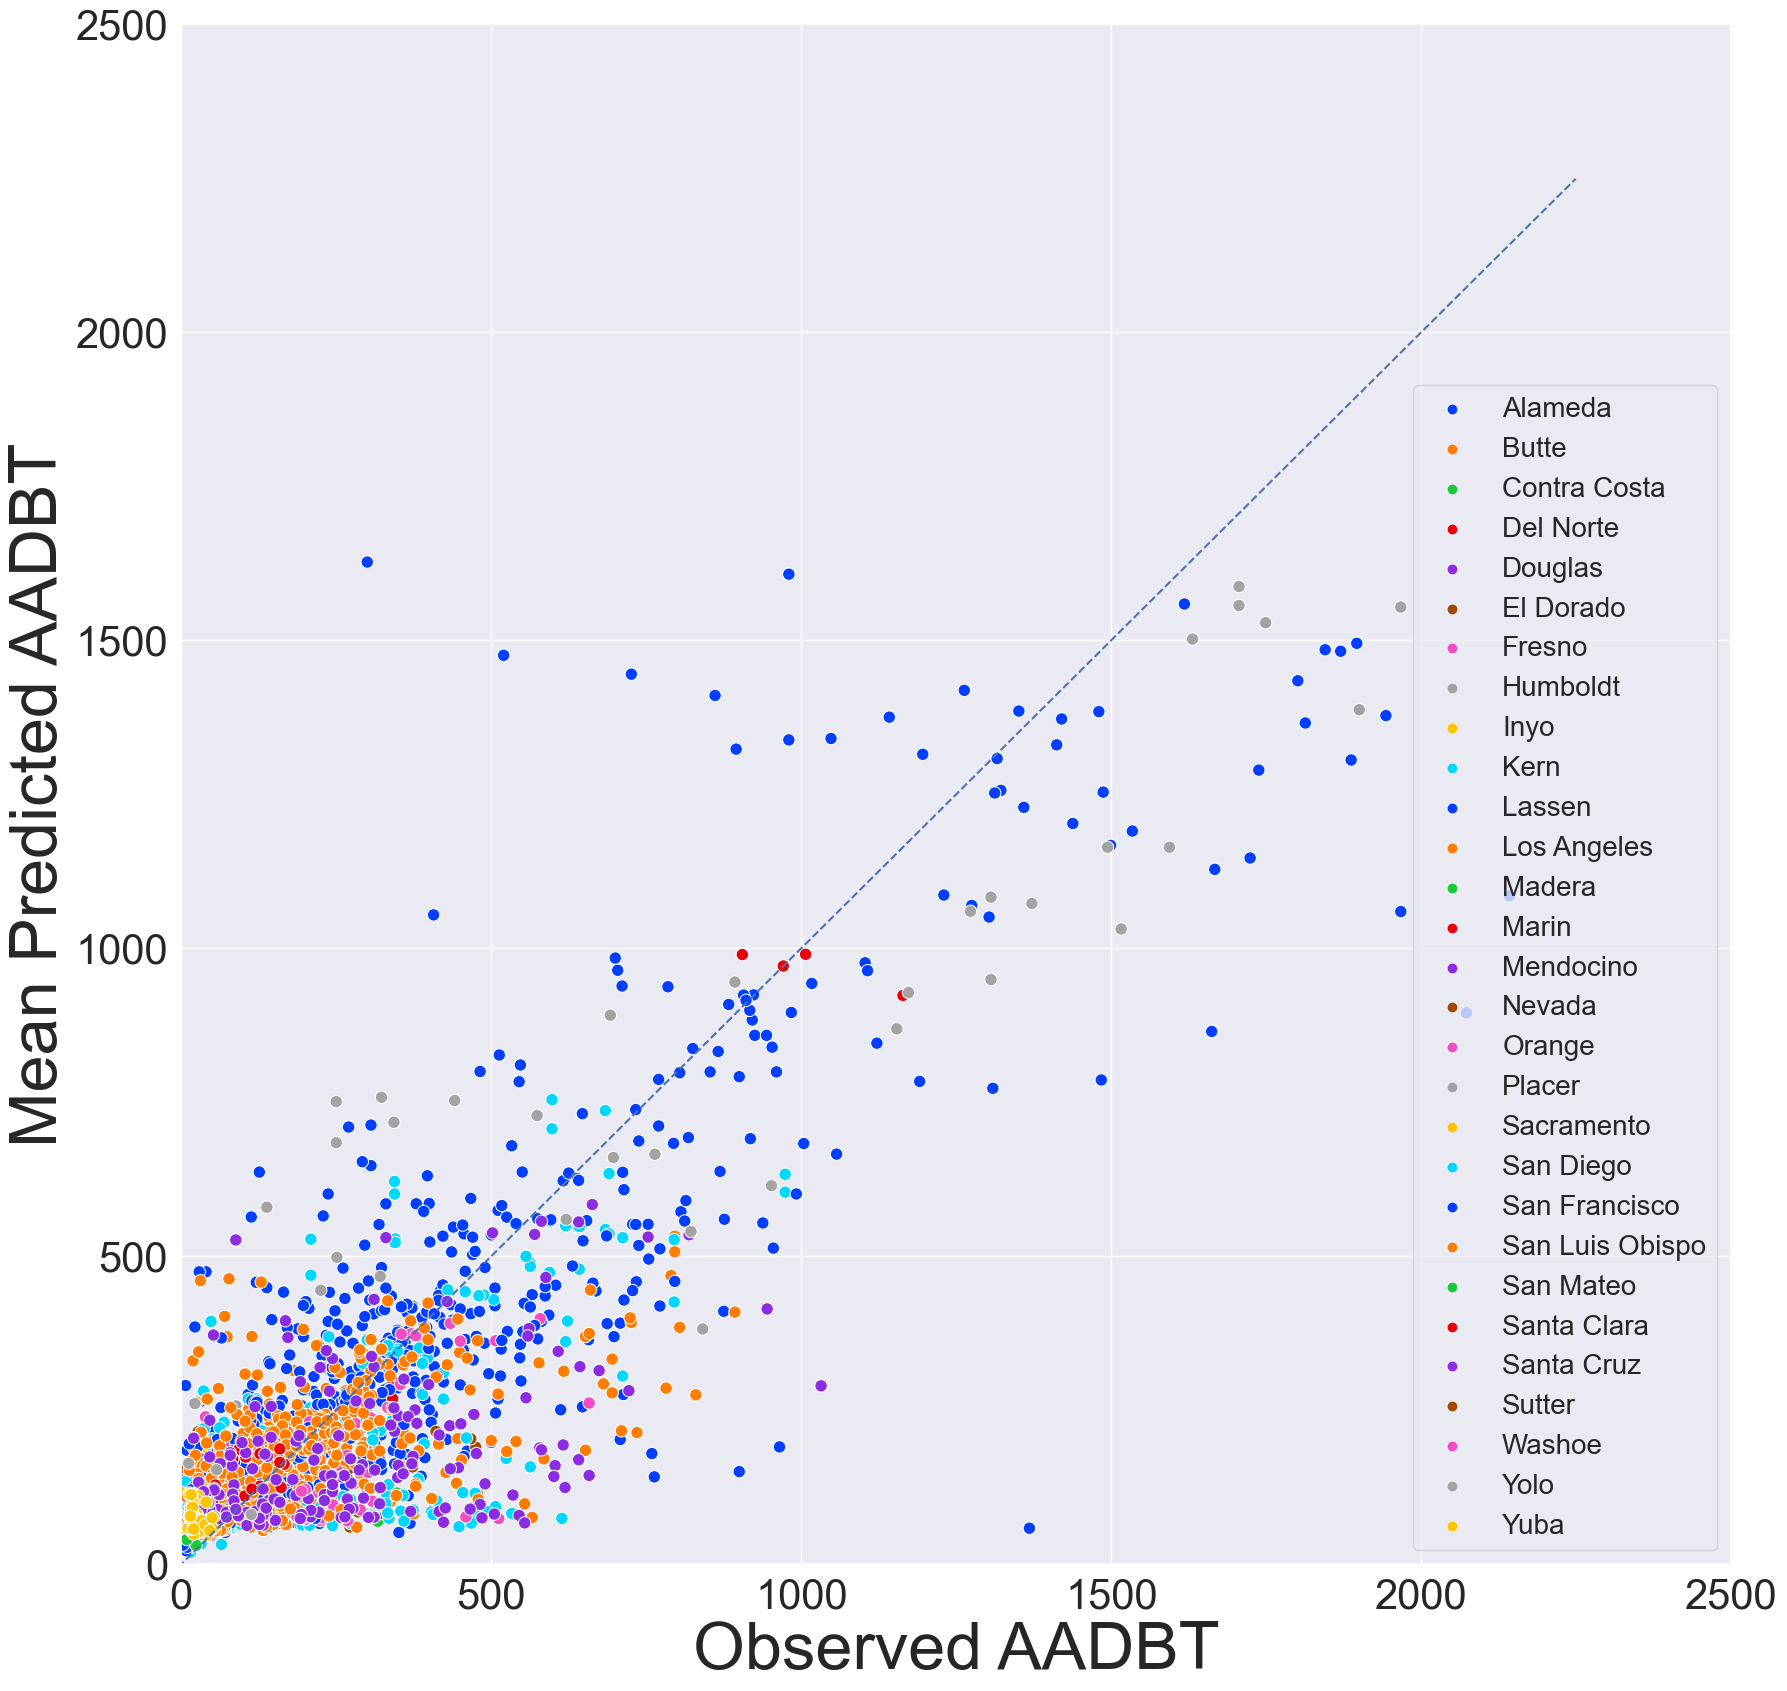

In [99]:
sns.set(font_scale=4) 
plt.figure(figsize=(20,20))
g=sns.scatterplot(data=graph_data, x="Observed AADB", y="Mean Predicted AADB", hue="county", palette="bright",s=80)
g.set(xlabel='Observed AADBT', ylabel='Mean Predicted AADBT')
g.legend(fontsize=20)
abline(1, (0,0))
plt.xlim(0,2500)
plt.ylim(0,2500)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

In [75]:
importances = list(rf_CV_model.feature_importances_)# List of tuples with variable and importance 
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances)]# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)# Print out the feature and importances 
#[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];
feature_importances

[('log_Stv_adb', 0.2773),
 ('pctbiketowork_h', 0.2613),
 ('pctnoveh_t', 0.1994),
 ('Intersection_density5', 0.0909),
 ('Yolo', 0.0617),
 ('exist_bike_parking_q', 0.0452),
 ('urban', 0.0392),
 ('exist_subway_h', 0.025)]

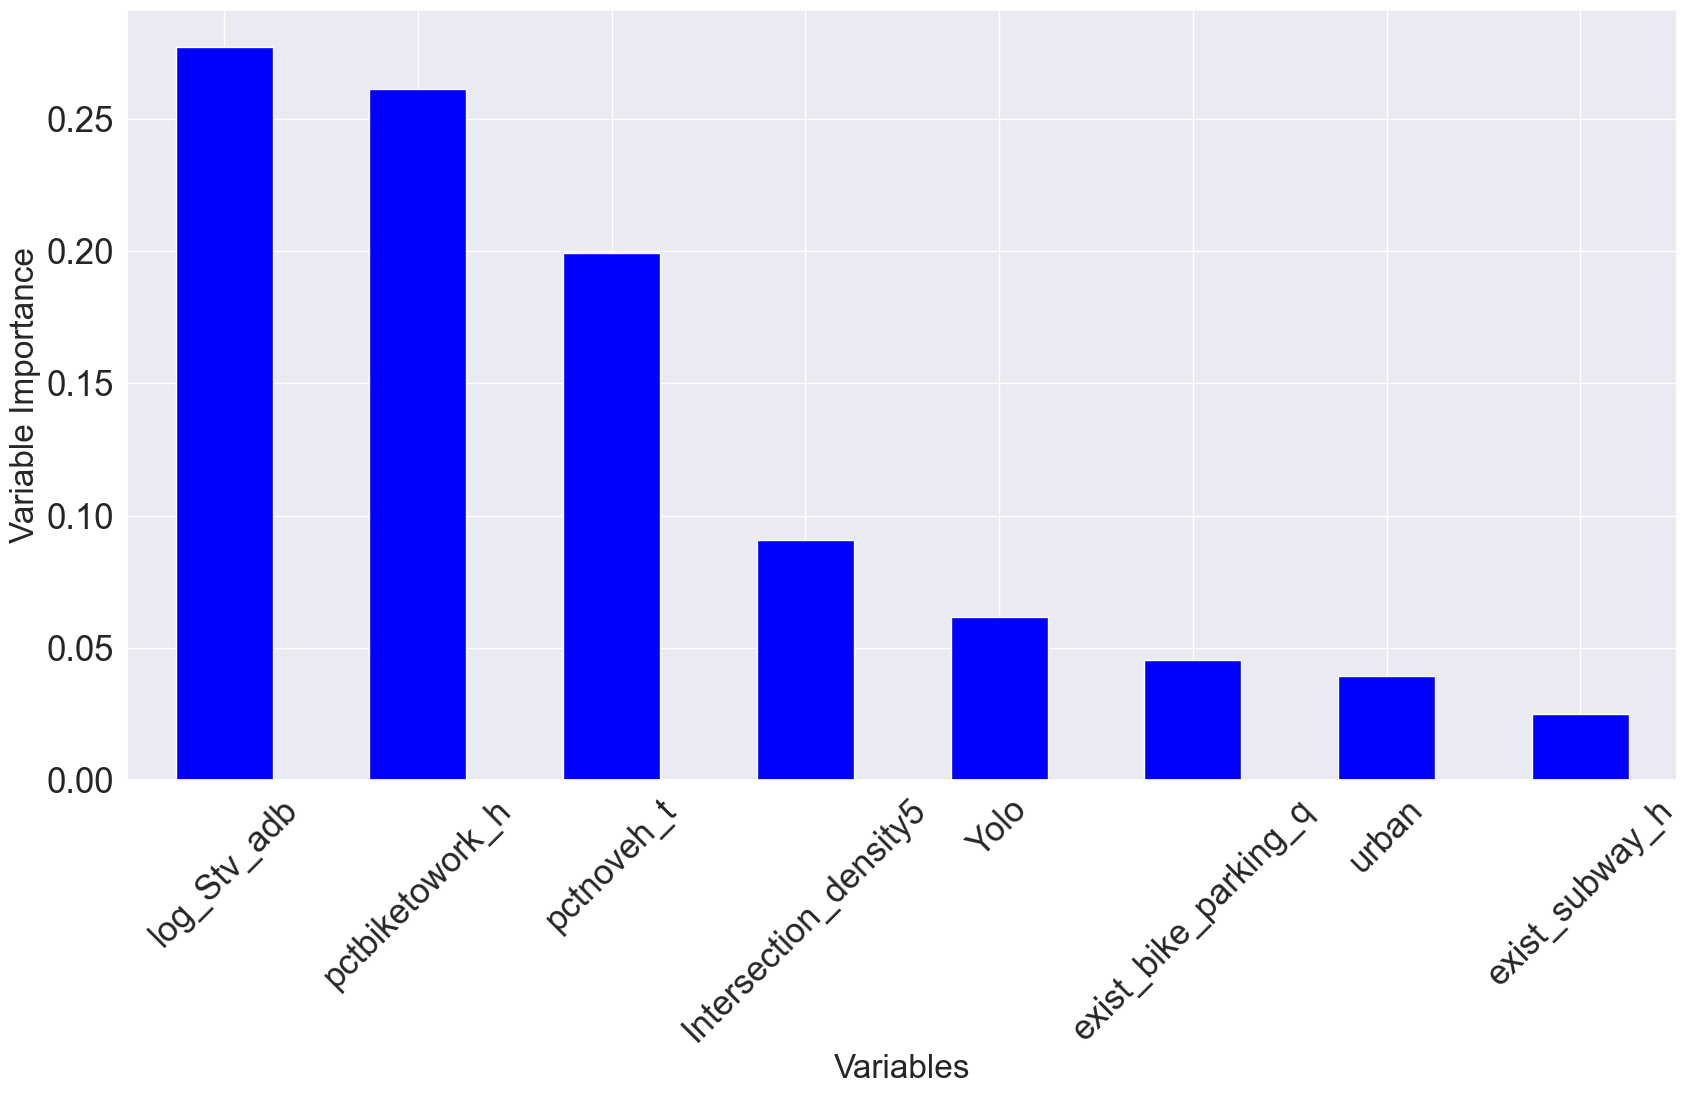

In [76]:
plt.rcParams.update({'font.size': 22})
feature_importances_df = pd.DataFrame(rf_CV_model.feature_importances_, index=X_data.columns, columns=[
                                      'Importance']).sort_values('Importance', ascending=False)
feature_importances_df.plot(kind='bar', figsize=(20, 10), fontsize=25, legend=False,
                          ylabel="Importance", xlabel="Variable",color="blue")
plt.xticks(rotation=45)
plt.xlabel('Variables', fontsize=24)
plt.ylabel('Variable Importance', fontsize=24)
plt.show()
#style='fivethirtyeight'

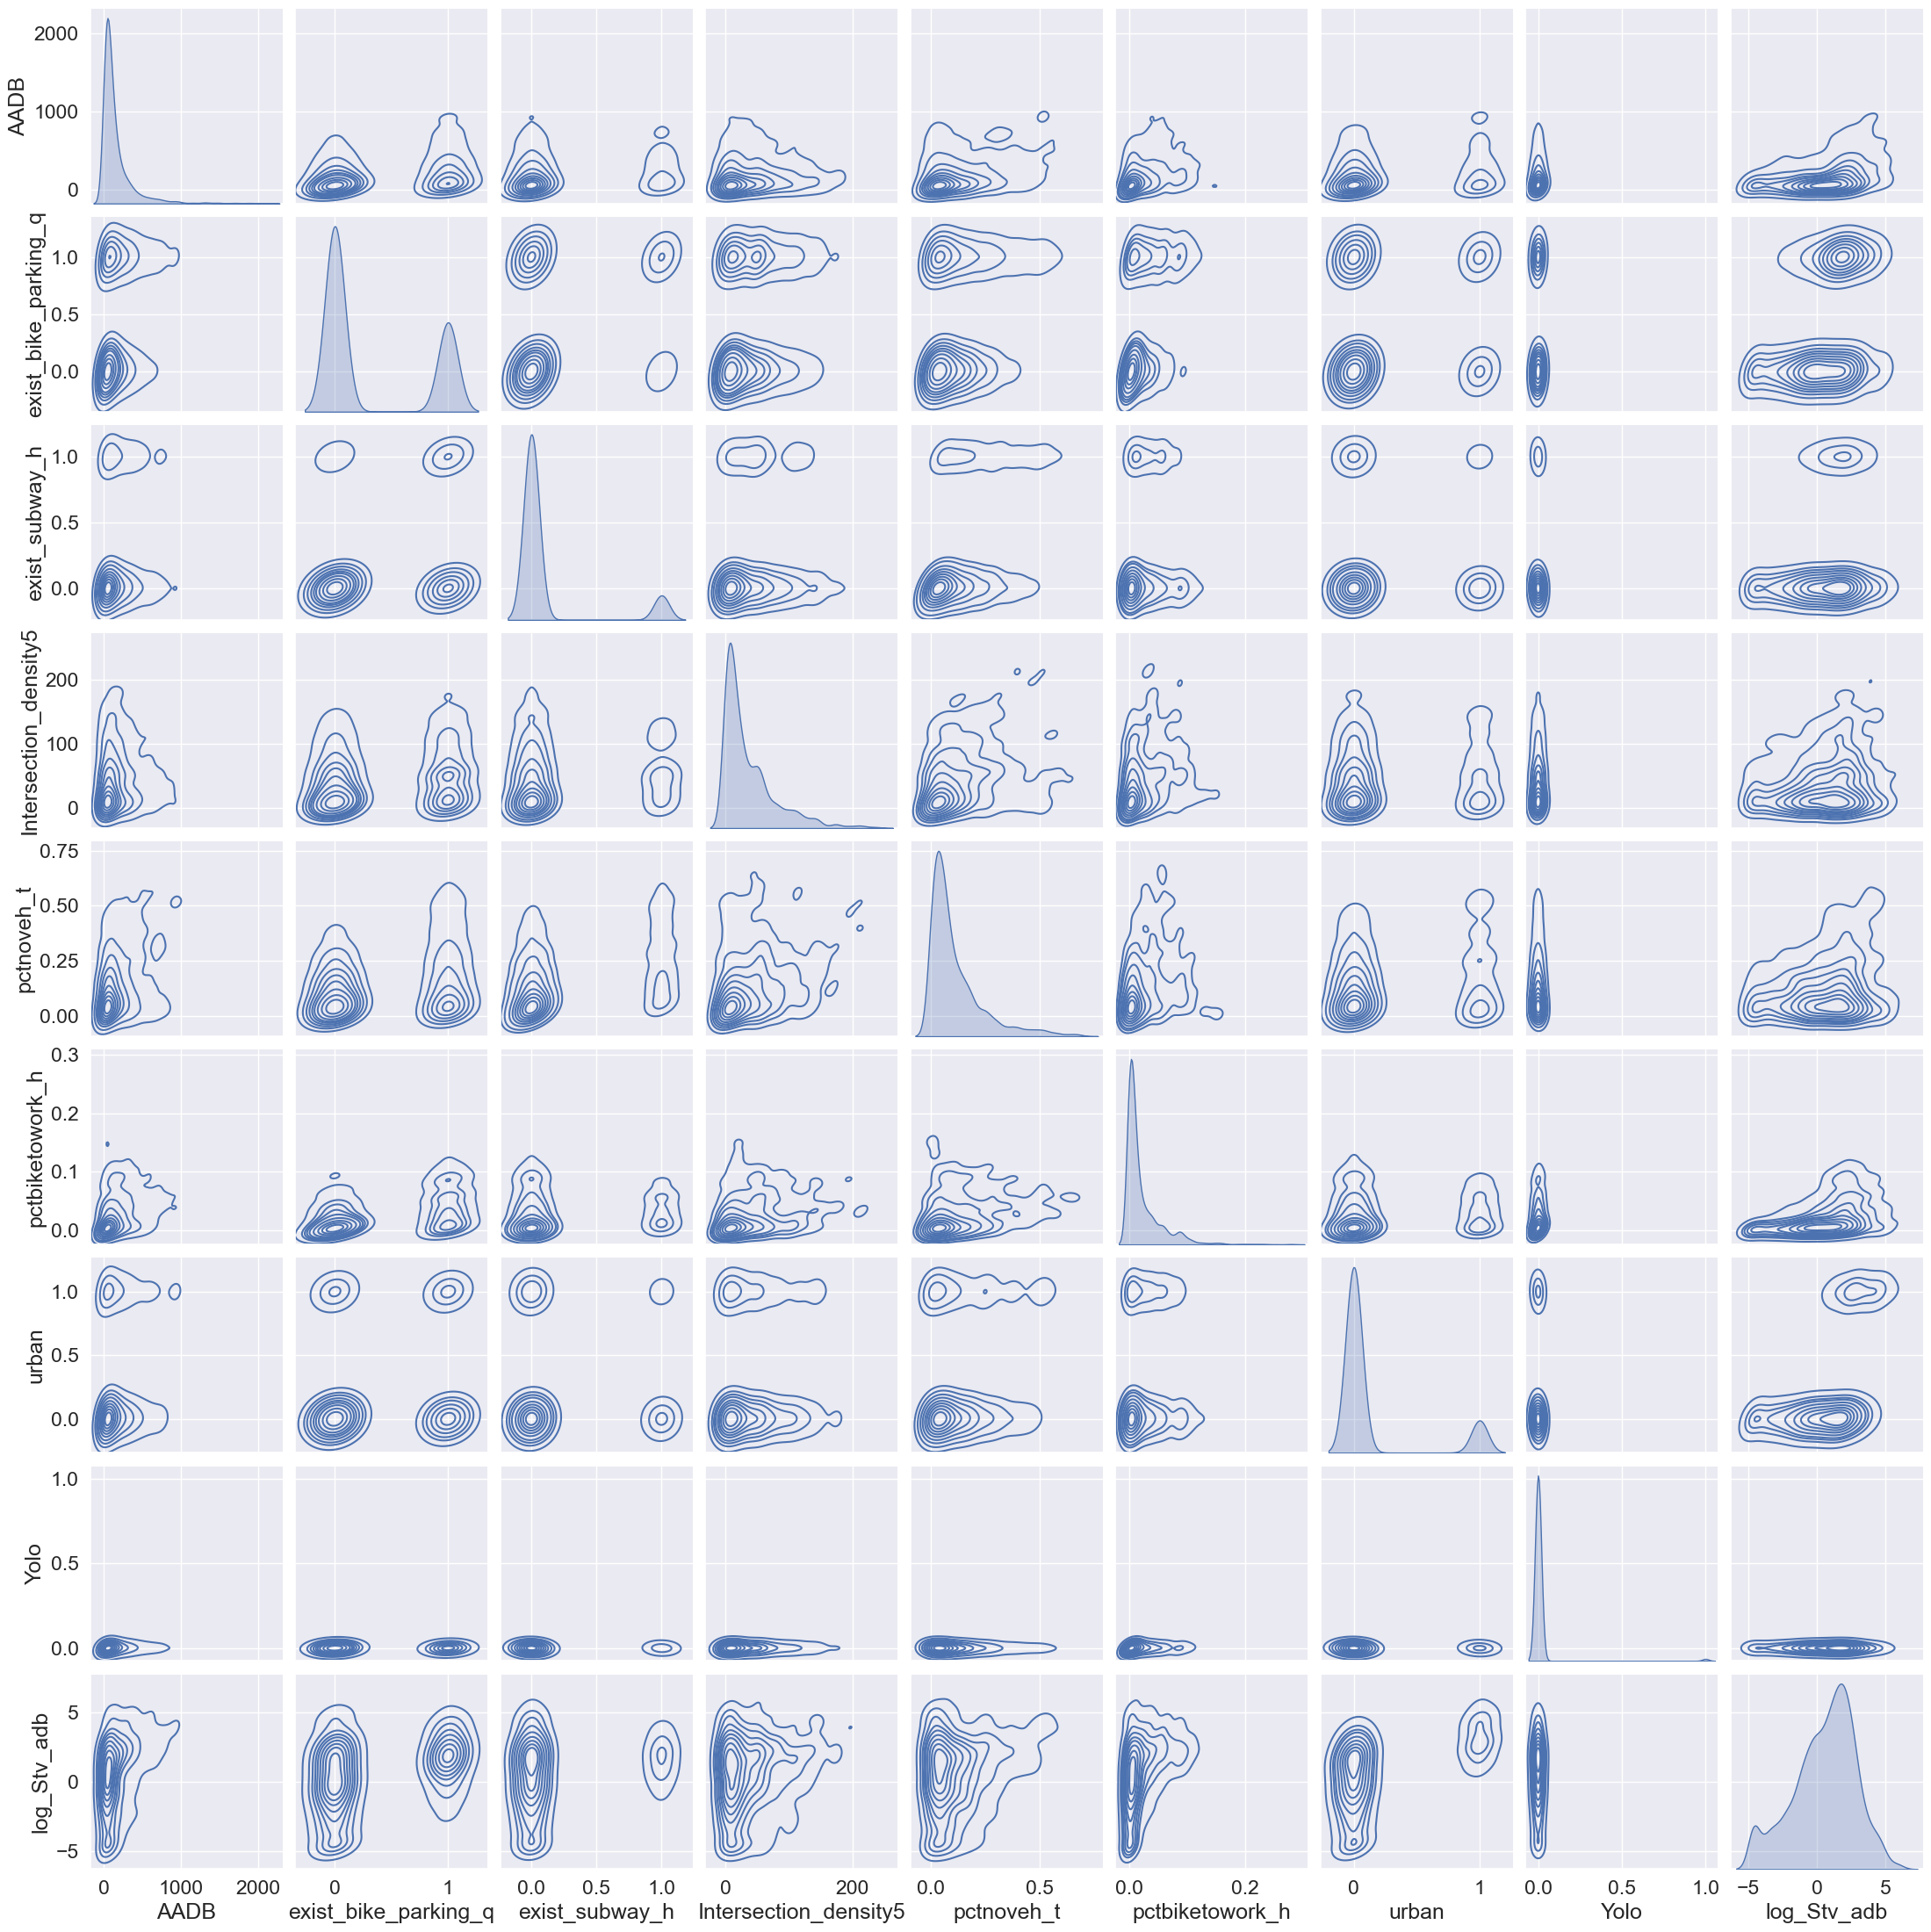

In [77]:
sns.set(font_scale=1.5) 
sns.pairplot(model_data,kind="kde")
#sns.pairplot(df4, kind="kde")

In [78]:
#residual_df['y_pred'] = best_model.predict(X_train)
graph_data['AADB_resid'] = graph_data['Observed AADB'] - graph_data['Mean Predicted AADB']
graph_data['AADB_resid_pct'] = graph_data['AADB_resid'] / graph_data['Mean Predicted AADB']
graph_data['abs_AADB_resid'] = graph_data['AADB_resid'].abs()

<Figure size 2000x2000 with 0 Axes>

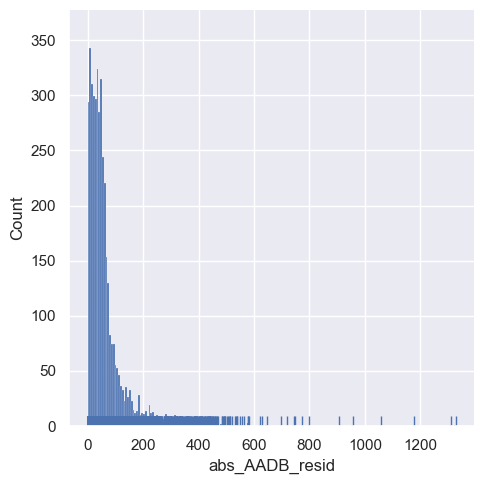

In [79]:
sns.set(font_scale=1) 
plt.figure(figsize=(20,20))
sns.displot(graph_data.abs_AADB_resid, rug=True,alpha=0.99,palette="Blues")

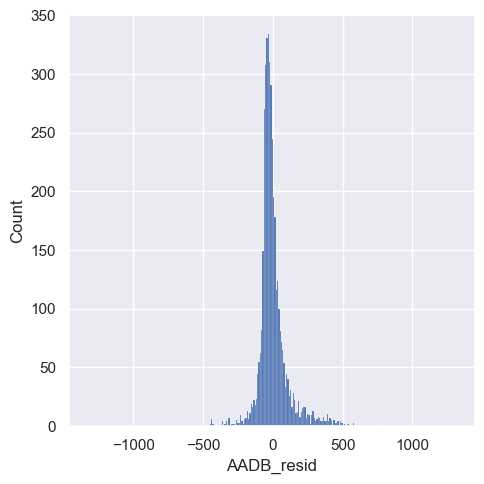

In [80]:
#sns.set_palette("Paired")
#sns.set_palette("pastel")
sns.displot(graph_data.AADB_resid,alpha=0.99,palette="Blues")

### Application of Random Forest Model

In [247]:
shs=pd.read_csv("D:/Bike Exposure/Modeling/SHS_application_data_july12.csv")
shs=shs.fillna(0)
shs.rename(columns={'d3bpo4':'Intersection_density5'},inplace=True)
#shs['urban']=np.where(shs['location']=='urban',1,0)
shs['Yolo']=np.where(shs['county']=='Yolo',1,0)
shs['Stv_adb']=shs['Stv_leisure_adb']+shs['Stv_commute_adb']
shs['log_Stv_adb']=np.log(shs['Stv_adb']+0.01)

In [249]:
# read the SHS geometry 
geo=gpd.read_file('D:/Bike Exposure/Modeling/RF Model_SHS_estimate_July24/SHS_AADBT_Estimate.shp')
# take the 
geo1=geo.drop(['county', 'year', 'Length', 'Field1', 'AADBT', 'index',
       'tdg_id_1', 'county_1'],axis=1)
gdf = geo1.to_crs(epsg=4269)
gdf.head()


tdg_id                                           geometry
0  8523.0  LINESTRING Z (-120.74504 38.73376 0.00000, -12...
1  8530.0  LINESTRING Z (-120.83852 38.75700 0.00000, -12...
2  8534.0  LINESTRING Z (-120.83284 38.68772 0.00000, -12...
3  8535.0  LINESTRING Z (-121.01515 38.84100 0.00000, -12...
4  8536.0  LINESTRING Z (-120.91529 38.81439 0.00000, -12...

In [250]:
# read the urban area shape file
ua=gpd.read_file('D:/Bike Exposure/Urban Area_shape file/data/2010_adjusted_urban_area.shp')
ua.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [251]:
# do the spatial join with eco valid counters
urban=gpd.sjoin(gdf,ua)
urban=urban.drop(['UACE10','NAME10','UATYP10','INTPTLAT10','INTPTLON10'],axis=1)
urban['location']='urban'
urban.head()

tdg_id                                           geometry  index_right  \
0   8523.0  LINESTRING Z (-120.74504 38.73376 0.00000, -12...          105   
2   8534.0  LINESTRING Z (-120.83284 38.68772 0.00000, -12...          105   
13  8580.0  LINESTRING Z (-120.81802 38.69385 0.00000, -12...          105   
14  8581.0  LINESTRING Z (-120.80807 38.72849 0.00000, -12...          105   
16  8587.0  LINESTRING Z (-120.82351 38.69290 0.00000, -12...          105   

   location  
0     urban  
2     urban  
13    urban  
14    urban  
16    urban

In [252]:
# get the counters in rural area
rural = gdf.merge(urban, indicator=True, how='outer').query('_merge != "both"').drop('_merge', 1)
rural['location']='rural'
rural.head()

tdg_id                                           geometry  index_right  \
1  8530.0  LINESTRING Z (-120.83852 38.75700 0.00000, -12...          NaN   
3  8535.0  LINESTRING Z (-121.01515 38.84100 0.00000, -12...          NaN   
4  8536.0  LINESTRING Z (-120.91529 38.81439 0.00000, -12...          NaN   
5  8545.0  LINESTRING Z (-120.83056 38.75465 0.00000, -12...          NaN   
6  8547.0  LINESTRING Z (-120.84813 38.75651 0.00000, -12...          NaN   

  location  
1    rural  
3    rural  
4    rural  
5    rural  
6    rural

In [253]:
# Now combine rural and urban 
ru=pd.concat([urban,rural],axis=0)
ru1=ru.drop_duplicates(subset=['tdg_id'], keep='first')
ru1['urban']=np.where(ru1['location']=='urban',1,0)
ru1.shape

(87539, 5)

In [254]:
# now combine with others data
app_data=pd.merge(shs, ru1, on=['tdg_id'], how='inner')
app_data.shape

(87539, 205)

In [255]:
# prepare the model data
app_data1=app_data[['exist_bike_parking_q',
 'exist_subway_h',
 'Intersection_density5',
 'pctnoveh_t',
 'pctbiketowork_h',
 'urban',
 'Yolo',
 'log_Stv_adb']]

In [258]:
shs_track=shs[['tdg_id','county']].reset_index()
shs_track['index']=shs_track.index
shs_track.head()

index  tdg_id     county
0      0  6496.0  Del Norte
1      1  6497.0  Del Norte
2      2  6498.0  Del Norte
3      3  6500.0  Del Norte
4      4  6507.0  Del Norte

In [259]:
# now apply RF model
shs_pred = np.asarray(app_data1)

In [260]:
shs_predictions = rf_CV_model.predict(shs_pred)
shs_predictions_df = pd.DataFrame(shs_predictions,columns=['AADBT'])
shs_predictions_df['index']=shs_predictions_df.index
shs_prediction=pd.merge(shs_predictions_df,shs_track,on=['index'], how='inner')
shs_prediction.head()

AADBT  index  tdg_id     county
0  89.365375      0  6496.0  Del Norte
1  79.252415      1  6497.0  Del Norte
2  89.365375      2  6498.0  Del Norte
3  80.619859      3  6500.0  Del Norte
4  89.996129      4  6507.0  Del Norte

In [261]:
shs_prediction['AADBT'].describe()

count    87539.000000
mean       118.446765
std         64.201775
min         19.660242
25%         77.728114
50%        100.500308
75%        141.434243
max       1529.107391
Name: AADBT, dtype: float64

In [267]:
# now bring the geometry and length back
geo2=geo.drop(['county', 'year', 'Field1', 'AADBT', 'index',
       'tdg_id_1', 'county_1'],axis=1)
shs_pred=pd.merge(shs_prediction, geo2, on=['tdg_id'], how='inner')
shs_pred.head()

AADBT  index  tdg_id     county    Length  \
0  89.365375      0  6496.0  Del Norte  0.016049   
1  79.252415      1  6497.0  Del Norte  0.036890   
2  89.365375      2  6498.0  Del Norte  0.016515   
3  80.619859      3  6500.0  Del Norte  0.199039   
4  89.996129      4  6507.0  Del Norte  0.189292   

                                            geometry  
0  LINESTRING Z (399939.366 4650066.554 0.000, 39...  
1  LINESTRING Z (399940.086 4650040.735 0.000, 39...  
2  LINESTRING Z (399965.852 4650064.337 0.000, 39...  
3  LINESTRING Z (399952.770 4649627.937 0.000, 39...  
4  LINESTRING Z (399952.770 4649627.937 0.000, 39...

In [268]:
# Assign the catagory of the volume
def vol_bin(AADBT):
    if AADBT<=100:
        return 'low'
    elif ((AADBT>100) & (AADBT<=300)):
        return 'mid'
    else:
        return 'high'
shs_pred['class']=shs_pred.apply(lambda row:vol_bin(row['AADBT']),axis=1)   
shs_pred.head()

AADBT  index  tdg_id     county    Length  \
0  89.365375      0  6496.0  Del Norte  0.016049   
1  79.252415      1  6497.0  Del Norte  0.036890   
2  89.365375      2  6498.0  Del Norte  0.016515   
3  80.619859      3  6500.0  Del Norte  0.199039   
4  89.996129      4  6507.0  Del Norte  0.189292   

                                            geometry class  
0  LINESTRING Z (399939.366 4650066.554 0.000, 39...   low  
1  LINESTRING Z (399940.086 4650040.735 0.000, 39...   low  
2  LINESTRING Z (399965.852 4650064.337 0.000, 39...   low  
3  LINESTRING Z (399952.770 4649627.937 0.000, 39...   low  
4  LINESTRING Z (399952.770 4649627.937 0.000, 39...   low

In [269]:
shs_pred.groupby(['class'])['Length'].sum()

class
high      302.718494
low     17728.431744
mid      9921.542001
Name: Length, dtype: float64

In [ ]:
# end of the Analysis